# A complete guide to Data Cleaning 

If you ever worked with real-world datasets, you know how rare it is for these datasets to be analysis-ready. These datasets come with many issues: values are missing, inexplicable outliers, time zone/formatting is unclear. Some issues will be specific to your problem; others will be fairly common across a wide variety of datasets.

In this guide, we’ll focus on the latter and show you how to deal with these issues so that your efforts result in a clean version of the dataset that’s ready for further data exploration and/or predictive modelling. The example dataset we are using here comes from [Lending Club](https://www.lendingclub.com/), a US-based fintech company facilitating peer-to-peer lending. A brief description by Wikipedia states: 

> LendingClub enables borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors are able to search and browse the loan listings on the LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Institutional investors make money from the interest on these loans. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

As we’ll see shortly, each observation in this dataset represents one of the millions of loans made through the Lending Club platform. For the detailed description of each column in the dataset, please refer to this [Excel file](https://github.com/alex000kim/lending_club_eda/blob/main/LCDataDictionary.xlsx).

This guide has the following sections: 

- **Import libraries**
- **Data loading**
- **Missing values and outliers**
- **Feature engineering**
- **Checkpoint the results**
- **Quick data exploration**



## Import libraries

`pandas` library will help us do all the data manipulation operations we need to clean our data. 
Additionally, we’ll use: 
- `urllib` and `zipfile` to download and unzip LendingClub’s data
- `pathlib` for convenient operations on filesystem paths
- `tqdm` for displaying progress bars for long-running tasks

In [1]:
import warnings
warnings.filterwarnings("ignore")

import urllib.request
import zipfile
import pandas as pd

from pathlib import Path
from tqdm.auto import tqdm

## Data loading

Thankfully, LendingClub’s data is available publicly. LendingClub provides data accessible at various URLs with this pattern:

**https:\/\/resources.lendingclub.com/LoanStats_\<YEAR_QUARTER\>.csv.zip**

where `<YEAR_QUARTER>` needs to be replaced with values indicating the year and the quarter of the year corresponding to each batch of data e.g.: `2017Q1`, `2017Q2`, …, `2020Q2`, etc.

We simply need to download the compressed zip archives (one per quarter), unzip them and load the resulting CSV files into pandas DataFrames. First we create a list of years and quarters we are interested in:

In [2]:
years = [2018] # we can add multiple year values to this list from starting from 2007
quarters = [1, 2, 3, 4] # below we are using a double for-lopp in a list comprehension expression
year_quarter_list = [f'{year}Q{quarter}' for year in years for quarter in quarters]
year_quarter_list

['2018Q1', '2018Q2', '2018Q3', '2018Q4']

Then we create a corresponding list of URLs:

In [3]:
url_list = [f'https://resources.lendingclub.com/LoanStats_{i}.csv.zip' for i in year_quarter_list]
url_list

['https://resources.lendingclub.com/LoanStats_2018Q1.csv.zip',
 'https://resources.lendingclub.com/LoanStats_2018Q2.csv.zip',
 'https://resources.lendingclub.com/LoanStats_2018Q3.csv.zip',
 'https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip']

We'll store our data in its own directory called `data`. 
Let's create it:

In [4]:
Path('data').mkdir(exist_ok=True)

Next, we'll download each zip file from a URL list and unzip it into the `data` directory:

In [5]:
for url in tqdm(url_list):
    out_fpath = Path('data')/Path(url).name
    if not out_fpath.exists():
        urllib.request.urlretrieve(url, str(out_fpath))
        
    with zipfile.ZipFile(out_fpath, "r") as zip_ref:
        zip_ref.extractall(Path('data'))

  0%|          | 0/4 [00:00<?, ?it/s]

Now let's collect all files with a `.csv` extension in the `data` directory:

In [6]:
fpath_list = list(Path('data').glob('*.csv'))
fpath_list

[PosixPath('data/LoanStats_2018Q1.csv'),
 PosixPath('data/LoanStats_2018Q2.csv'),
 PosixPath('data/LoanStats_2018Q3.csv'),
 PosixPath('data/LoanStats_2018Q4.csv')]

Let's take a quick look at one of these files by using the [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method and displaying the first and last few lines of the file:

In [7]:
df = pd.read_csv(fpath_list[0])
df.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                      emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            36 months   7.96%  313.18      A     A5        Physician Assistant            2 years    RENT           85000      Not Verified        Mar-2018 Fully Paid  n          NaN NaN  credit_card        Credit card refinancing 606xx    IL         7.67  0           Nov-2004         0              NaN                    NaN                    12       0       11580     43.2%      19        w                   0.00      0.00          10940.9070011676 10940.91        10000.00        940.91        0.0                0.0        0.0                     Oct-2019     3670.51         NaN          Nov-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            150009      0           2           0           0           46                 138429       NaN     0           2           3826       43       26800            0      1           1            2                    13637       2161           70.4    0                        0           119                160                  16                    16             0        38                   NaN                      2                     NaN                            0                     2              7               2           4         4         10            15            7                   12       0                0            0                  0                  10

In [8]:
df.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 4375  4375  4375   36 months  14.08% 149.7  C   C3  Machine Operator  10+ years MORTGAGE 52000.0 Not Verified    Jan-2018 Fully Paid n   NaN NaN home_improvement   Home improvement   601xx IL  33.72 0   Feb-1994 0   NaN  NaN 22  0   28116.0 49.2% 41  w   0.0 0.0 5386.14          5386.14  4375.0  1011.14 0.0 0.0 0.0 Jan-2021 150.06   NaN Jan-2021 0   NaN  1   Individual NaN NaN NaN 0   249 217780.0 1   2   0   2   18.0  22184    66.0 1   3   6844 56.0 57200 3   0   0   5   9899    17696.0 52.7 0   0   122.0 286 1   1   3   1.0  NaN  17.0 NaN  0   5   10  7   14  4   19  34  10  22  0.0 0   0   1   100.0 42.9 0   0   274690.0 50300.0  37400 33419.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN        NaN           NaN      NaN 0.0 NaN      NaN      NaN      NaN NaN NaN 0.0 0.0 149.7  N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     12000 12000 11975  36 months  10.42% 389.58 B   B3  Clerk             8 years   MORTGAGE 36000.0 Verified        Jan-2018 Fully Paid n   NaN NaN debt_consolidation Debt consolidation 463xx IN  11.1  1   May-1998 0   21.0 NaN 14  0   11648   43.6% 18  f   0.0 0.0 13988.34         13959.2  12000.0 1988.34 0.0 0.0 0.0 Feb-2021 355.71   NaN Jun-2021 0   21.0 1   Individual NaN NaN NaN 0   0   191131.0 2   1   0   0   115.0 105786.0 NaN  3   6   3662 44.0 26700 1   0   1   6   14702.0 7510.0  46.0 0   0   185.0 235 0   0   1   15.0 NaN  11.0 NaN  1   3   6   4   4   5   12  12  6   14  0.0 0   1   3   94.1  50.0 0   0   172918.0 117434.0 13900 60818.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   DR0250PV01 REDUCED_HOURS COMPLETE 3.0 0.0 Nov-2020 Feb-2021 Dec-2020 3.0 0.0 NaN 0.0 0.0 355.71 N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     14000 14000 13975  36 months  13.59% 475.71 C   C2  Manager           2 years   OWN      80000.0 Source Verified Jan-2018 Fully Paid n   NaN NaN car                Car financing      900xx CA  1.35  0   Jul-2007 1   31.0 NaN 11  0   1461    4.1%  21  f   0.0 0.0 14662.9470113517 14636.76 14000.0 662.95  0.0 0.0 0.0 May-2018 11646.39 NaN May-2021 0   31.0 1   Individual NaN NaN NaN 0   0   1461.0   1   0   0   1   17.0  0        NaN  1   2   1406 4.0  35300 2   0   2   3   162     28839.0 4.8  0   0   52.0  125 3   3   0   3.0  31.0 0.0  31.0 5   4   4   8   14  2   11  19  4   11  0.0 0   0   1   75.0  0.0  0   0   35300    1461     30300 0       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN        NaN           NaN      NaN NaN NaN      NaN      NaN      NaN NaN NaN NaN NaN NaN    N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 1741781700 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN               NaN       NaN      NaN     NaN             NaN      NaN        NaN NaN NaN NaN                NaN                NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN     NaN   NaN NaN NaN NaN NaN              NaN      NaN     NaN     NaN NaN NaN NaN      NaN      NaN NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN NaN      NaN NaN NaN NaN NaN   NaN      NaN  NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN     NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN  NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   NaN  NaN NaN NaN      NaN      NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN        NaN           NaN      NaN NaN NaN      NaN      NaN      NaN NaN NaN NaN NaN NaN    NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 539397275  NaN NaN   NaN   NaN   NaN        NaN     N

Hopefully, you noticed that something doesn't look right about the way this DataFrame is displayed.
Let's look at the list of columns:

In [9]:
df.columns

Index(['Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)'], dtype='object')

Not what you expected, right? 

We used the `read_csv` method leaving all the parameters at their default values. While these default values work well for properly structures CSV files, this is not our case.
That's because our CSV files have two issues:
1. they don't have column names on the first line. Actually, the entire first line says: `'Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)'`
2. they contain summary totals in the last two lines

Below you see that we dealt with these issues by using `skiprows` and `skipfooter` parameters.
We encourage you to refer to the documentation to see how to use these and other parameters of the `read_csv` method.

In [10]:
df = pd.read_csv(fpath_list[0], skiprows=1, skipfooter=2)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      10000        10000          10000.0   36 months   
1 NaN        NaN      20000        20000          20000.0   60 months   
2 NaN        NaN      14100        14100          14100.0   36 months   
3 NaN        NaN      18000        18000          18000.0   60 months   
4 NaN        NaN       3000         3000           3000.0   36 months   

  int_rate  installment grade sub_grade  ...  \
0    7.96%       313.18     A        A5  ...   
1   26.77%       607.97     E        E5  ...   
2   23.87%       552.23     E        E2  ...   
3   13.58%       414.92     C        C2  ...   
4    7.34%        93.10     A        A4  ...   

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                                        NaN                            NaN   
1                                        NaN                            NaN   
2                                        NaN                            NaN   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

  hardship_last_payment_amount  debt_settlement_flag  \
0                          NaN                     N   
1                          NaN                     N   
2                          NaN                     N   
3                          NaN                     N   
4                          NaN                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage  settlement_term  
0               NaN                    NaN              NaN  
1               NaN                    NaN              NaN  
2               NaN                    NaN              NaN  
3               NaN                    NaN              NaN  
4               NaN                    NaN              NaN  

[5 rows x 144 columns]

In [11]:
df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
107859 NaN        NaN      18000        18000          18000.0   36 months   
107860 NaN        NaN       6000         6000           6000.0   36 months   
107861 NaN        NaN       4375         4375           4375.0   36 months   
107862 NaN        NaN      12000        12000          11975.0   36 months   
107863 NaN        NaN      14000        14000          13975.0   36 months   

       int_rate  installment grade sub_grade  ...  \
107859   10.42%       584.37     B        B3  ...   
107860   10.91%       196.18     B        B4  ...   
107861   14.08%       149.70     C        C3  ...   
107862   10.42%       389.58     B        B3  ...   
107863   13.59%       475.71     C        C2  ...   

       orig_projected_additional_accrued_interest  \
107859                                        0.0   
107860                                        NaN   
107861                                        0.0   
107862                                        0.0   
107863                                        NaN   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
107859                            0.0                       281.56   
107860                            NaN                          NaN   
107861                            0.0                       149.70   
107862                            0.0                       355.71   
107863                            NaN                          NaN   

        debt_settlement_flag debt_settlement_flag_date settlement_status  \
107859                     N                       NaN               NaN   
107860                     N                       NaN               NaN   
107861                     N                       NaN               NaN   
107862                     N                       NaN               NaN   
107863                     N                       NaN               NaN   

       settlement_date settlement_amount  settlement_percentage  \
107859             NaN               NaN                    NaN   
107860             NaN               NaN                    NaN   
107861             NaN               NaN                    NaN   
107862             NaN               NaN                    NaN   
107863             NaN               NaN                    NaN   

        settlement_term  
107859              NaN  
107860              NaN  
107861              NaN  
107862              NaN  
107863              NaN  

[5 rows x 144 columns]

In [12]:
all_cols = df.columns
all_cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)

So we have a list of filepaths for the CSV files that we hope all have the structure (otherwise it'll be time-consuming to tweak data-loading code for each one of them).
And if so, we'd like to load all of them into one big DataFrame.
A quick and easy way to achieve this is to first create an empty list (`df_list`) that will store individual DataFrames (one per CSV file).
To populate this empty list we'll iterate through filepaths. On every interation, we'll:
1. load a CSV file reusing the `read_csv` method and the parameters we identified earlier. 
2. make an assertion the _all_ CSV files have the same columns as the very first file we looked at
3. append the newly created DataFrame to `df_list`

After the loop is done, we'll combine all DataFrames in `df_list` into one (`df_all`) by using [`pandas.concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) method

In [13]:
df_list = []

for fpath in tqdm(fpath_list):
    df = pd.read_csv(fpath, skiprows=1, skipfooter=2, engine='python')
    assert list(df.columns) == list(all_cols)
    df_list.append(df)

df_all = pd.concat(df_list)

  0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
df_all.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      10000        10000          10000.0   36 months   
1 NaN        NaN      20000        20000          20000.0   60 months   
2 NaN        NaN      14100        14100          14100.0   36 months   
3 NaN        NaN      18000        18000          18000.0   60 months   
4 NaN        NaN       3000         3000           3000.0   36 months   

  int_rate  installment grade sub_grade  ...  \
0    7.96%       313.18     A        A5  ...   
1   26.77%       607.97     E        E5  ...   
2   23.87%       552.23     E        E2  ...   
3   13.58%       414.92     C        C2  ...   
4    7.34%        93.10     A        A4  ...   

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                                        NaN                            NaN   
1                                        NaN                            NaN   
2                                        NaN                            NaN   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

  hardship_last_payment_amount  debt_settlement_flag  \
0                          NaN                     N   
1                          NaN                     N   
2                          NaN                     N   
3                          NaN                     N   
4                          NaN                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount  settlement_percentage  settlement_term  
0               NaN                    NaN              NaN  
1               NaN                    NaN              NaN  
2               NaN                    NaN              NaN  
3               NaN                    NaN              NaN  
4               NaN                    NaN              NaN  

[5 rows x 144 columns]

In [15]:
# Total number of loans that our dataset contains
df_all.shape

(495242, 144)

## Missing values and outliers 

Our dataset contains some missing values. Ideally, for every column that's missing values, you'd like to know why values are missing and what's the preferred way of dealing with them (filling with some constant value, removing from the dataset, etc).
If you are lucky, there will either be an accompanying metadata file describing the reasons why some data is missing, or one of your colleagues might possess this information.
In really, this is rare, and most of the time you'll have to make some educated guesses and how deal with these issues.
For simplicity, we'll do the following:
1. Calculate % of values missing in each columns
2. Remove columns that are missing more than a predefined (by us) `PERCENT_MISSING_THRES` threshold value

Feel free to tweak this threshold in either direction, and see how this changes the number of resulting columns.

In [16]:
percent_missing_by_col = df_all.isna().mean()
percent_missing_by_col

id                       1.000000
member_id                1.000000
loan_amnt                0.000000
funded_amnt              0.000000
funded_amnt_inv          0.000000
                           ...   
settlement_status        0.988862
settlement_date          0.988862
settlement_amount        0.988862
settlement_percentage    0.988862
settlement_term          0.988862
Length: 144, dtype: float64

In [17]:
PERCENT_MISSING_THRES = 0.5
cols_remaining = df_all.columns[percent_missing_by_col < PERCENT_MISSING_THRES]
cols_remaining

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc

In [18]:
cols_remaining.shape

(100,)

In [19]:
df_all = df_all[cols_remaining]
df_all

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           10000        10000          10000.0   36 months    7.96%   
1           20000        20000          20000.0   60 months   26.77%   
2           14100        14100          14100.0   36 months   23.87%   
3           18000        18000          18000.0   60 months   13.58%   
4            3000         3000           3000.0   36 months    7.34%   
...           ...          ...              ...         ...      ...   
128407      23000        23000          23000.0   36 months   15.02%   
128408      10000        10000          10000.0   36 months   15.02%   
128409       5000         5000           5000.0   36 months   13.56%   
128410      10000        10000           9750.0   36 months   11.06%   
128411      10000        10000          10000.0   36 months   16.91%   

        installment grade sub_grade                       emp_title  \
0            313.18     A        A5            Physician Assistant    
1            607.97     E        E5         Mental Health Provider    
2            552.23     E        E2  Sr Clinical Research Associate   
3            414.92     C        C2                       Operators   
4             93.10     A        A4                Scale Technician   
...             ...   ...       ...                             ...   
128407       797.53     C        C3                  Tax Consultant   
128408       346.76     C        C3                  security guard   
128409       169.83     C        C1                    Payoff Clerk   
128410       327.68     B        B3                             NaN   
128411       356.08     C        C5            Key Accounts Manager   

       emp_length  ... pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0         2 years  ...          100.0              50.0                    0   
1         3 years  ...          100.0              33.3                    0   
2        < 1 year  ...           70.0              40.0                    0   
3       10+ years  ...           96.6              33.3                    0   
4         9 years  ...           96.7               0.0                    0   
...           ...  ...            ...               ...                  ...   
128407  10+ years  ...           96.4              14.3                    0   
128408    5 years  ...           73.3              40.0                    0   
128409  10+ years  ...           92.9              50.0                    0   
128410        NaN  ...           92.0               0.0                    0   
128411    2 years  ...           74.2               0.0                    0   

       tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0              0          148048            150009           7300   
1              0          146514            160804           8800   
2              0          326745            126106          17800   
3              1          143500             35303          32000   
4              0          191216               141          30500   
...          ...             ...               ...            ...   
128407         0          296500             40614          47100   
128408         0           91403              9323           9100   
128409         0           93908              4976           3000   
128410         0           57871             16440          20500   
128411         0           73669             59194           4000   

       total_il_high_credit_limit hardship_flag debt_settlement_flag  
0                          121248             N                    N  
1                          130514             N                    N  
2                          101375             N                    N  
3                            8000             N                    N  
4                               0             N                    N  
...                           ...           ...                  ...  
128

## Feature engineering

Now we are moving on to feature engineering, i.e. the process of modifying or creating new features from existing ones.
Feature engineering can be domain-specific and can get fairly complex.
We'll leave all numerical features (integers and floats) as-is, and focus our attention on the `object` type columns which in `pandas` world often means string-type columns.
Let's see how many of them we have:

In [20]:
df_all.dtypes.value_counts()

int64      51
float64    26
object     23
dtype: int64

What the columns that have `object` type?

In [21]:
df_all.select_dtypes(include=['object']).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

And what data do they contain?

In [22]:
df_all.select_dtypes(include=['object'])

term int_rate grade sub_grade                       emp_title  \
0        36 months    7.96%     A        A5            Physician Assistant    
1        60 months   26.77%     E        E5         Mental Health Provider    
2        36 months   23.87%     E        E2  Sr Clinical Research Associate   
3        60 months   13.58%     C        C2                       Operators   
4        36 months    7.34%     A        A4                Scale Technician   
...            ...      ...   ...       ...                             ...   
128407   36 months   15.02%     C        C3                  Tax Consultant   
128408   36 months   15.02%     C        C3                  security guard   
128409   36 months   13.56%     C        C1                    Payoff Clerk   
128410   36 months   11.06%     B        B3                             NaN   
128411   36 months   16.91%     C        C5            Key Accounts Manager   

       emp_length home_ownership verification_status   issue_d  loan_status  \
0         2 years           RENT        Not Verified  Mar-2018   Fully Paid   
1         3 years           RENT        Not Verified  Mar-2018  Charged Off   
2        < 1 year            OWN     Source Verified  Mar-2018   Fully Paid   
3       10+ years       MORTGAGE        Not Verified  Mar-2018      Current   
4         9 years           RENT     Source Verified  Mar-2018   Fully Paid   
...           ...            ...                 ...       ...          ...   
128407  10+ years       MORTGAGE     Source Verified  Oct-2018  Charged Off   
128408    5 years       MORTGAGE        Not Verified  Oct-2018      Current   
128409  10+ years       MORTGAGE        Not Verified  Oct-2018   Fully Paid   
128410        NaN           RENT     Source Verified  Oct-2018      Current   
128411    2 years           RENT        Not Verified  Oct-2018      Current   

        ... zip_code addr_state earliest_cr_line revol_util  \
0       ...    606xx         IL         Nov-2004      43.2%   
1       ...    604xx         IL         Aug-2008        46%   
2       ...    282xx         NC         Jun-2005      62.6%   
3       ...    325xx         FL         Feb-1985        46%   
4       ...    988xx         WA         Jan-1998       0.5%   
...     ...      ...        ...              ...        ...   
128407  ...    352xx         AL         Aug-1985      43.6%   
128408  ...    443xx         OH         Jul-1982      37.1%   
128409  ...    381xx         TN         Jun-2006      27.3%   
128410  ...    980xx         WA         Oct-2008      13.1%   
128411  ...    021xx         MA         Sep-2006      30.8%   

       initial_list_status last_pymnt_d last_credit_pull_d application_type  \
0                        w     Oct-2019           Nov-2019       Individual   
1                        w     Apr-2019           Aug-2019       Individual   
2                        f     Apr-2019           May-2021       Individual   
3                        w     May-2021           Mar-2021       Individual   
4                        w     May-2018           Feb-2021       Individual   
...                    ...          ...                ...              ...   
128407                   w     Dec-2018           Nov-2018       Individual   
128408                   w     Jun-2021           Mar-2021       Individual   
128409                   f     Apr-2021           Mar-2021       Individual   
128410                   f     Jun-2021           Mar-2021       Individual   
128411                   w     Jun-2021           Mar-2021       Individual   

       hardship_flag debt_settlement_flag  
0                  N                    N  
1                  N                    N  
2                  N                    N  
3                  N                    N  
4                  N                    N  
...              ...                  ...  
128407             N                    N  
128408             N                    N  
128409        

First, we notice a few datetime columns that were loaded as strings.
Let's convert them to datetime objects by using [`pandas.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method.

In [23]:
for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']:
    df_all[col] = pd.to_datetime(df_all[col])

Next, we see a few columns (`term`, `int_rate`, `revol_util` and `emp_length`) that contains numerical information but are stored as strings because of the unit names stored along numbers (e.g. `%`, `months`, `years`, etc).
For each of these columns, we'll need to come up with a function that takes a raw string value and outputs a cleaned up numerical values (either integer or float depending on the original data).

Below you see how we deal with the `term` column by defining the `term_to_int` functions that maps values like
`' 36 months'` to a number 26.
Note that we use `.strip()` method inside this function. It turns out that all values in the `term` column start with a leading space! Can you guess how we found that out?

Hint: check out [pandas.Series.values](https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html)

Once we have the function that transforms out values, we use [pandas.Series.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) method to apply this function to our column. 


We deal with columns `int_rate`, `revol_util` and `emp_length` the same way, adjusting our transformation function as needed by the raw values contain in each column.

In [24]:
def term_to_int(x):
    x = str(x).strip()
    x = x.split(' ')
    x = x[0]
    return int(x)

In [25]:
# This is a convenice function to check how our function works on different values in a given column.
def print_apply_results(col_name, func, df):
    for val in df[col_name].unique():
        print(val, "-->", func(val))

In [26]:
print_apply_results(col_name='term', func=term_to_int, df=df_all)

 36 months --> 36
 60 months --> 60


In [27]:
df_all['term'] = df_all['term'].apply(term_to_int)
df_all.head()

loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment grade  \
0      10000        10000          10000.0    36    7.96%       313.18     A   
1      20000        20000          20000.0    60   26.77%       607.97     E   
2      14100        14100          14100.0    36   23.87%       552.23     E   
3      18000        18000          18000.0    60   13.58%       414.92     C   
4       3000         3000           3000.0    36    7.34%        93.10     A   

  sub_grade                       emp_title emp_length  ... pct_tl_nvr_dlq  \
0        A5            Physician Assistant     2 years  ...          100.0   
1        E5         Mental Health Provider     3 years  ...          100.0   
2        E2  Sr Clinical Research Associate   < 1 year  ...           70.0   
3        C2                       Operators  10+ years  ...           96.6   
4        A4                Scale Technician    9 years  ...           96.7   

   percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
0              50.0                    0         0          148048   
1              33.3                    0         0          146514   
2              40.0                    0         0          326745   
3              33.3                    0         1          143500   
4               0.0                    0         0          191216   

  total_bal_ex_mort total_bc_limit total_il_high_credit_limit hardship_flag  \
0            150009           7300                     121248             N   
1            160804           8800                     130514             N   
2            126106          17800                     101375             N   
3             35303          32000                       8000             N   
4               141          30500                          0             N   

  debt_settlement_flag  
0                    N  
1                    N  
2                    N  
3                    N  
4                    N  

[5 rows x 100 columns]

In [28]:
df_all.select_dtypes(include=['object'])

int_rate grade sub_grade                       emp_title emp_length  \
0         7.96%     A        A5            Physician Assistant     2 years   
1        26.77%     E        E5         Mental Health Provider     3 years   
2        23.87%     E        E2  Sr Clinical Research Associate   < 1 year   
3        13.58%     C        C2                       Operators  10+ years   
4         7.34%     A        A4                Scale Technician    9 years   
...         ...   ...       ...                             ...        ...   
128407   15.02%     C        C3                  Tax Consultant  10+ years   
128408   15.02%     C        C3                  security guard    5 years   
128409   13.56%     C        C1                    Payoff Clerk  10+ years   
128410   11.06%     B        B3                             NaN        NaN   
128411   16.91%     C        C5            Key Accounts Manager    2 years   

       home_ownership verification_status  loan_status pymnt_plan  \
0                RENT        Not Verified   Fully Paid          n   
1                RENT        Not Verified  Charged Off          n   
2                 OWN     Source Verified   Fully Paid          n   
3            MORTGAGE        Not Verified      Current          n   
4                RENT     Source Verified   Fully Paid          n   
...               ...                 ...          ...        ...   
128407       MORTGAGE     Source Verified  Charged Off          n   
128408       MORTGAGE        Not Verified      Current          n   
128409       MORTGAGE        Not Verified   Fully Paid          n   
128410           RENT     Source Verified      Current          n   
128411           RENT        Not Verified      Current          n   

                   purpose                    title zip_code addr_state  \
0              credit_card  Credit card refinancing    606xx         IL   
1                    house              Home buying    604xx         IL   
2       debt_consolidation       Debt consolidation    282xx         NC   
3                      car            Car financing    325xx         FL   
4           major_purchase           Major purchase    988xx         WA   
...                    ...                      ...      ...        ...   
128407  debt_consolidation       Debt consolidation    352xx         AL   
128408  debt_consolidation       Debt consolidation    443xx         OH   
128409  debt_consolidation       Debt consolidation    381xx         TN   
128410         credit_card  Credit card refinancing    980xx         WA   
128411               other                    Other    021xx         MA   

       revol_util initial_list_status application_type hardship_flag  \
0           43.2%                   w       Individual             N   
1             46%                   w       Individual             N   
2           62.6%                   f       Individual             N   
3             46%                   w       Individual             N   
4            0.5%                   w       Individual             N   
...           ...                 ...              ...           ...   
128407      43.6%                   w       Individual             N   
128408      37.1%                   w       Individual             N   
128409      27.3%                   f       Individual             N   
128410      13.1%                   f       Individual             N   
128411      30.8%                   w       Individual             N   

       debt_settlement_flag  
0                         N  
1                         N  
2                         N  
3                         N  
4                         N  
...                     ...  
128407                    N  
128408                    N  
128409                    N  
128410                    N  
128411                    N  

[495242 rows x 18 columns]

In [29]:
def int_rate_to_float(x):
    x = str(x).strip()
    x = x.replace('%', '')
    return float(x)

In [30]:
df_all['int_rate'] = df_all['int_rate'].apply(int_rate_to_float)
df_all['revol_util'] = df_all['revol_util'].apply(int_rate_to_float)

In [31]:
df_all.select_dtypes(include=['object'])

grade sub_grade                       emp_title emp_length  \
0          A        A5            Physician Assistant     2 years   
1          E        E5         Mental Health Provider     3 years   
2          E        E2  Sr Clinical Research Associate   < 1 year   
3          C        C2                       Operators  10+ years   
4          A        A4                Scale Technician    9 years   
...      ...       ...                             ...        ...   
128407     C        C3                  Tax Consultant  10+ years   
128408     C        C3                  security guard    5 years   
128409     C        C1                    Payoff Clerk  10+ years   
128410     B        B3                             NaN        NaN   
128411     C        C5            Key Accounts Manager    2 years   

       home_ownership verification_status  loan_status pymnt_plan  \
0                RENT        Not Verified   Fully Paid          n   
1                RENT        Not Verified  Charged Off          n   
2                 OWN     Source Verified   Fully Paid          n   
3            MORTGAGE        Not Verified      Current          n   
4                RENT     Source Verified   Fully Paid          n   
...               ...                 ...          ...        ...   
128407       MORTGAGE     Source Verified  Charged Off          n   
128408       MORTGAGE        Not Verified      Current          n   
128409       MORTGAGE        Not Verified   Fully Paid          n   
128410           RENT     Source Verified      Current          n   
128411           RENT        Not Verified      Current          n   

                   purpose                    title zip_code addr_state  \
0              credit_card  Credit card refinancing    606xx         IL   
1                    house              Home buying    604xx         IL   
2       debt_consolidation       Debt consolidation    282xx         NC   
3                      car            Car financing    325xx         FL   
4           major_purchase           Major purchase    988xx         WA   
...                    ...                      ...      ...        ...   
128407  debt_consolidation       Debt consolidation    352xx         AL   
128408  debt_consolidation       Debt consolidation    443xx         OH   
128409  debt_consolidation       Debt consolidation    381xx         TN   
128410         credit_card  Credit card refinancing    980xx         WA   
128411               other                    Other    021xx         MA   

       initial_list_status application_type hardship_flag debt_settlement_flag  
0                        w       Individual             N                    N  
1                        w       Individual             N                    N  
2                        f       Individual             N                    N  
3                        w       Individual             N                    N  
4                        w       Individual             N                    N  
...                    ...              ...           ...                  ...  
128407                   w       Individual             N                    N  
128408                   w       Individual             N                    N  
128409                   f       Individual             N                    N  
128410                   f       Individual             N                    N  
128411                   w       Individual             N                    N  

[495242 rows x 16 columns]

In [32]:
def emp_length_to_int(x):
    x = str(x).replace('< ', '')
    x = x.replace('+', '')
    x = x.split(' ')
    if len(x) > 1:
        x = int(x[0])
    else:
        x = None
    return x

In [33]:
print_apply_results(col_name='emp_length', func=emp_length_to_int, df=df_all)

2 years --> 2
3 years --> 3
< 1 year --> 1
10+ years --> 10
9 years --> 9
5 years --> 5
7 years --> 7
4 years --> 4
nan --> None
1 year --> 1
8 years --> 8
6 years --> 6


In [34]:
df_all['emp_length'] = df_all['emp_length'].apply(emp_length_to_int)

About all the other columns that contain string values? 
We can see their cardinality (i.e. the number of unique values in a categorical column) by chaining together 
the following methods:
- [`pandas.DataFrame.select_dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html) 
- [`pandas.Series.nunique`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html)

In [35]:
df_all.select_dtypes(include=['object']).nunique()

grade                        7
sub_grade                   35
emp_title               129449
home_ownership               4
verification_status          3
loan_status                  7
pymnt_plan                   1
purpose                     13
title                       12
zip_code                   897
addr_state                  50
initial_list_status          2
application_type             2
hardship_flag                2
debt_settlement_flag         2
dtype: int64

It looks like all columns except for `emp_title` have a very low number of unique value compared to the total number of observations in our dataset.
There's not much we can here - in today's world the number of different occupations is very large.
We did, however, noticed that difference in capitalization (e.g. `teacher` vs `Teacher`) contributed to this high cardinality of the `emp_title` column.
One thing we can do is normalize, in this particular situation lowercase, all values.

In [36]:
def normalize_emp_title(x):
    if isinstance(x, str):
        x = x.strip().lower()
    else:
        x = None
    return x

In [37]:
df_all['emp_title'] = df_all['emp_title'].apply(normalize_emp_title)

In [38]:
df_all.select_dtypes(include=['object']).nunique()

grade                        7
sub_grade                   35
emp_title               100434
home_ownership               4
verification_status          3
loan_status                  7
pymnt_plan                   1
purpose                     13
title                       12
zip_code                   897
addr_state                  50
initial_list_status          2
application_type             2
hardship_flag                2
debt_settlement_flag         2
dtype: int64

As for the remaning variables containing strings, we are going to convert them to to [`pandas.Categorical`](https://pandas.pydata.org/docs/user_guide/categorical.html) data type.

>The categorical data type is useful in the following cases:
>- A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory.
>- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.
>- As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).


In [39]:
# We are explicitely excluding `emp_title` column here
df_to_cat = df_all.select_dtypes(include=['object']).drop(columns='emp_title')
df_to_cat

grade sub_grade home_ownership verification_status  loan_status  \
0          A        A5           RENT        Not Verified   Fully Paid   
1          E        E5           RENT        Not Verified  Charged Off   
2          E        E2            OWN     Source Verified   Fully Paid   
3          C        C2       MORTGAGE        Not Verified      Current   
4          A        A4           RENT     Source Verified   Fully Paid   
...      ...       ...            ...                 ...          ...   
128407     C        C3       MORTGAGE     Source Verified  Charged Off   
128408     C        C3       MORTGAGE        Not Verified      Current   
128409     C        C1       MORTGAGE        Not Verified   Fully Paid   
128410     B        B3           RENT     Source Verified      Current   
128411     C        C5           RENT        Not Verified      Current   

       pymnt_plan             purpose                    title zip_code  \
0               n         credit_card  Credit card refinancing    606xx   
1               n               house              Home buying    604xx   
2               n  debt_consolidation       Debt consolidation    282xx   
3               n                 car            Car financing    325xx   
4               n      major_purchase           Major purchase    988xx   
...           ...                 ...                      ...      ...   
128407          n  debt_consolidation       Debt consolidation    352xx   
128408          n  debt_consolidation       Debt consolidation    443xx   
128409          n  debt_consolidation       Debt consolidation    381xx   
128410          n         credit_card  Credit card refinancing    980xx   
128411          n               other                    Other    021xx   

       addr_state initial_list_status application_type hardship_flag  \
0              IL                   w       Individual             N   
1              IL                   w       Individual             N   
2              NC                   f       Individual             N   
3              FL                   w       Individual             N   
4              WA                   w       Individual             N   
...           ...                 ...              ...           ...   
128407         AL                   w       Individual             N   
128408         OH                   w       Individual             N   
128409         TN                   f       Individual             N   
128410         WA                   f       Individual             N   
128411         MA                   w       Individual             N   

       debt_settlement_flag  
0                         N  
1                         N  
2                         N  
3                         N  
4                         N  
...                     ...  
128407                    N  
128408                    N  
128409                    N  
128410                    N  
128411                    N  

[495242 rows x 14 columns]

In [40]:
df_to_cat.columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'initial_list_status', 'application_type',
       'hardship_flag', 'debt_settlement_flag'],
      dtype='object')

In [41]:
df_all[df_to_cat.columns] = df_to_cat.astype("category")

This concludes all our feature engineering efforts. Now, we'll quickly check for the presence of duplicate values in the dataset by chaining together [`pandas.DataFrame.duplicated`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) and [`pandas.Series.sum`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html) methods.

In [42]:
df_all.duplicated().sum()

0

Let's review the kinds of datatypes we have now.
The only `object` datatype we except to see is for the `emp_title` column.

In [43]:
df_all.dtypes.astype(str).value_counts()

int64             52
float64           29
category          14
datetime64[ns]     4
object             1
dtype: int64

## Checkpoint the results

It's a good idea to occasionally create checkpoints of your results by saving the intermediate dataframes.
The main goal here is to allow yourself to pause and come back to your work later without having to re-run ealier (potentially time-consuming) steps.
The most common way of doing this is to use [`pandas.DataFrame.to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) which, as the name suggests, saves your DataFrame as a CSV file.
This approach has its pros and cons.
Pros:
- CSV is human-readable
- CSV can be opened by many software tools like Excel as well as other programming languages


Cons:
- CSV files typically are much bigger than the information they store (because everything is stored in plain text)
- CSV doesn't store information about datatypes. E.g. all your dates/times, categorical variables, etc. will be loaded as simple strings again

If you are planning to share, your results with someone else, CSV maybe a preferred format.

Here, we'll save the clean DataFrame in the [`Feather`](https://arrow.apache.org/docs/python/feather.html) file format by using 
the [`pandas.DataFrame.to_feather`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_feather.html) method.

There are several benefits of `Feather`:
- It has high read and write performance
- It can be read and written in Python, R and a few other programming languages
- It stores information about DataFrame's datatypes

In [44]:
df_all = df_all.reset_index(drop=True)
df_all.to_feather(Path('data')/'df_clean.feather')

Let's load the `Feather` file back in and check the datatypes.

In [45]:
df_all = pd.read_feather(Path('data')/'df_clean.feather')
df_all

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           10000        10000          10000.0    36      7.96       313.18   
1           20000        20000          20000.0    60     26.77       607.97   
2           14100        14100          14100.0    36     23.87       552.23   
3           18000        18000          18000.0    60     13.58       414.92   
4            3000         3000           3000.0    36      7.34        93.10   
...           ...          ...              ...   ...       ...          ...   
495237      23000        23000          23000.0    36     15.02       797.53   
495238      10000        10000          10000.0    36     15.02       346.76   
495239       5000         5000           5000.0    36     13.56       169.83   
495240      10000        10000           9750.0    36     11.06       327.68   
495241      10000        10000          10000.0    36     16.91       356.08   

       grade sub_grade                       emp_title  emp_length  ...  \
0          A        A5             physician assistant         2.0  ...   
1          E        E5          mental health provider         3.0  ...   
2          E        E2  sr clinical research associate         1.0  ...   
3          C        C2                       operators        10.0  ...   
4          A        A4                scale technician         9.0  ...   
...      ...       ...                             ...         ...  ...   
495237     C        C3                  tax consultant        10.0  ...   
495238     C        C3                  security guard         5.0  ...   
495239     C        C1                    payoff clerk        10.0  ...   
495240     B        B3                            None         NaN  ...   
495241     C        C5            key accounts manager         2.0  ...   

       pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies tax_liens  \
0               100.0              50.0                    0         0   
1               100.0              33.3                    0         0   
2                70.0              40.0                    0         0   
3                96.6              33.3                    0         1   
4                96.7               0.0                    0         0   
...               ...               ...                  ...       ...   
495237           96.4              14.3                    0         0   
495238           73.3              40.0                    0         0   
495239           92.9              50.0                    0         0   
495240           92.0               0.0                    0         0   
495241           74.2               0.0                    0         0   

       tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0               148048            150009           7300   
1               146514            160804           8800   
2               326745            126106          17800   
3               143500             35303          32000   
4               191216               141          30500   
...                ...               ...            ...   
495237          296500             40614          47100   
495238           91403              9323           9100   
495239           93908              4976           3000   
495240           57871             16440          20500   
495241           73669             59194           4000   

       total_il_high_credit_limit hardship_flag debt_settlement_flag  
0                          121248             N                    N  
1                          130514             N                    N  
2                          101375             N                    N  
3                            8000             N                    N  
4                               0             N                    N  
...                           ...           ...                  ...  
495237                      21000             N    

In [46]:
df_all.dtypes.astype(str).value_counts()

int64             52
float64           29
category          14
datetime64[ns]     4
object             1
dtype: int64

## Quick data exploration

At this point, we have a dataset that's ready for the next steps, which would typically be data visualization, statistical analysis and machine learning modelling. The specifics of what you’d want to do next will depend on the business problem you are dealing with. 

Let's see how we'd further explore one of the columns in our DataFrame, e.g. `home_ownership`.
First, we'll see how many missing values are in this column, if any (again, by chaining together the `pandas.Series.isna` and `pandas.Series.sum` methods).
Then, we'll get only the list of unique values in this column (`pandas.Series.unique`) and their counts (`pandas.Series.value_counts`).
Histogram plots are an excellent choice to visualize value counts. Here we are using `seaborn` data visualization library.
We pass an optional `order` parameter to `seaborn.countplot` method to order our histogram from the largest to smallest category.

In [47]:
df_all['home_ownership'].isna().sum()

0

In [48]:
df_all['home_ownership'].unique()

['RENT', 'OWN', 'MORTGAGE', 'ANY']
Categories (4, object): ['ANY', 'MORTGAGE', 'OWN', 'RENT']

In [49]:
df_all['home_ownership'].value_counts()

MORTGAGE    239220
RENT        195406
OWN          60128
ANY            488
Name: home_ownership, dtype: int64

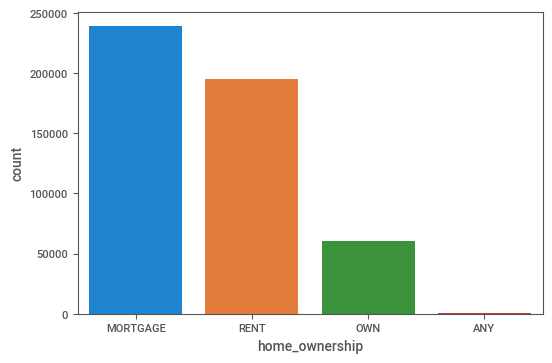

In [55]:
import seaborn as sns

sns.countplot(x='home_ownership', 
              data=df_all, 
              order=df_all['home_ownership'].value_counts().index);

Performing the above steps for many columns (like in our DataFrame) will become very tedious very quickly.
Next, we’ll demonstrate how to use the [`pandas-profiling`](https://github.com/pandas-profiling/pandas-profiling) library - a library that automates a significant part of data exploration and reduces the amount of boilerplate code that is typically written to compute common statistics and relationships between variables. 

There are three steps: 

1. Import `ProfileReport` class from the library
2. Instantiate `ProfileReport` object with optional parameters. For example, we’ll be running the analysis in the `minimal` mode which disables expensive computations
3. Display the resulting report as either an HTML embedded into Jupyter notebook, Ipython widgets or save the report to a separate HTML file.

In [51]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_all, title="Pandas Profiling Report", minimal=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/108 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

A somewhat similar result, i.e. interactive and automated data visualization report, can be achieved via another library called [`sweetviz`](https://github.com/fbdesignpro/sweetviz):
1. Create a report by passing the DataFrame to `sweetviz.analyze` method. We set `pairwise_analysis` parameter to `"off"` to disable expensive computations.
2. Call `show_notebook` method to display the interactive report inside the notebook

There are other libraries that perform automated exploratory data analysis, and the choice is largely a matter of taste.

                                             |                      | [  0%]   00:00 -> (? left)


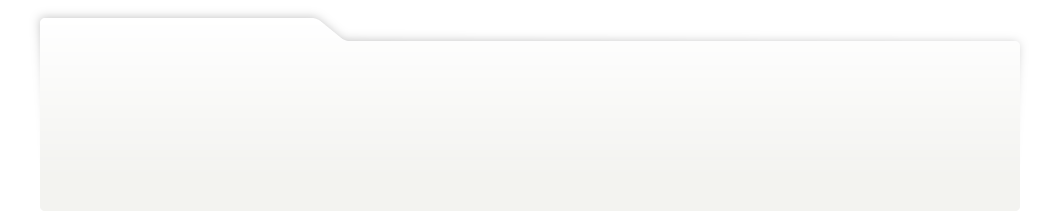
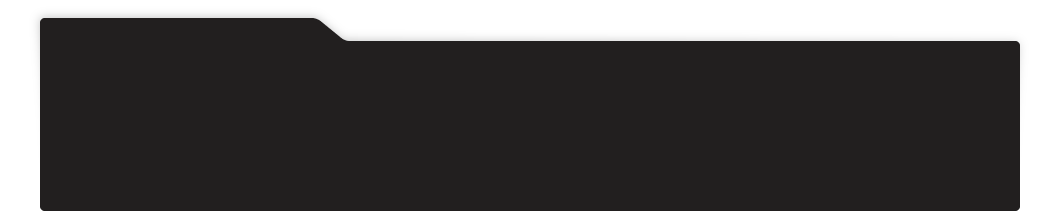
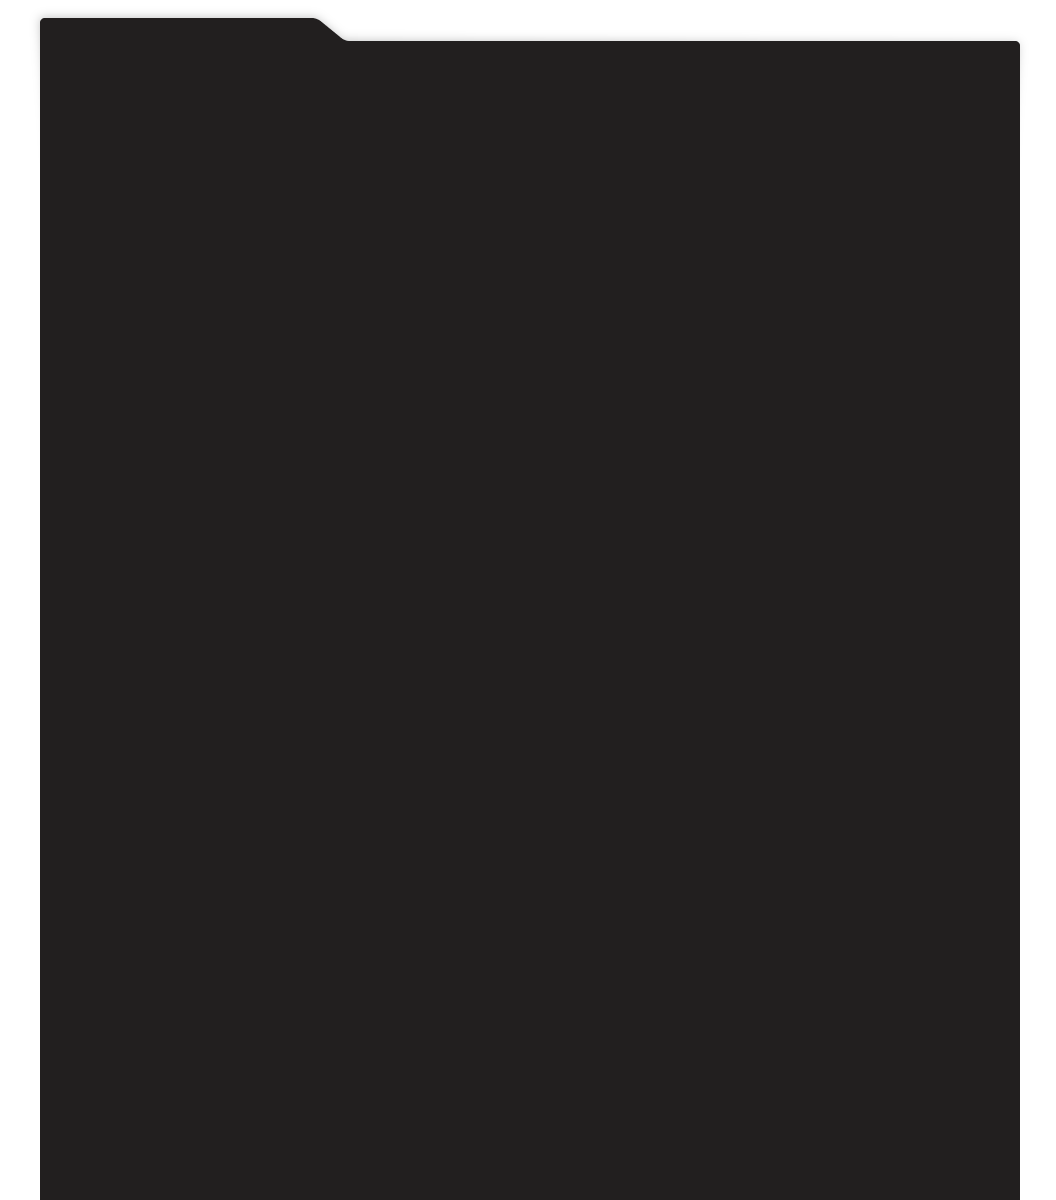
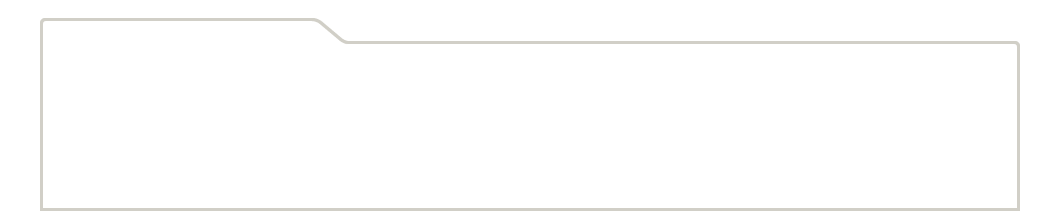
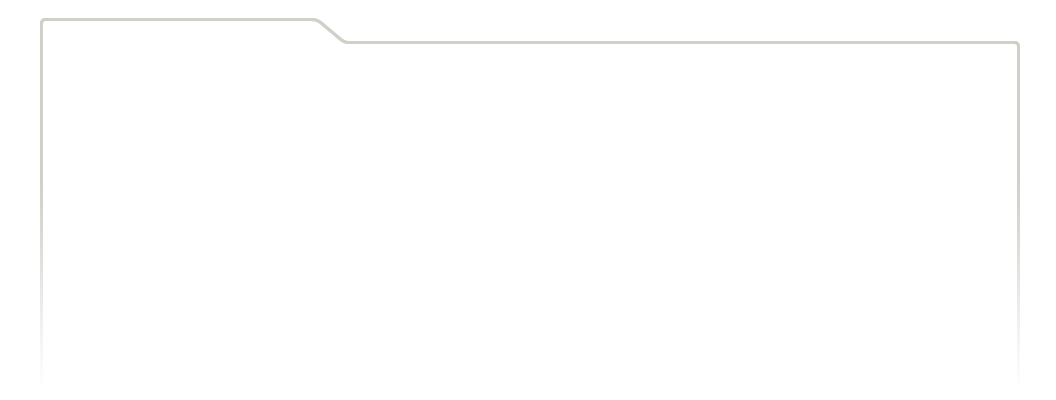
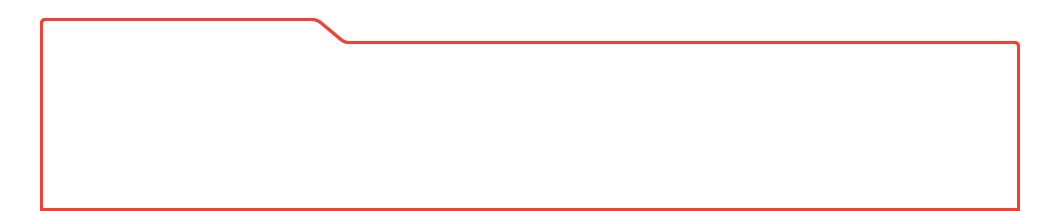
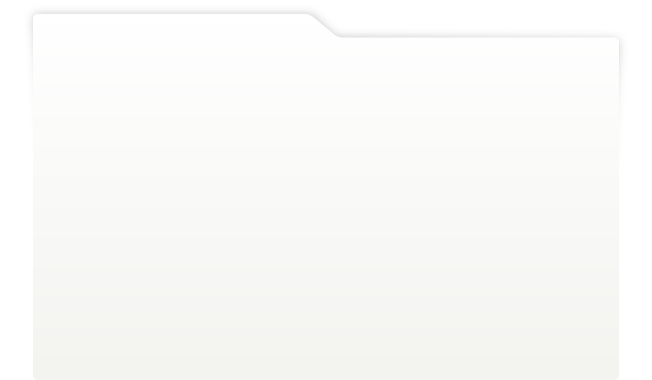
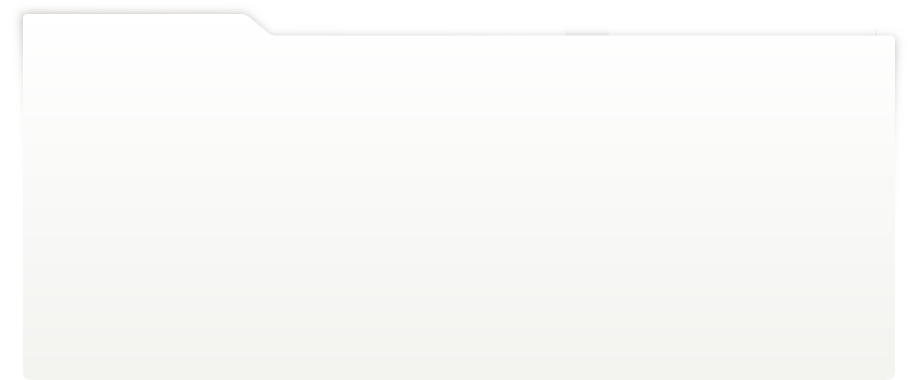
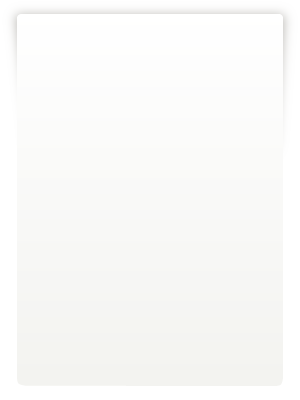
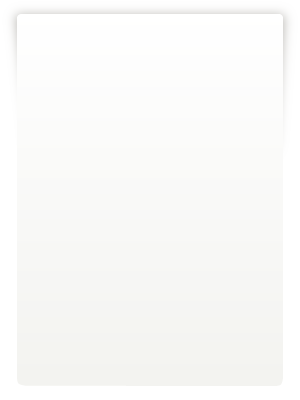
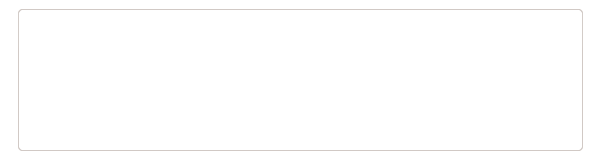
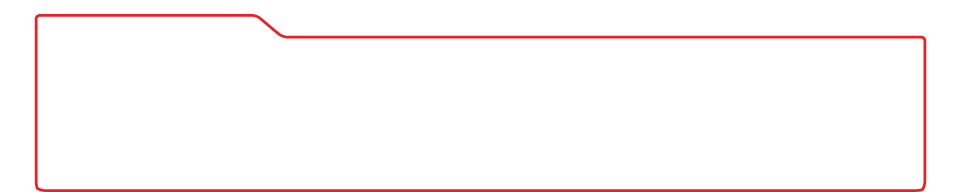
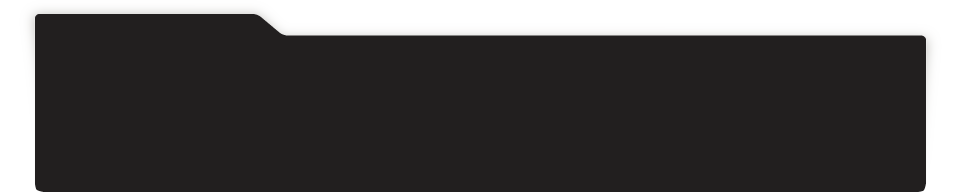
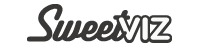
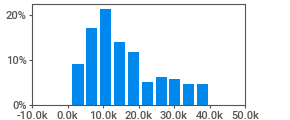
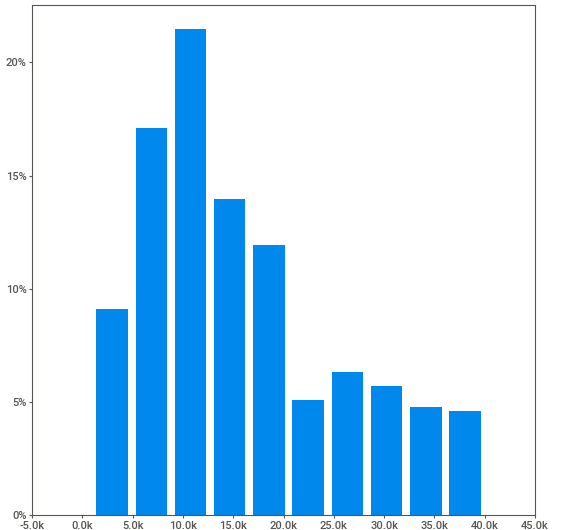
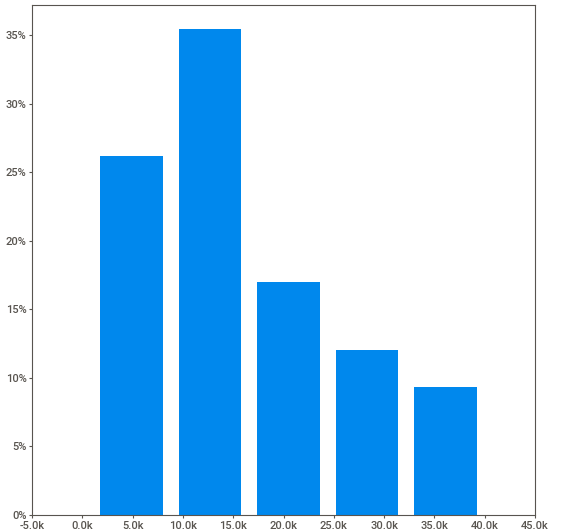
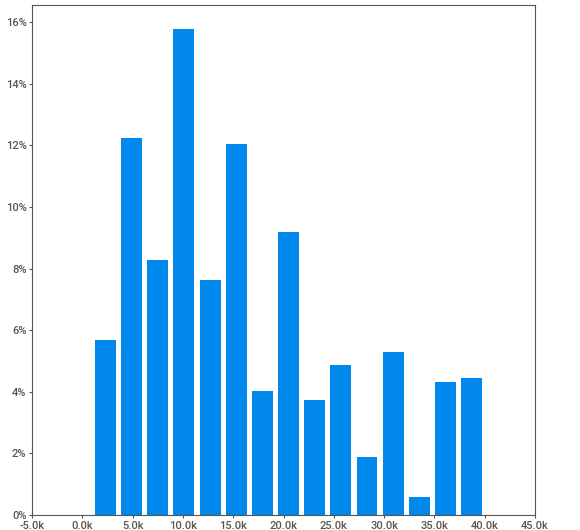
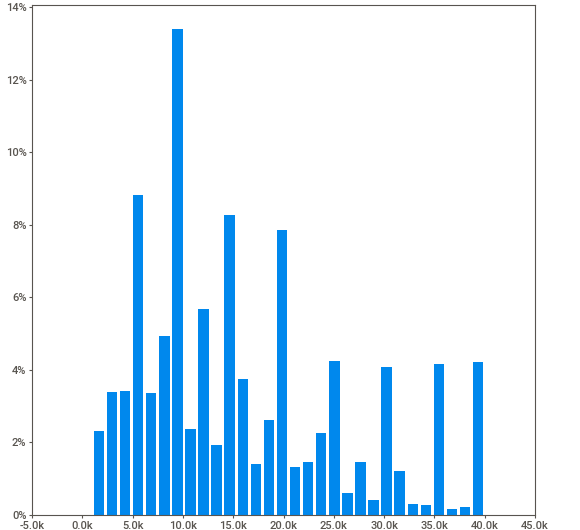
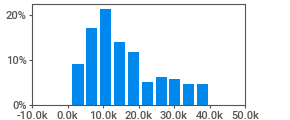
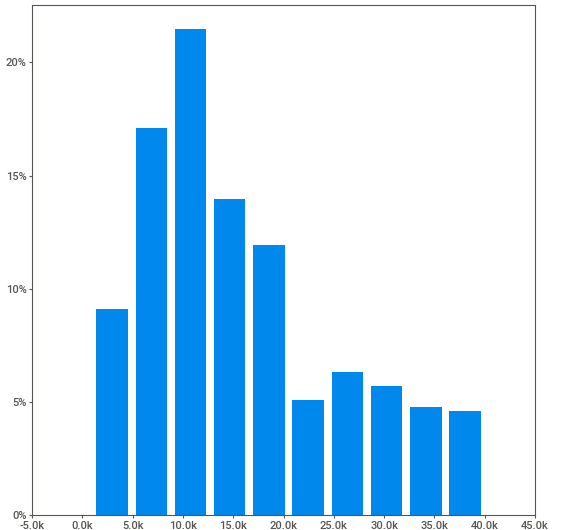
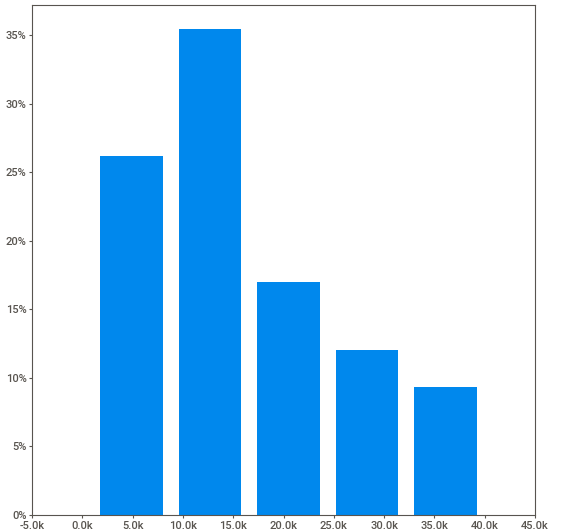
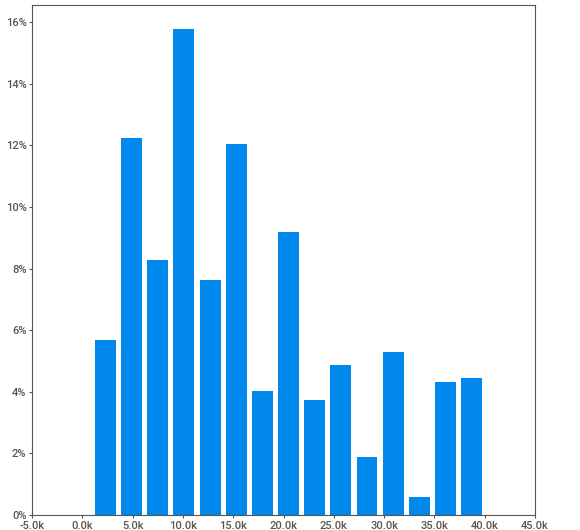
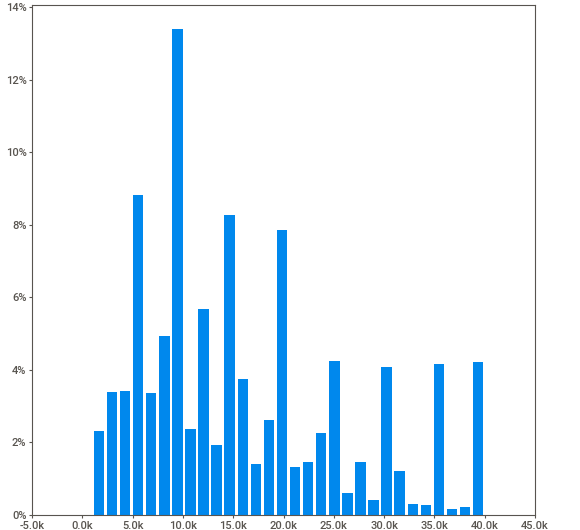
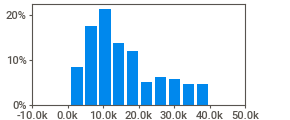
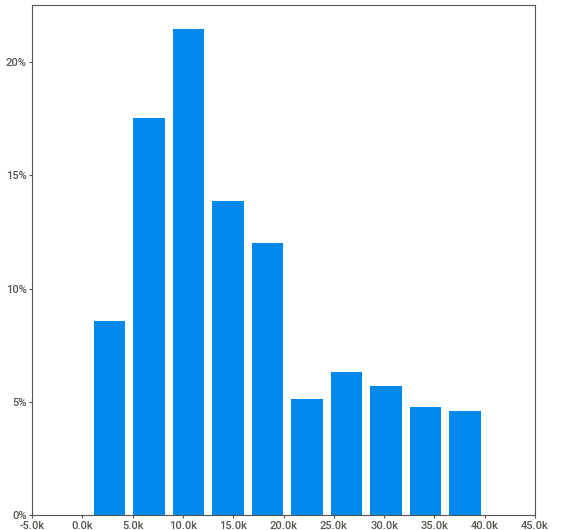
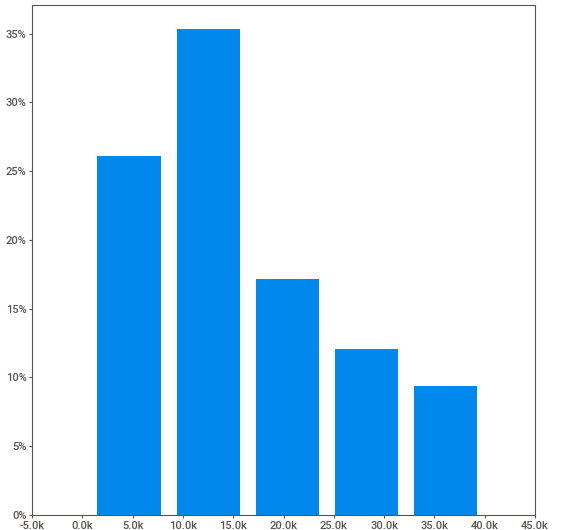
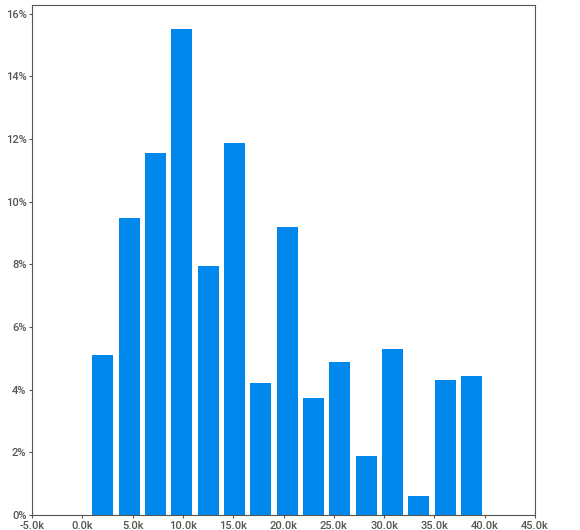
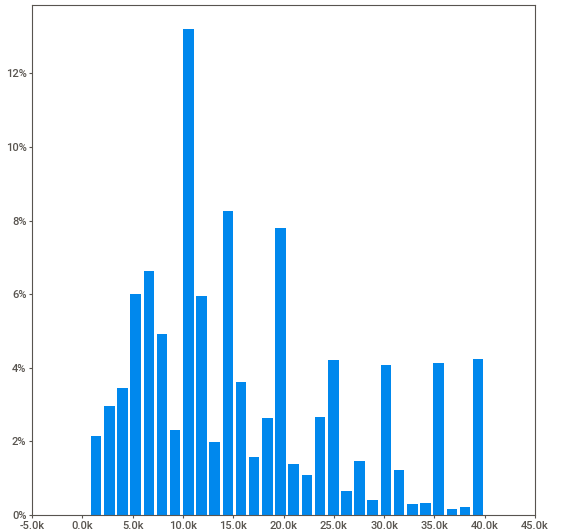
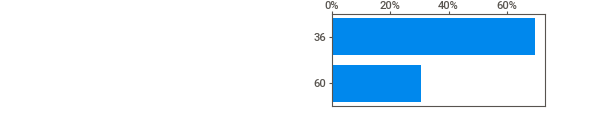
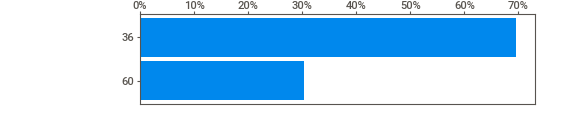
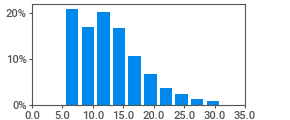
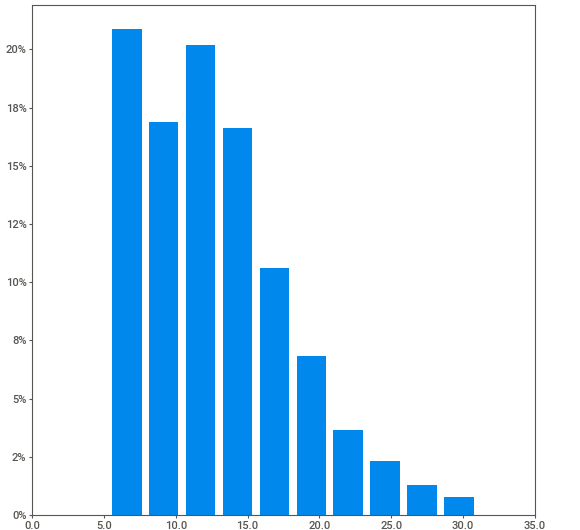
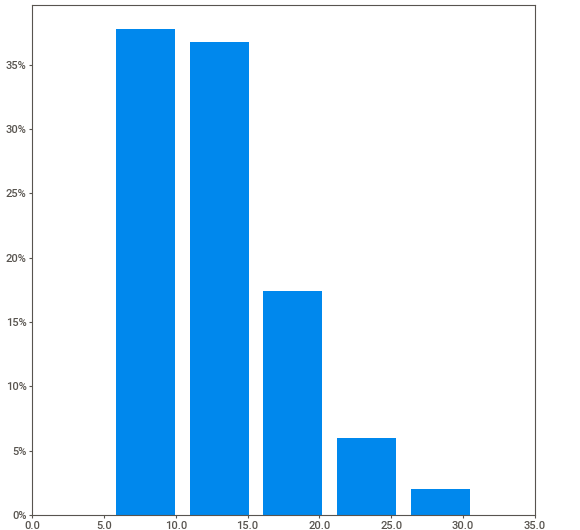
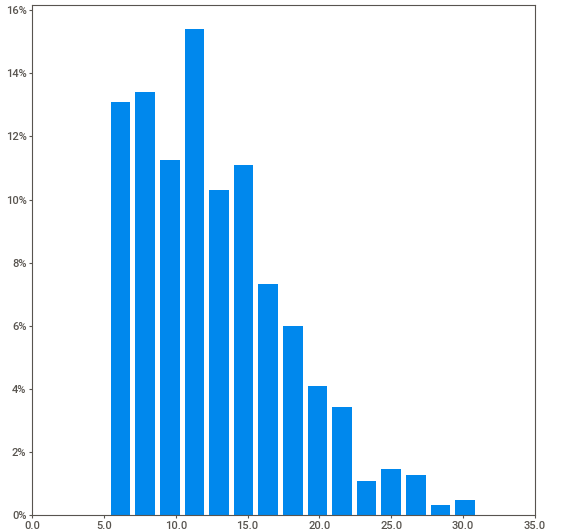
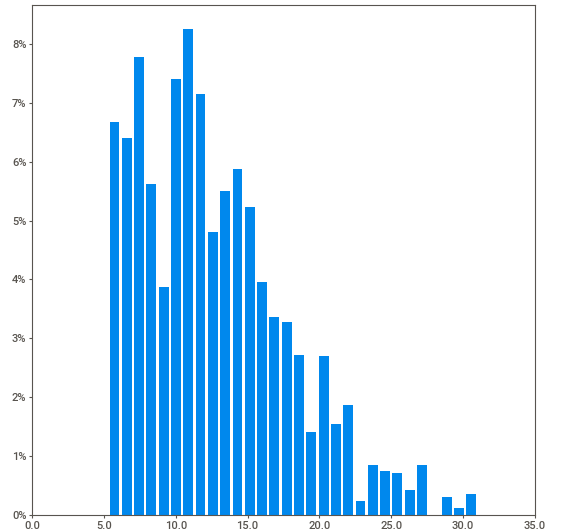
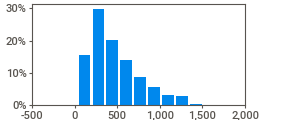
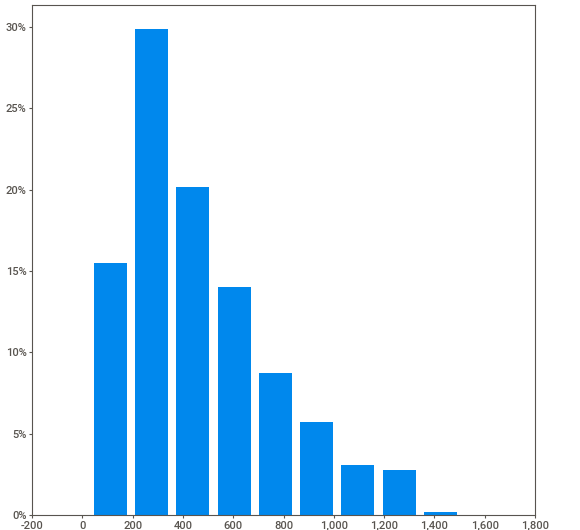
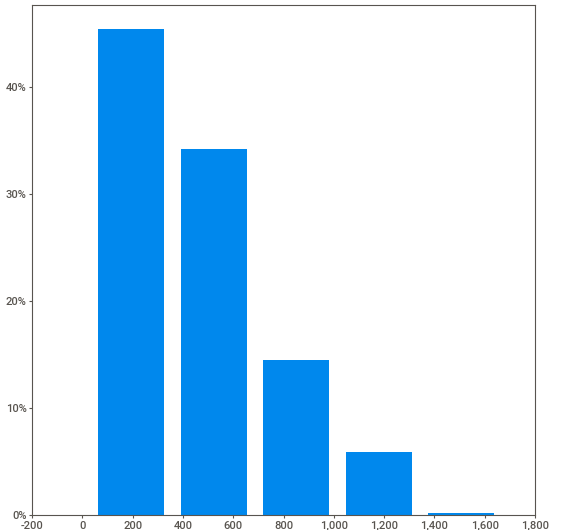
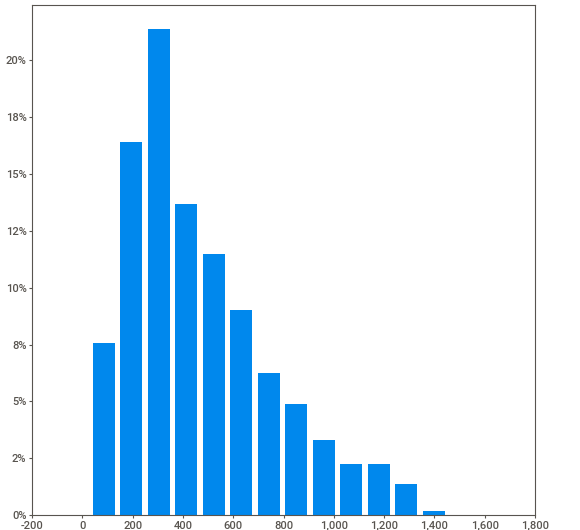
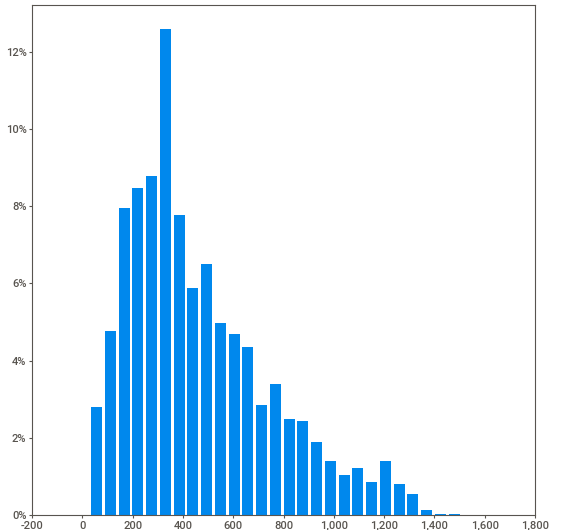
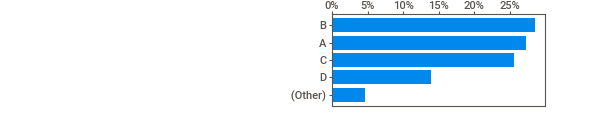
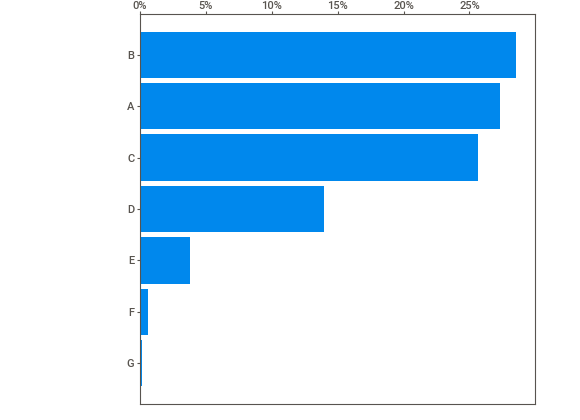
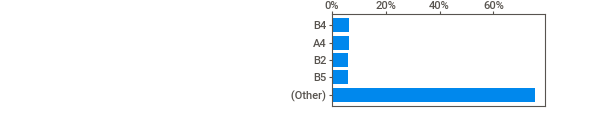
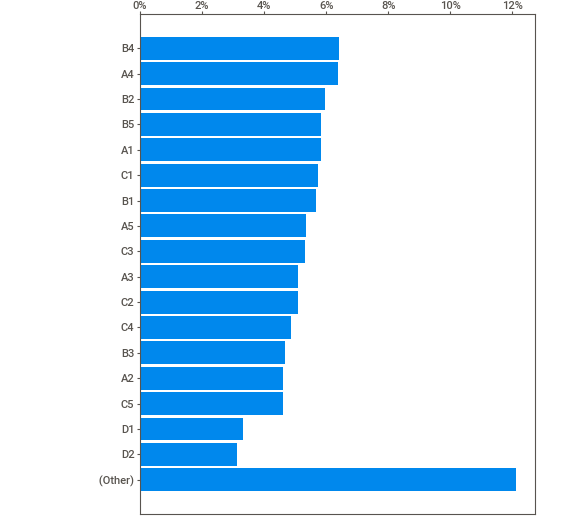
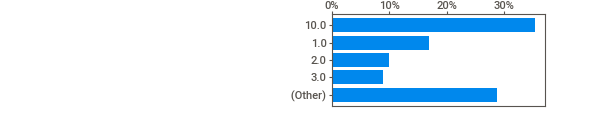
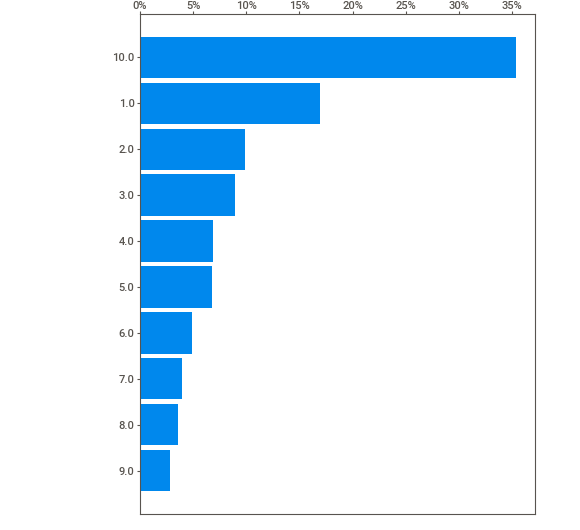
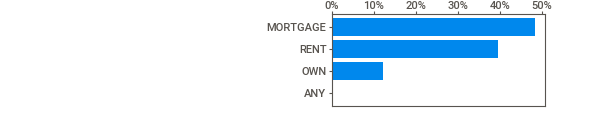
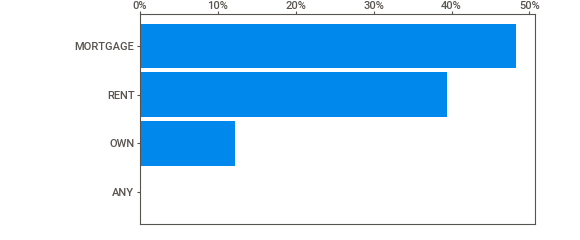
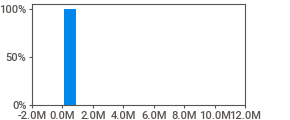
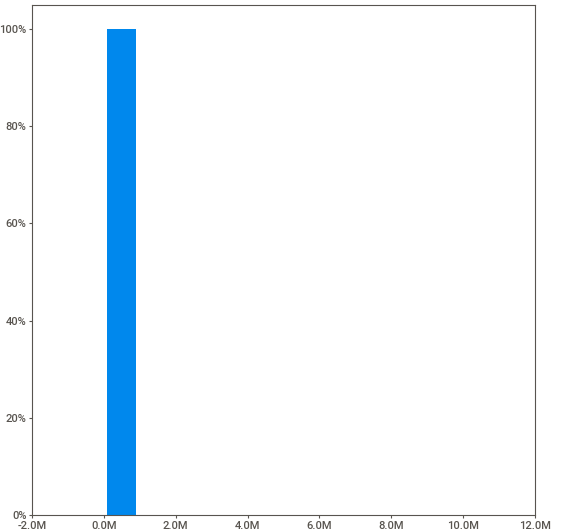
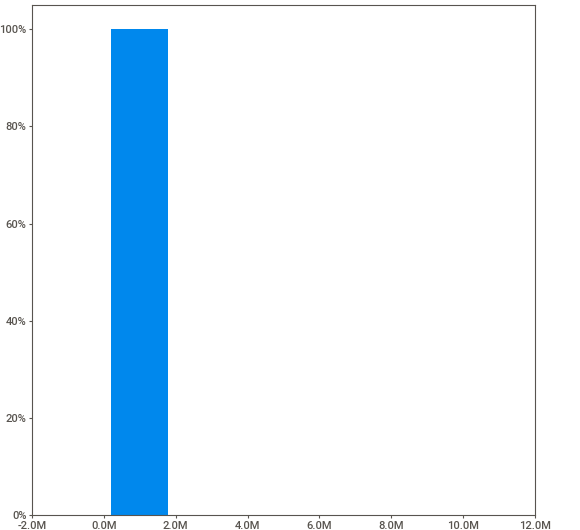
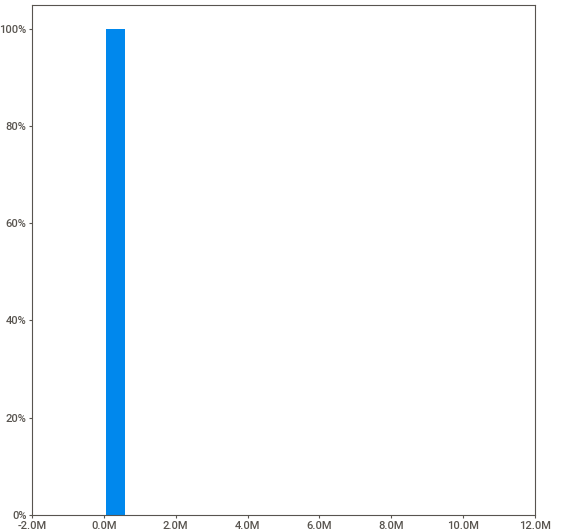
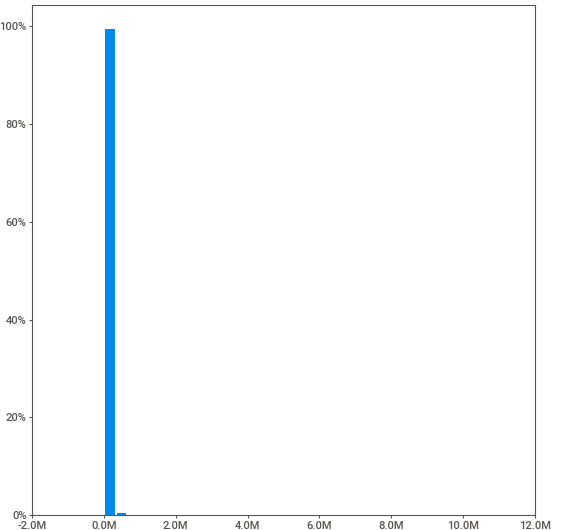
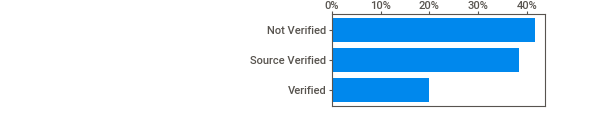
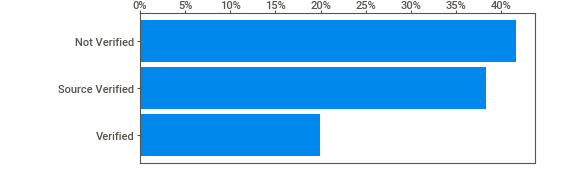
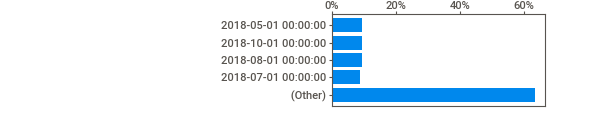
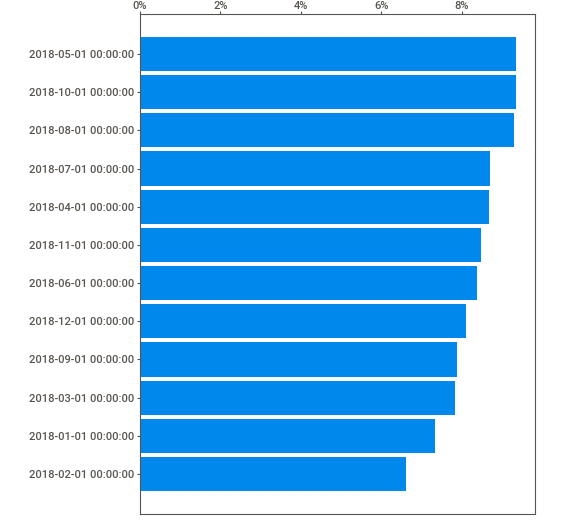
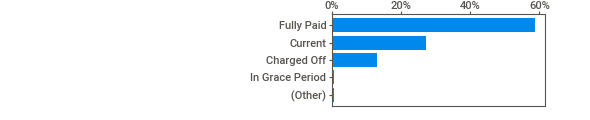
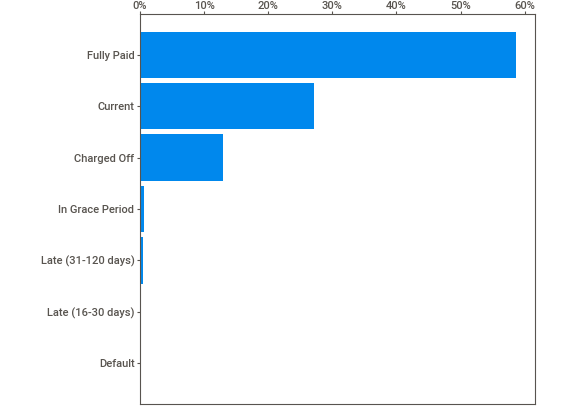
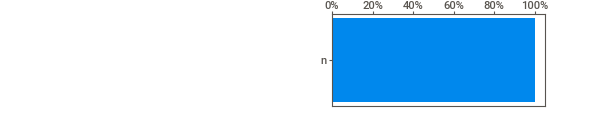
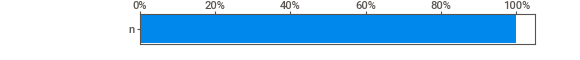
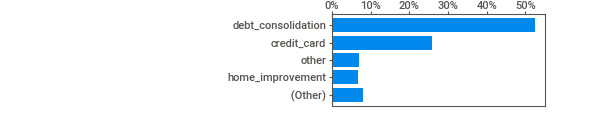
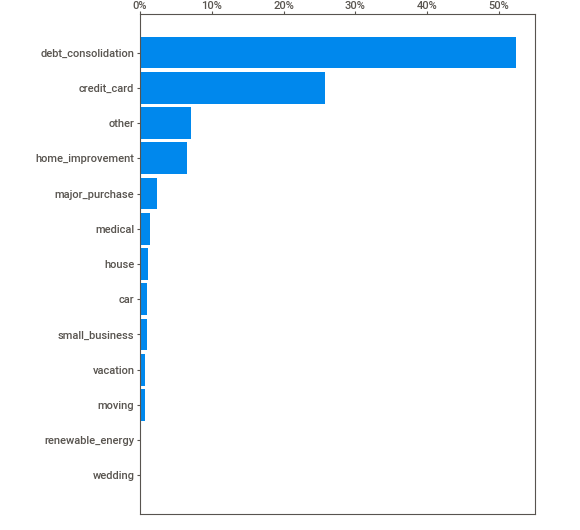
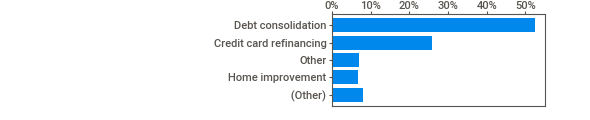
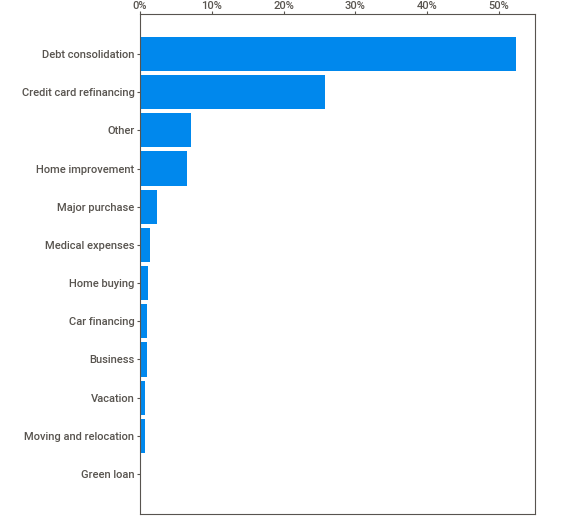
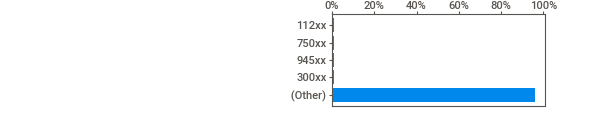
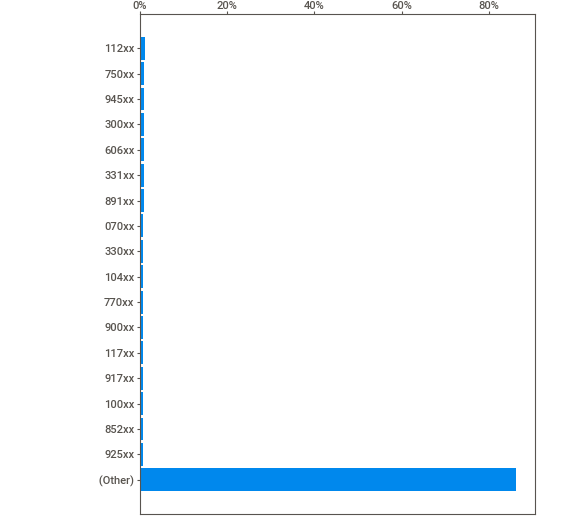
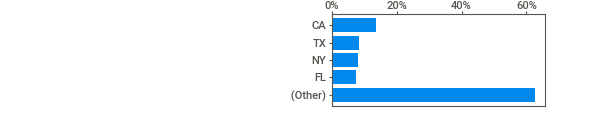
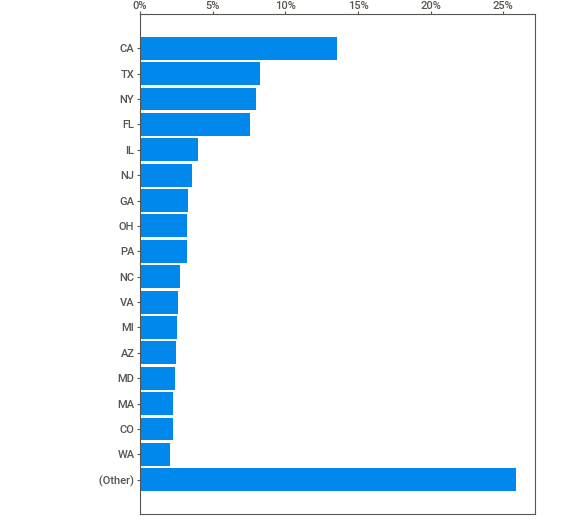
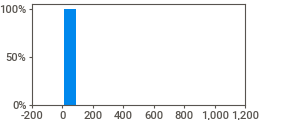
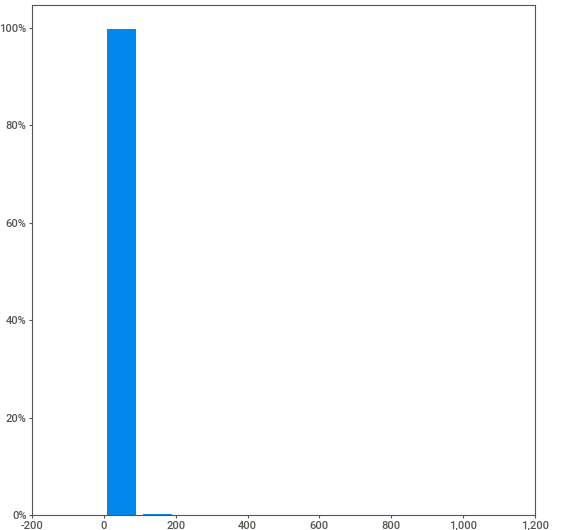
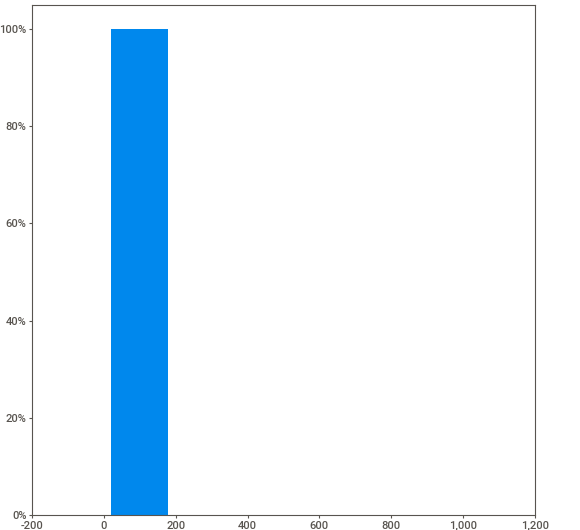
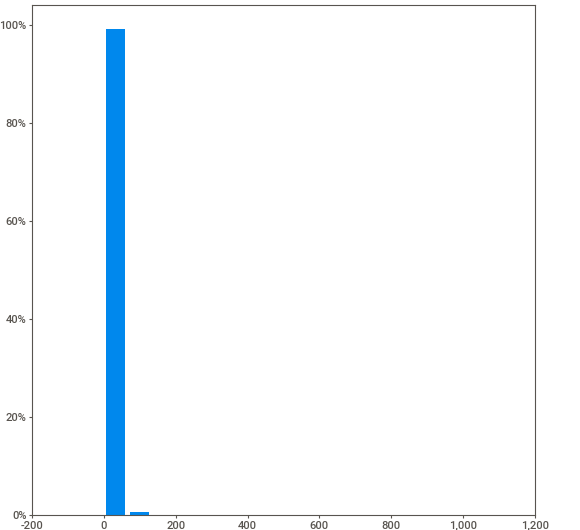
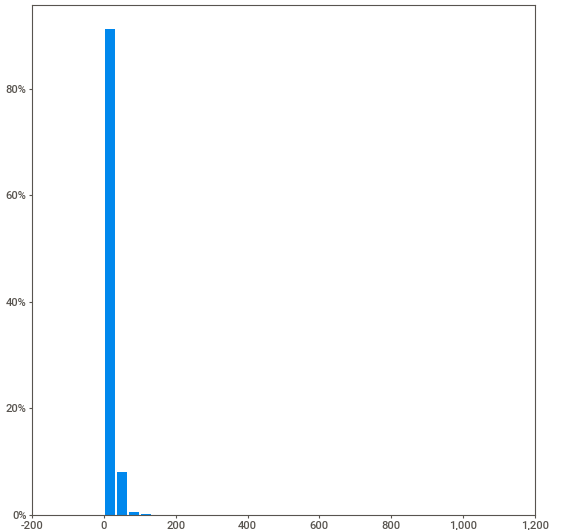
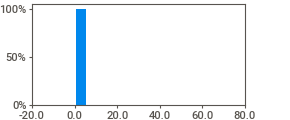
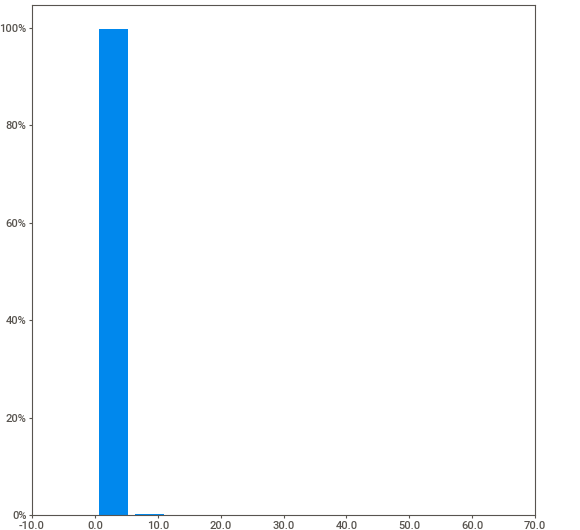
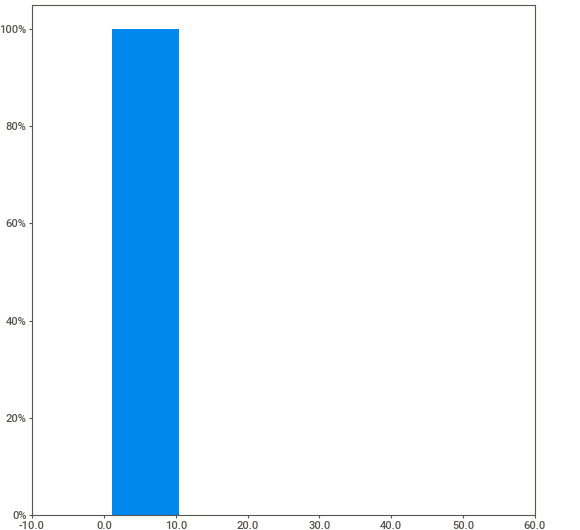
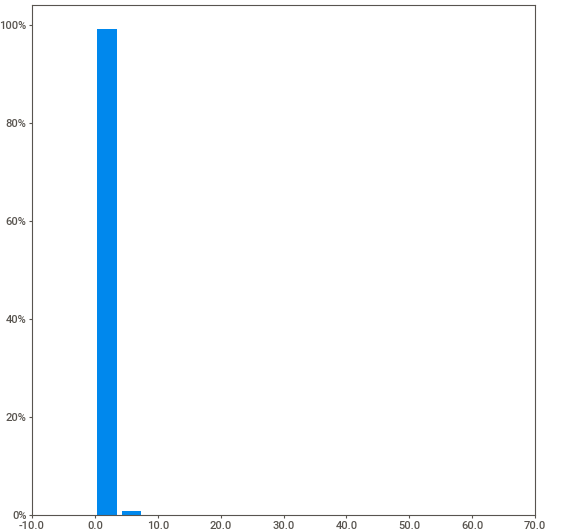
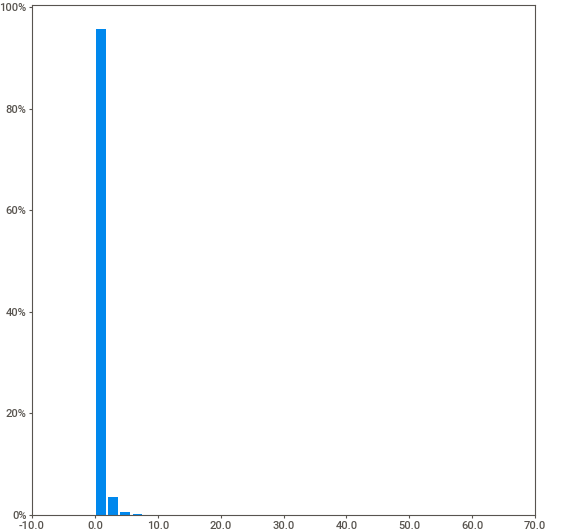
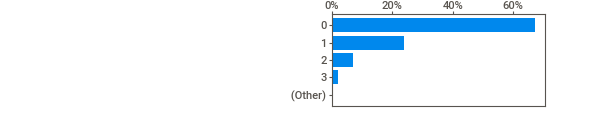
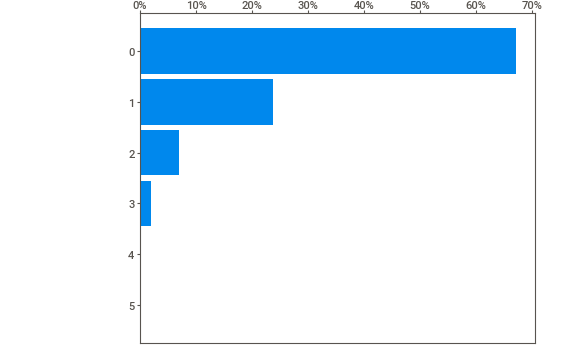
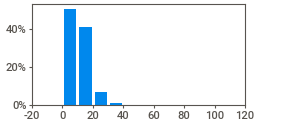
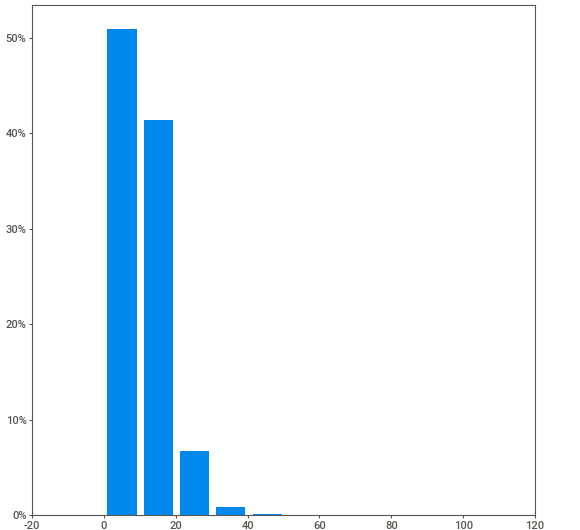
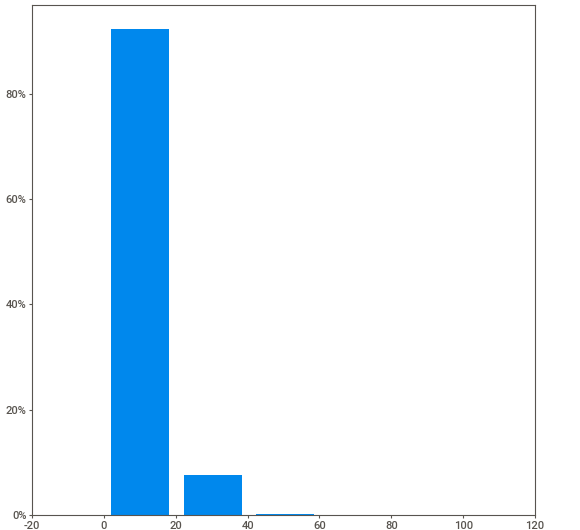
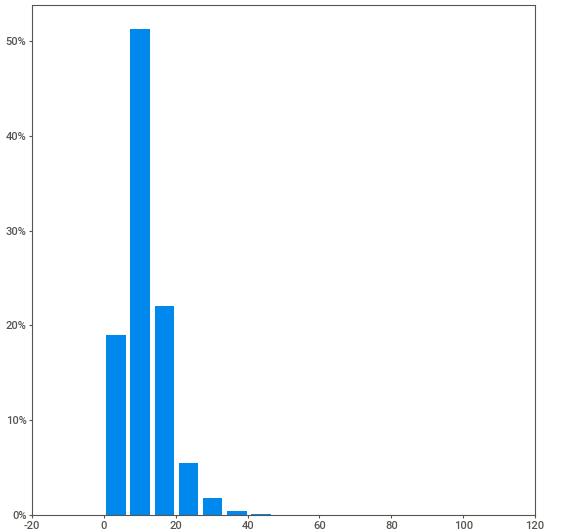
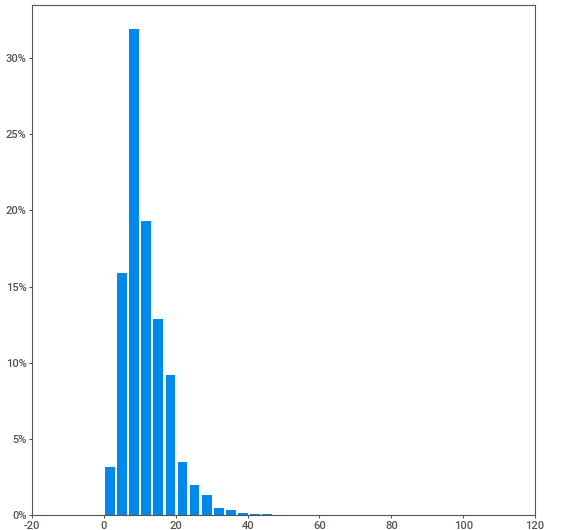
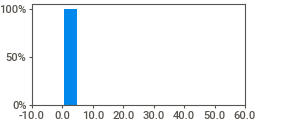
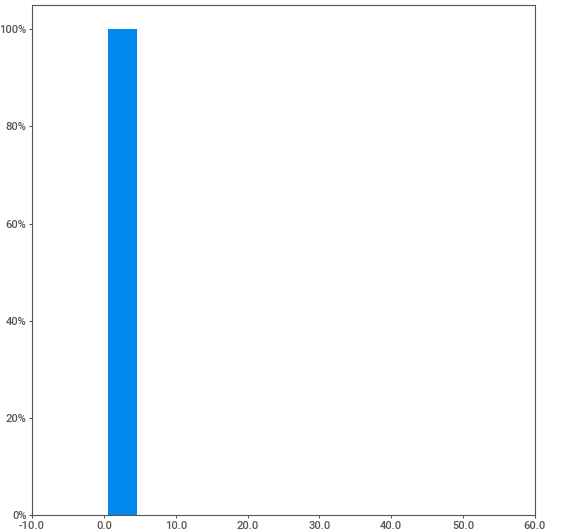
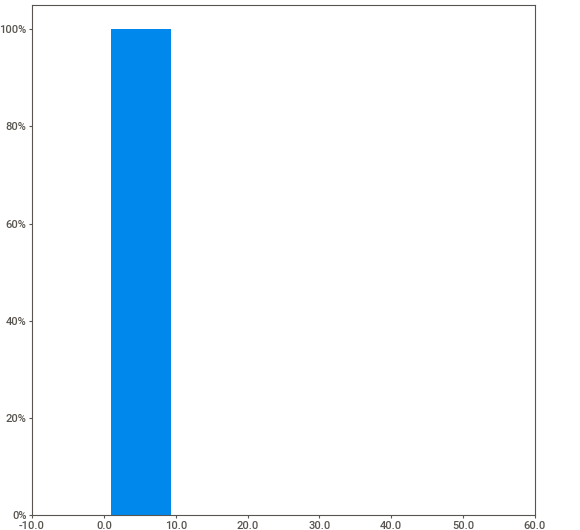
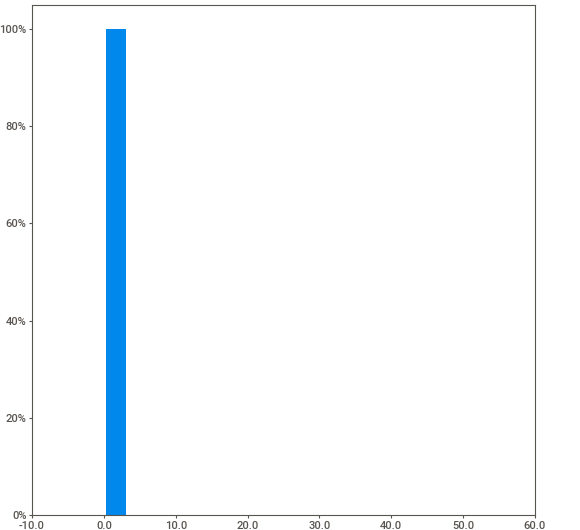
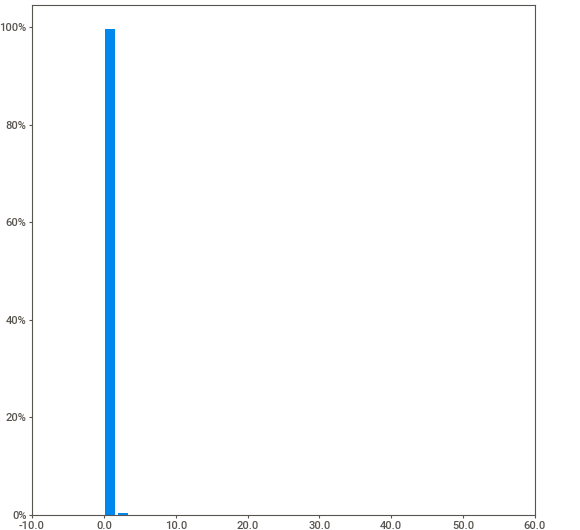
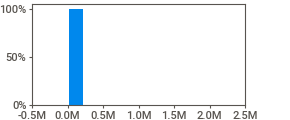
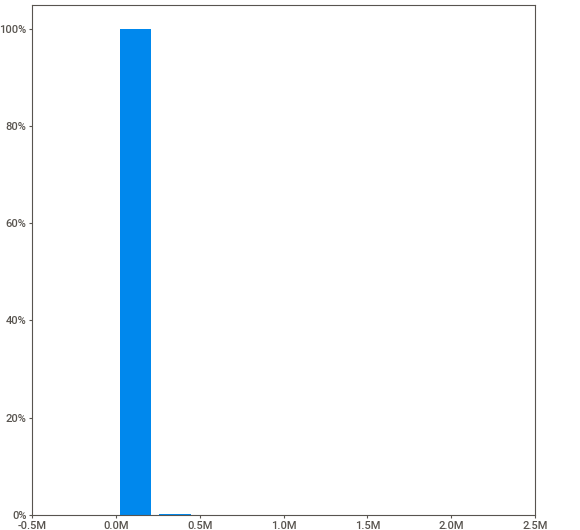
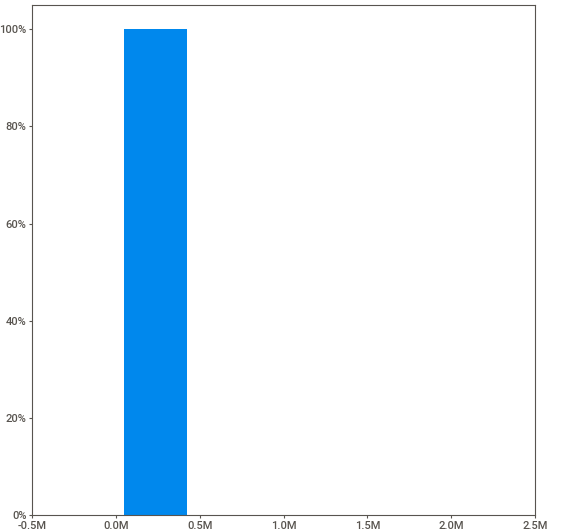
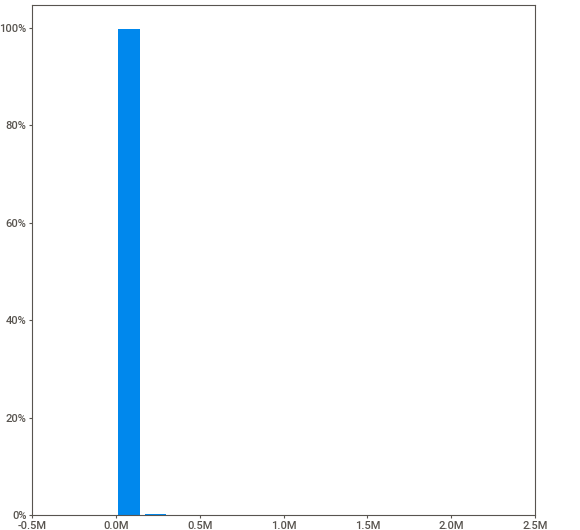
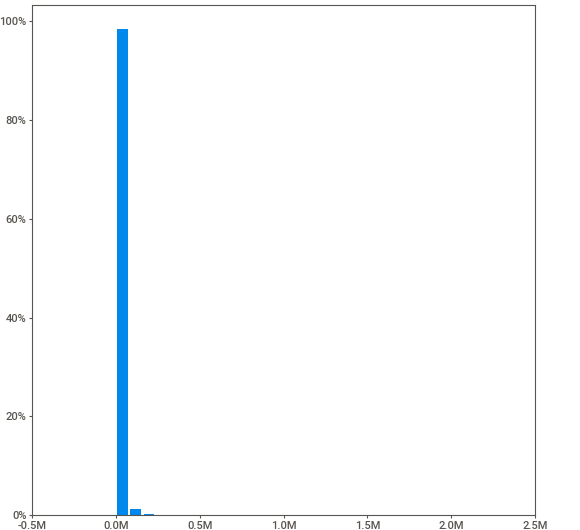
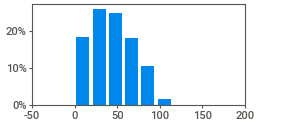
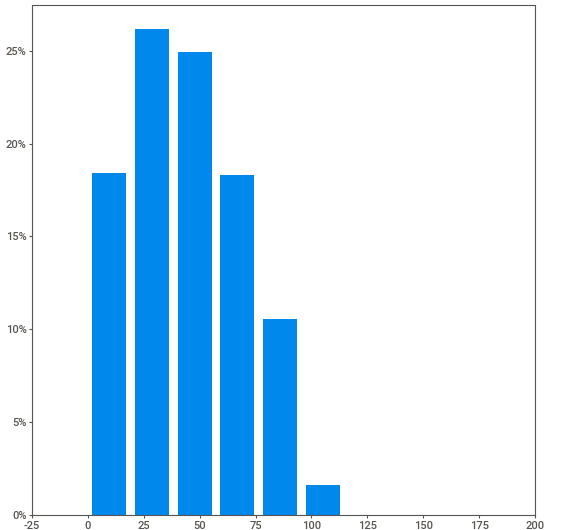
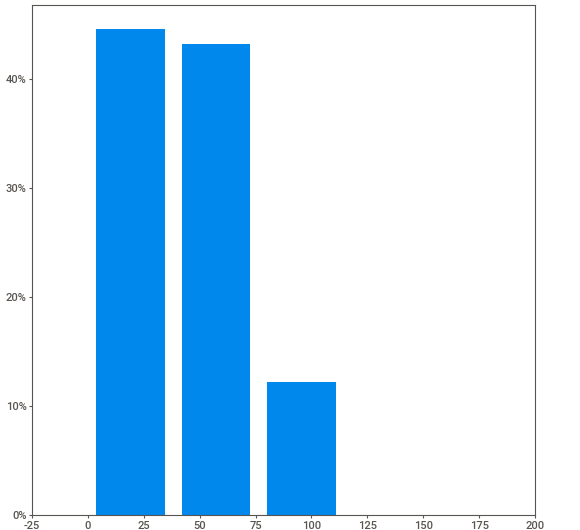
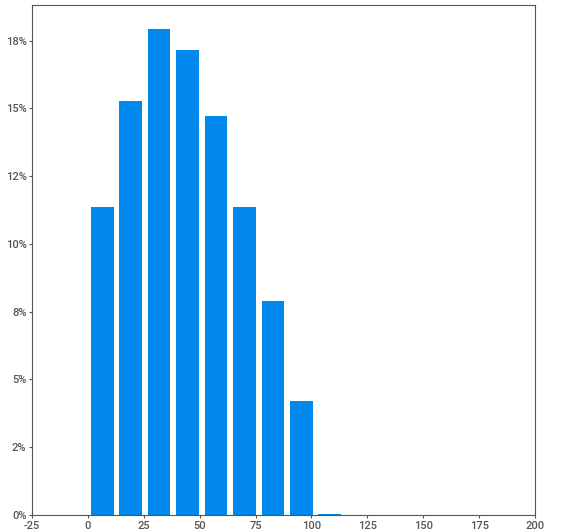
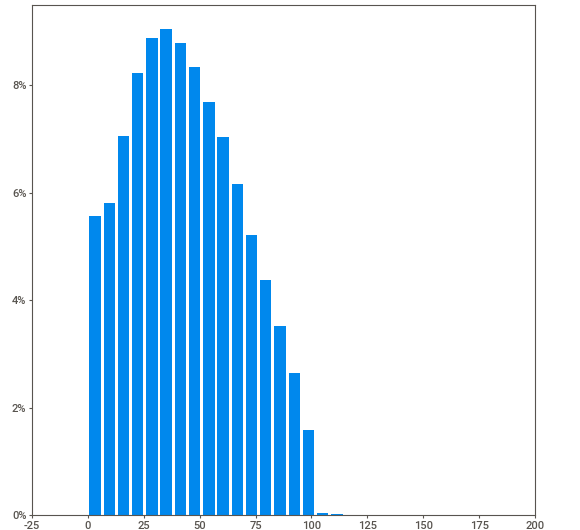
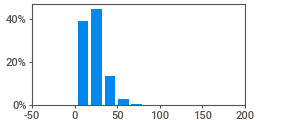
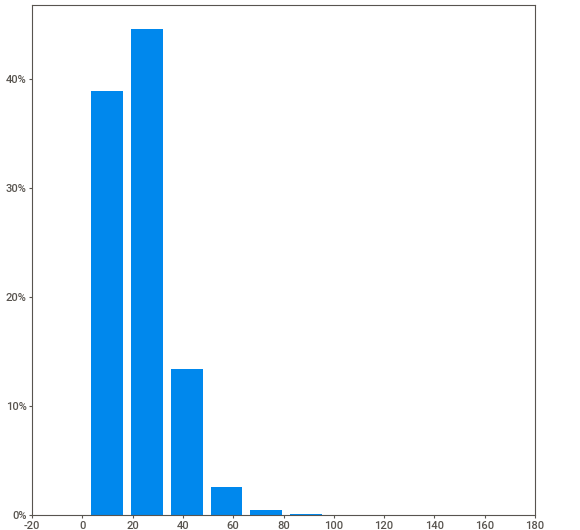
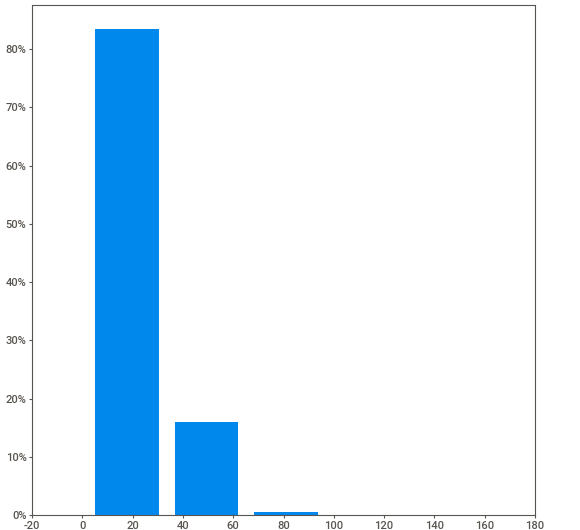
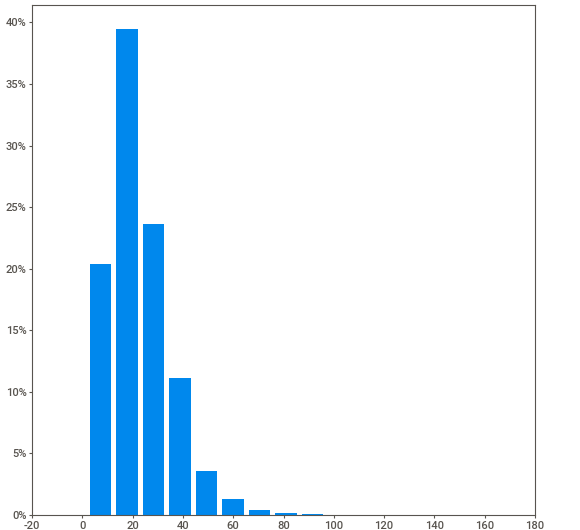
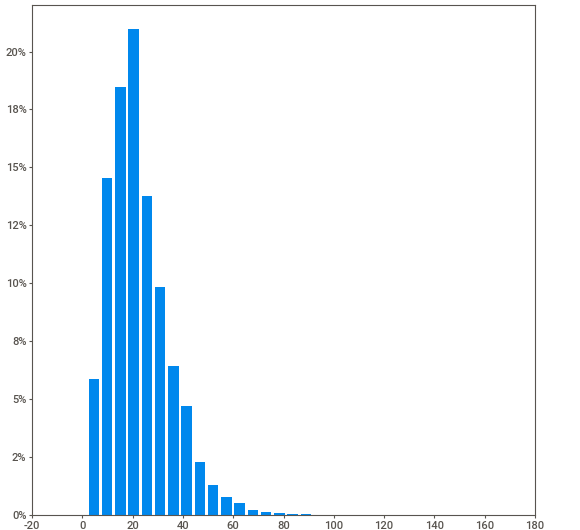
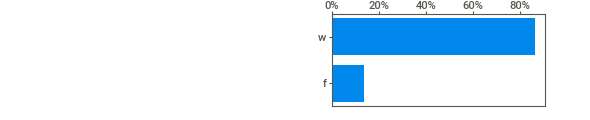
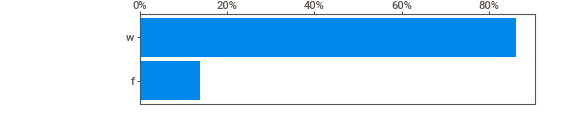
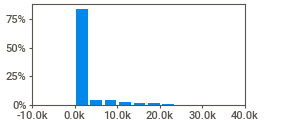
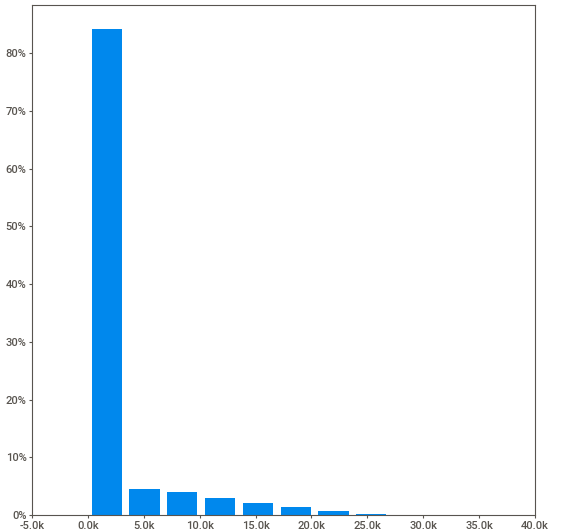
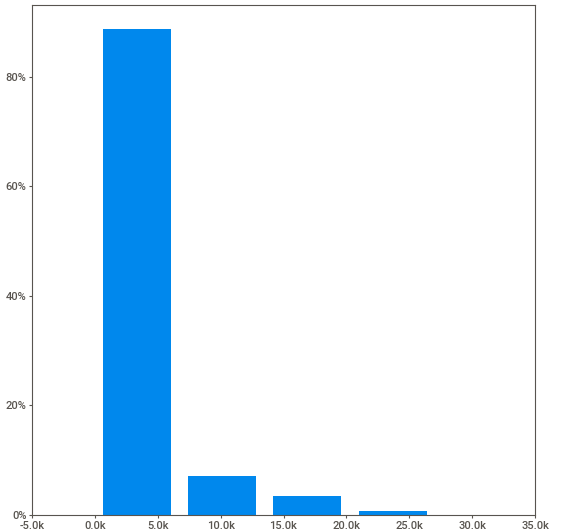
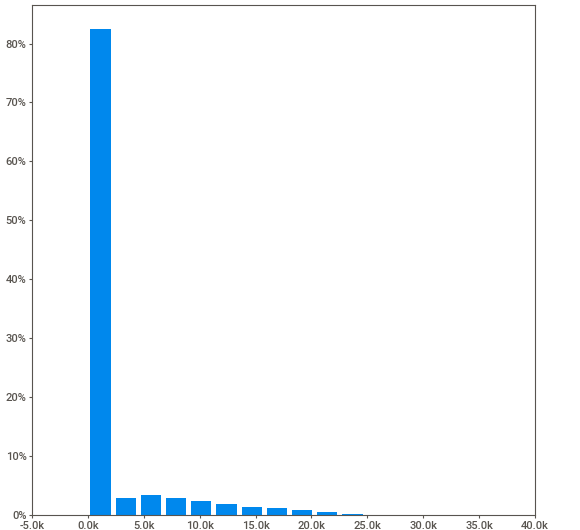
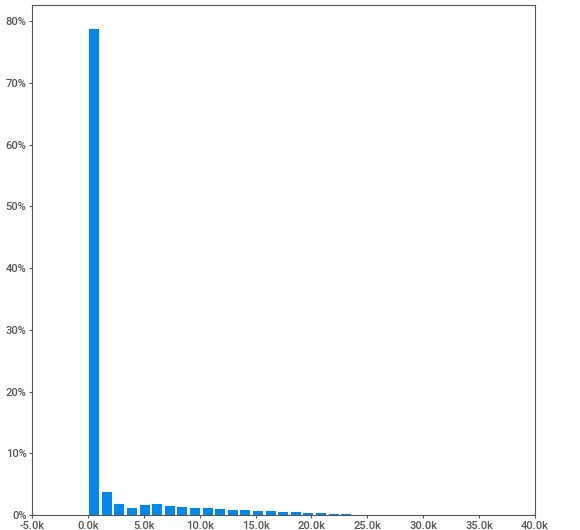
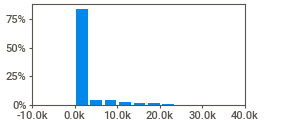
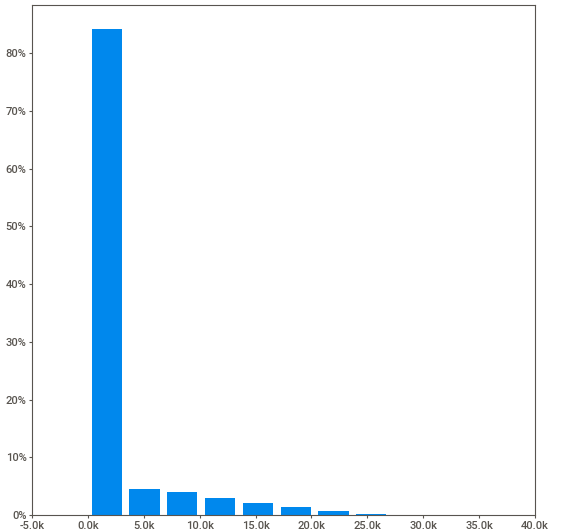
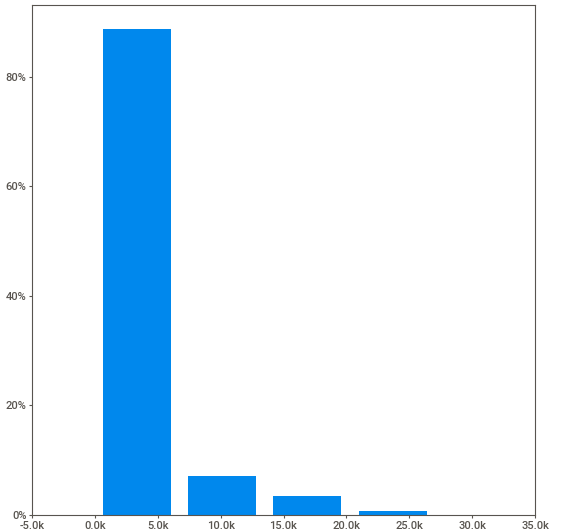
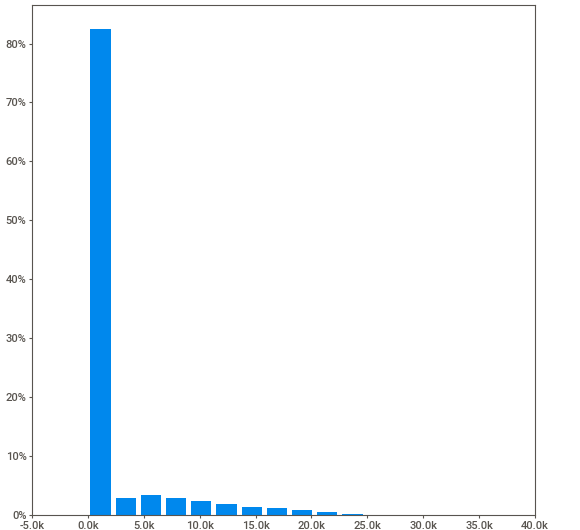
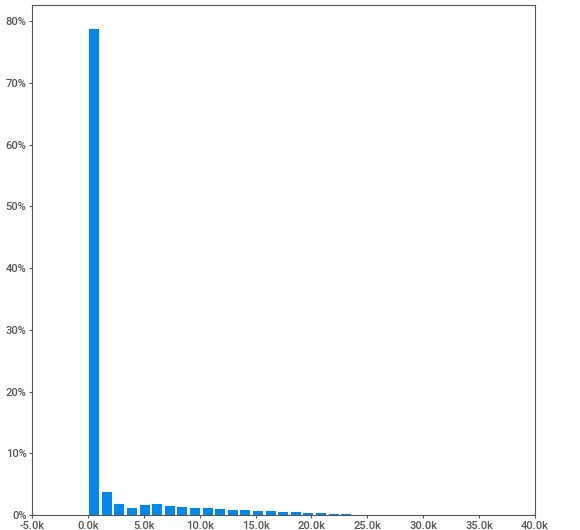
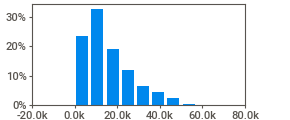
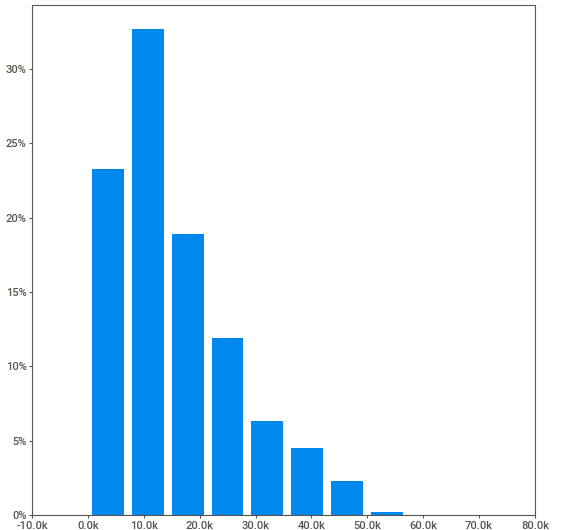
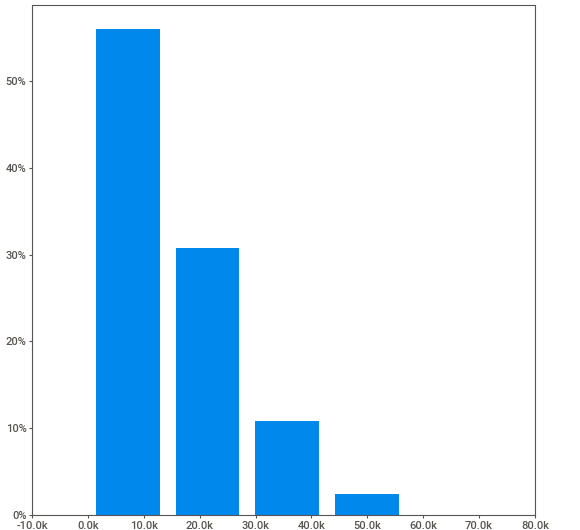
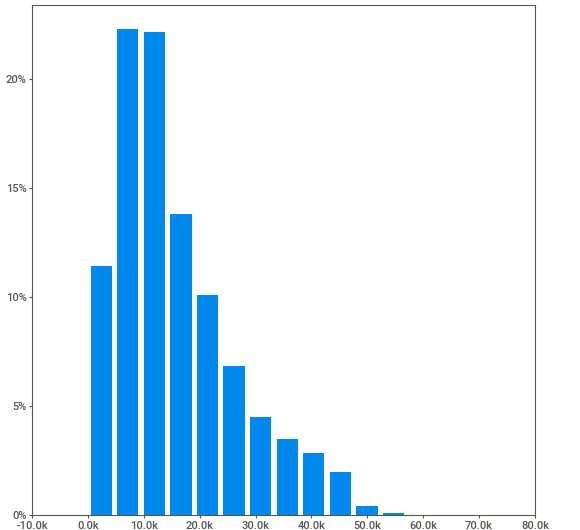
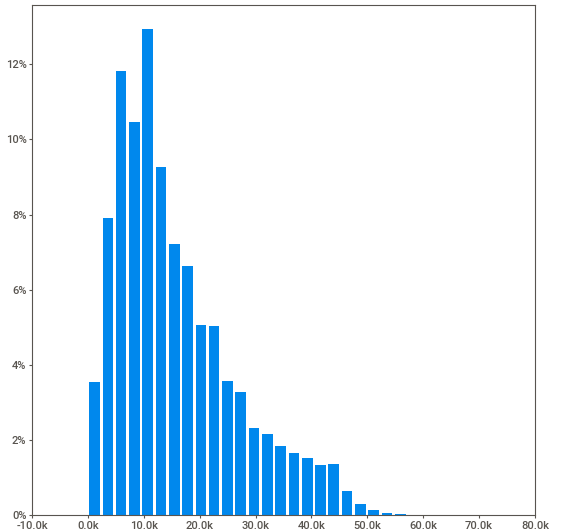
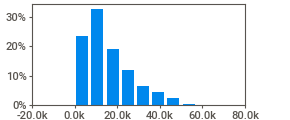
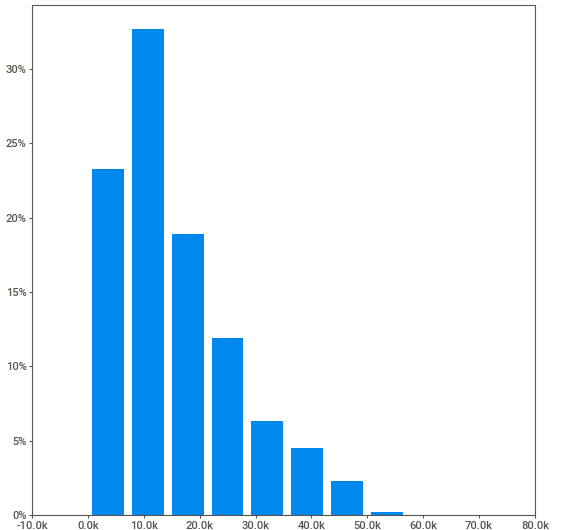
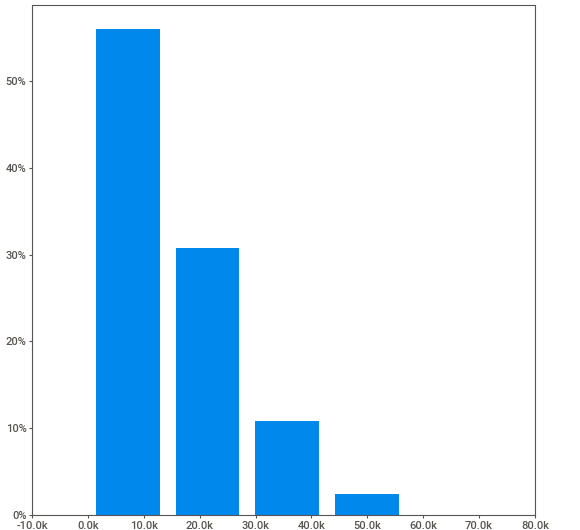
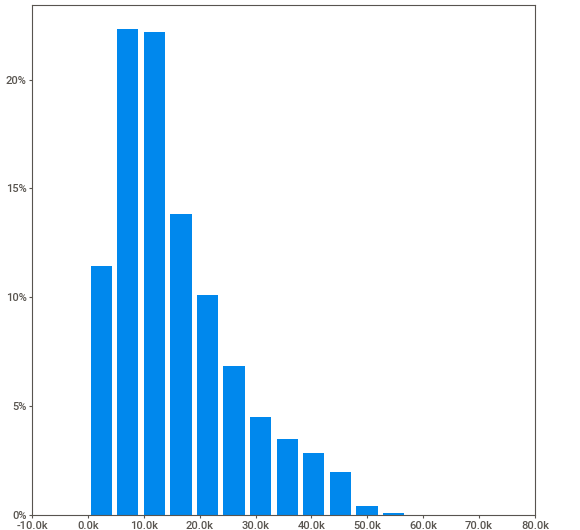
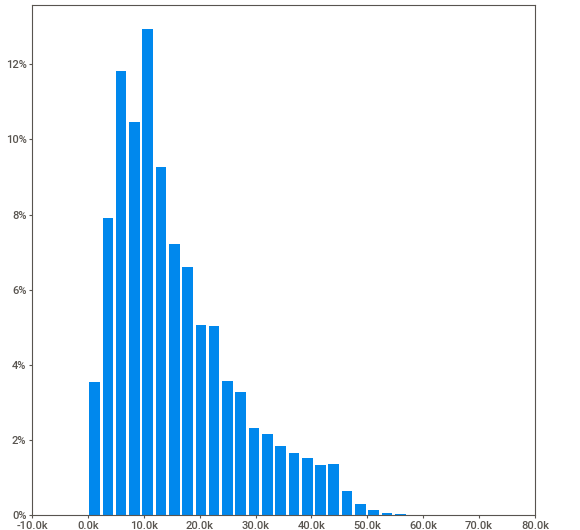
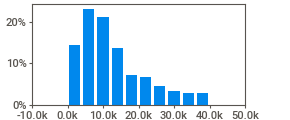
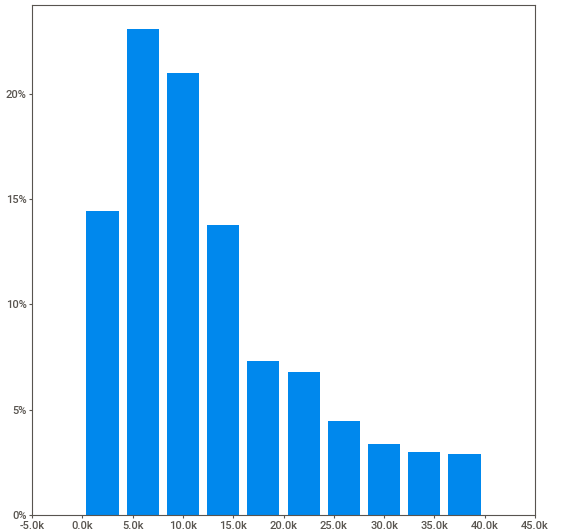
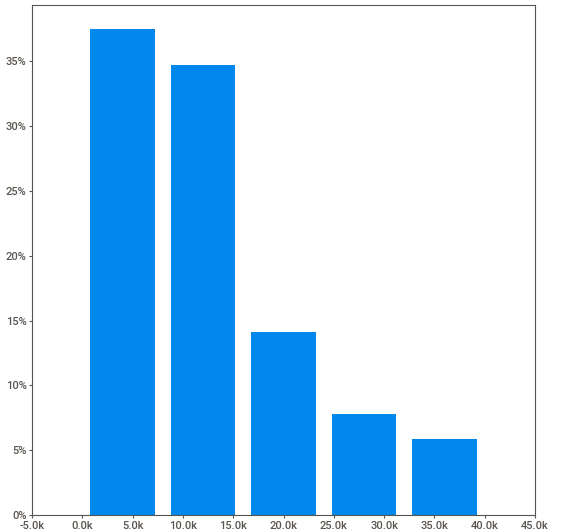
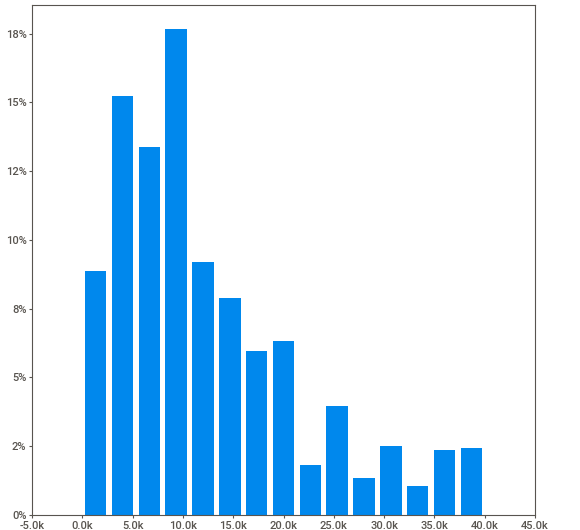
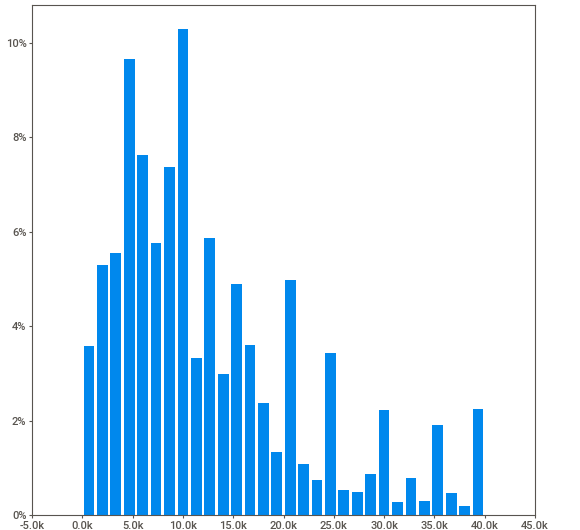
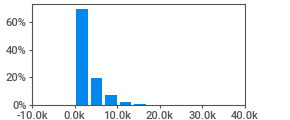
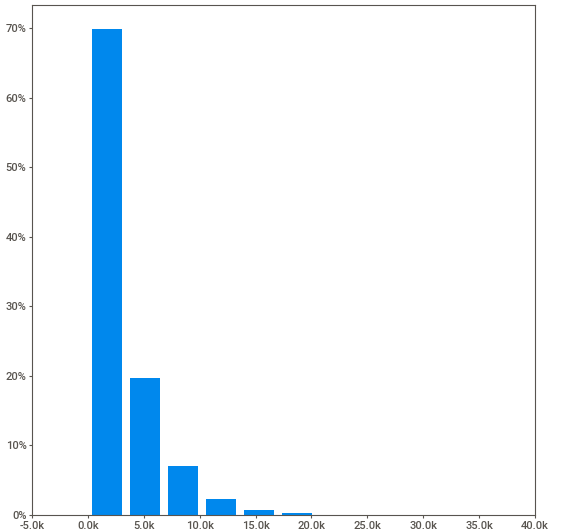
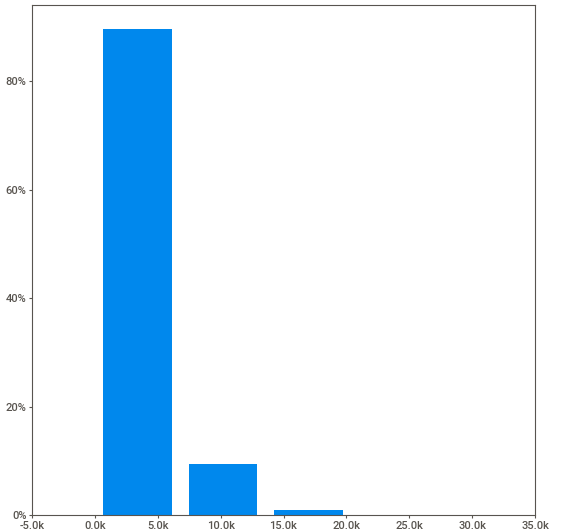
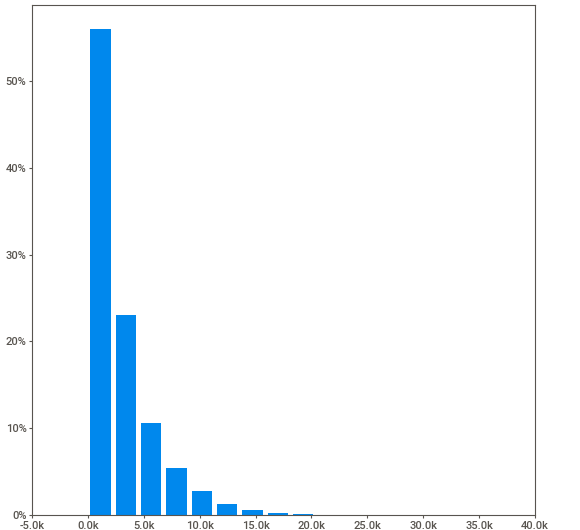
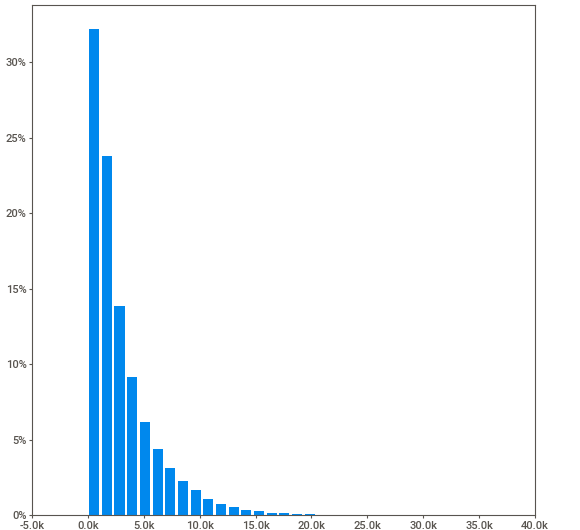
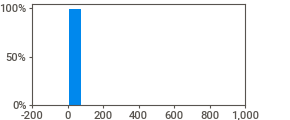
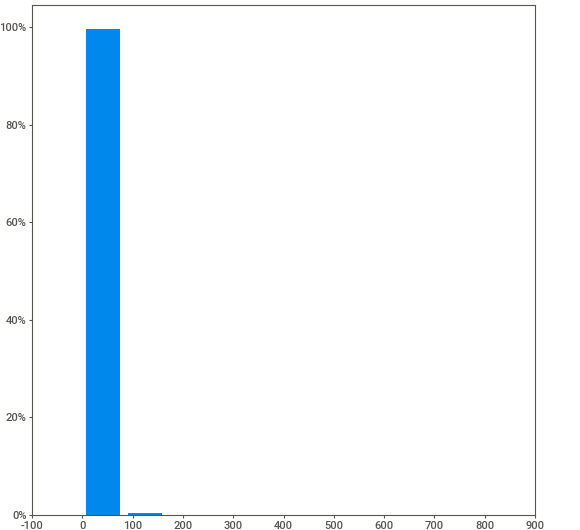
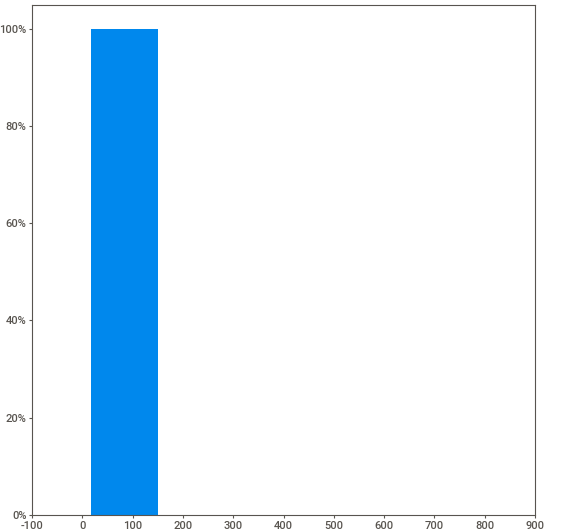
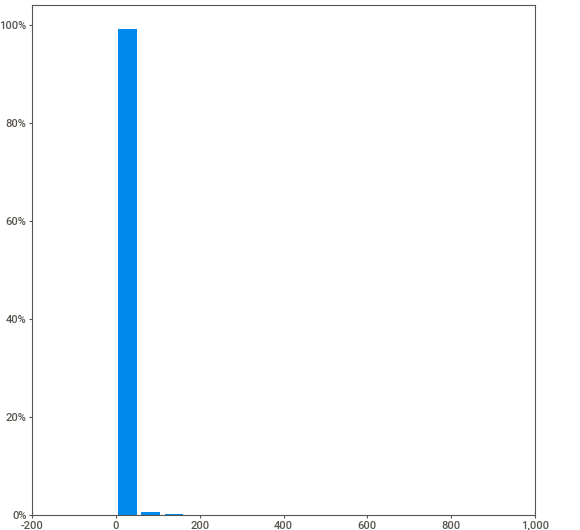
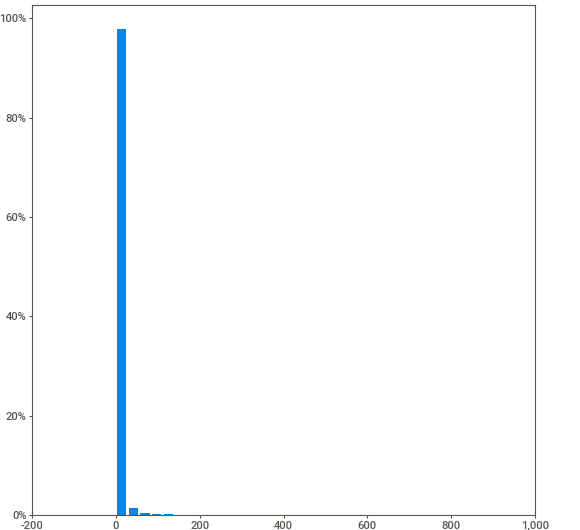
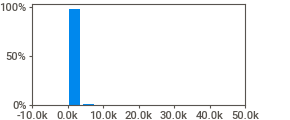
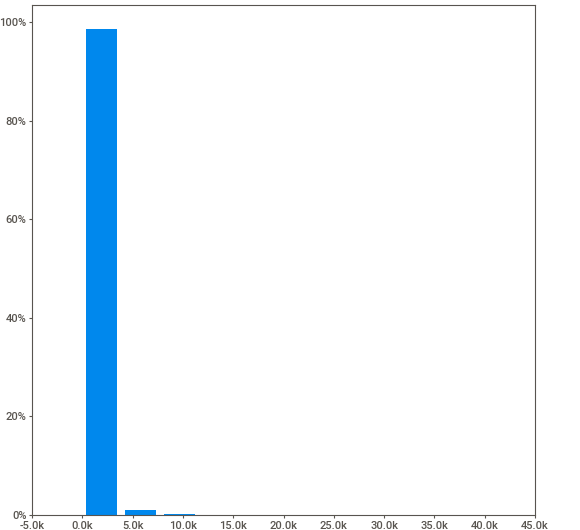
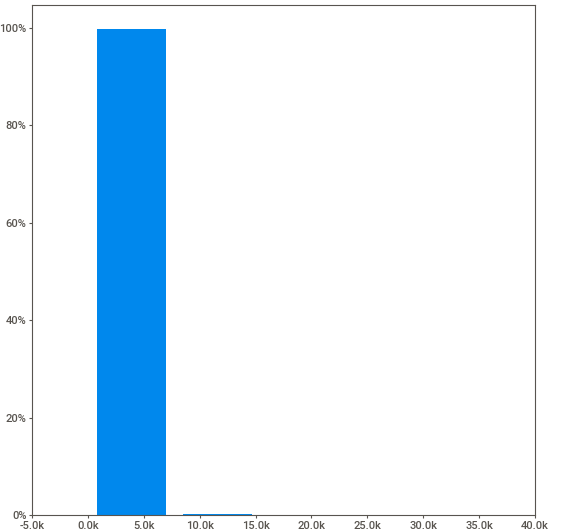
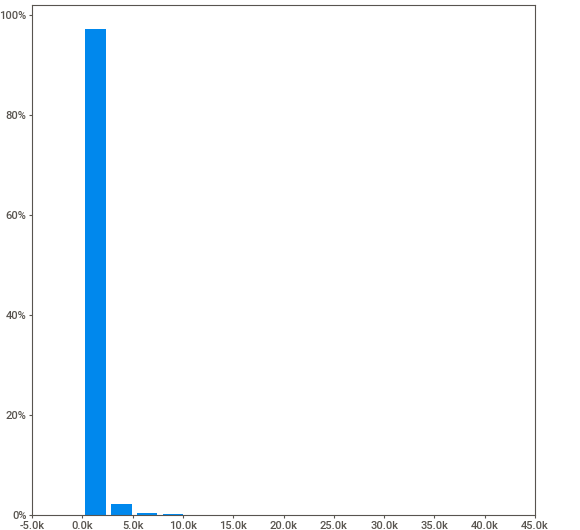
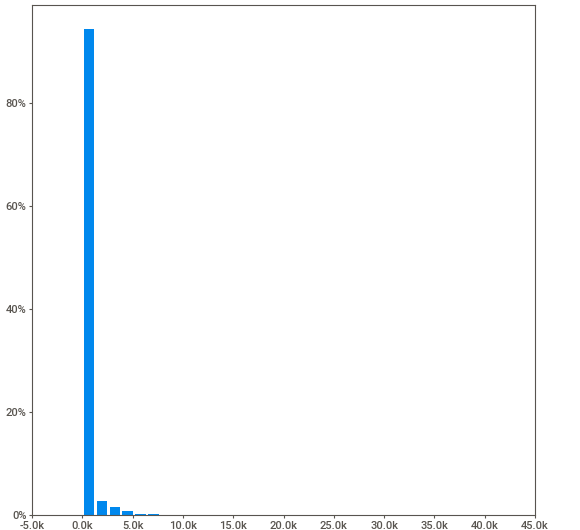
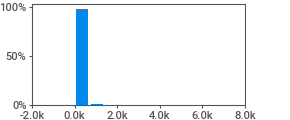
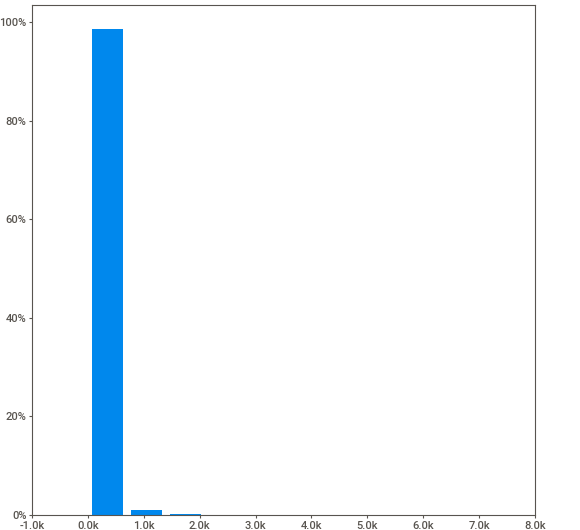
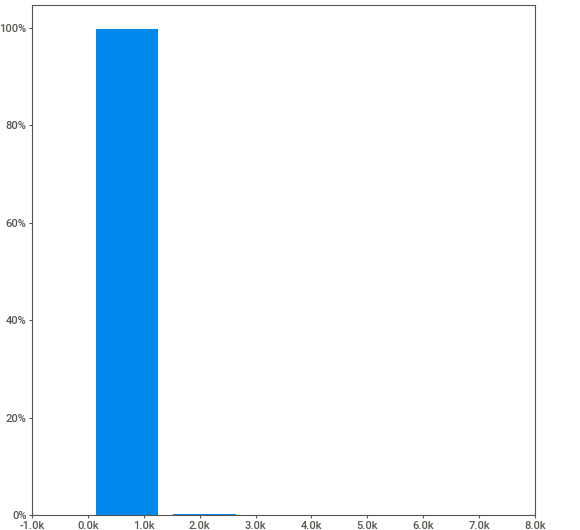
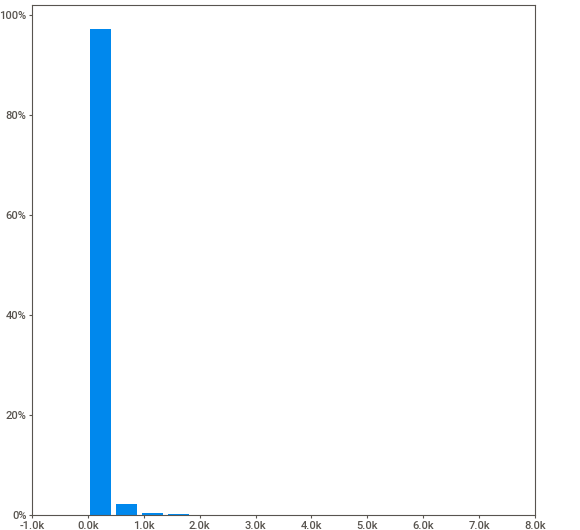
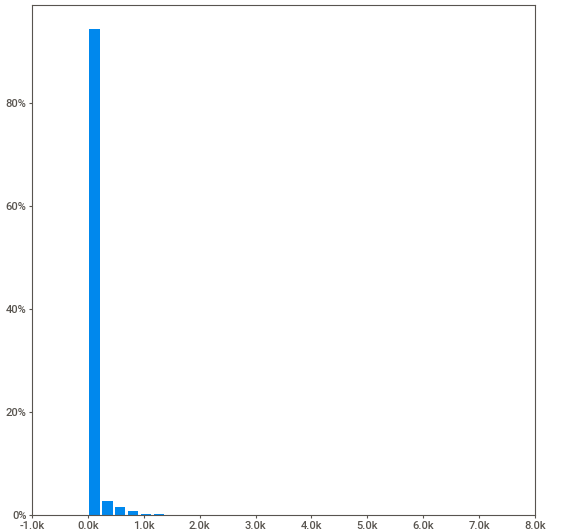
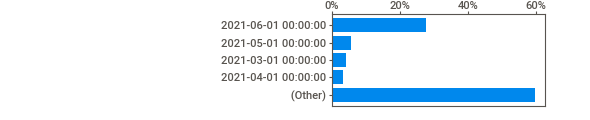
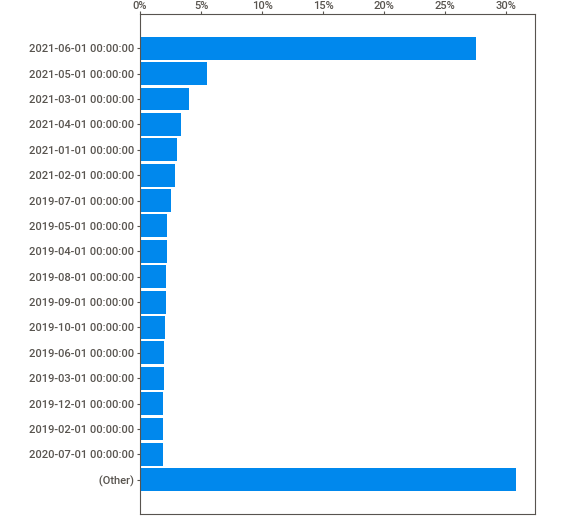
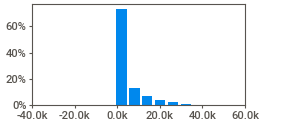
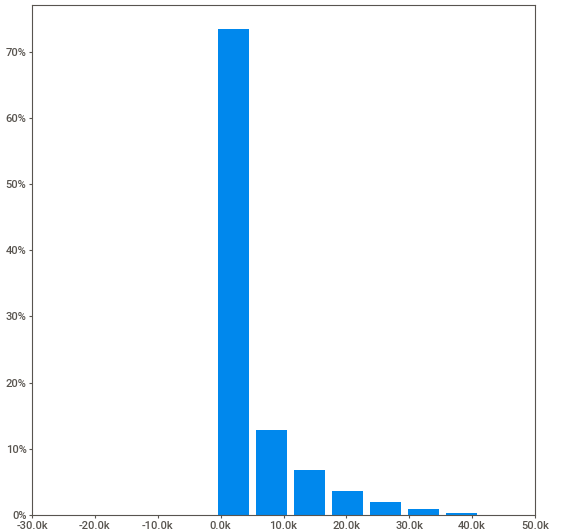
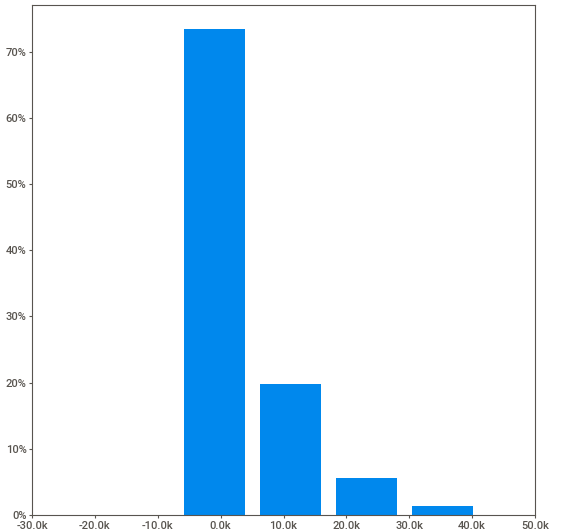
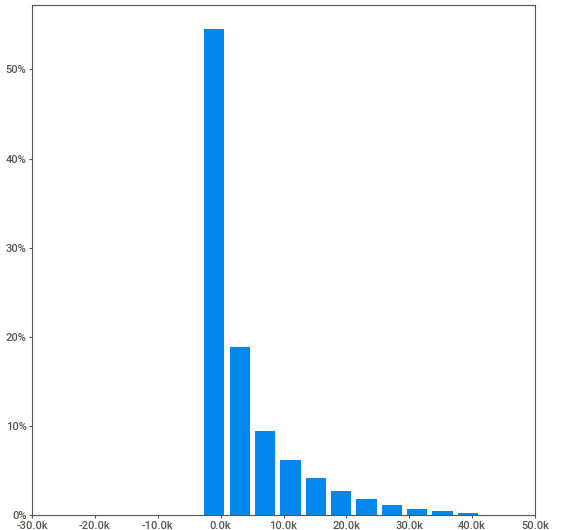
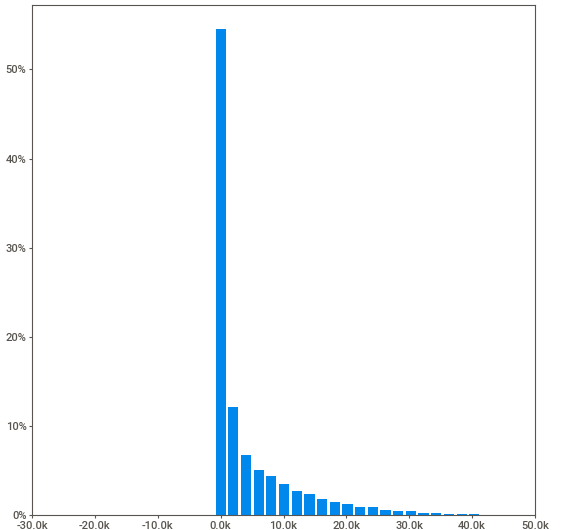
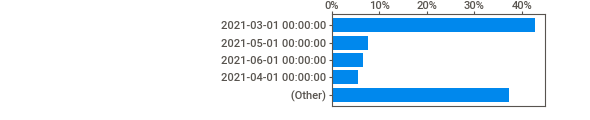
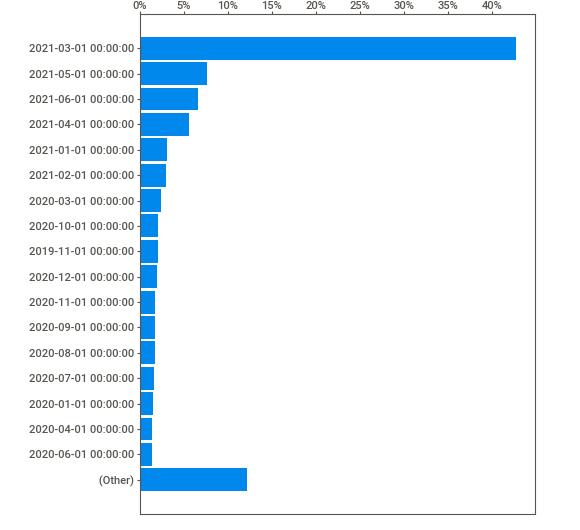
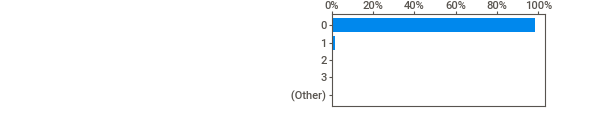
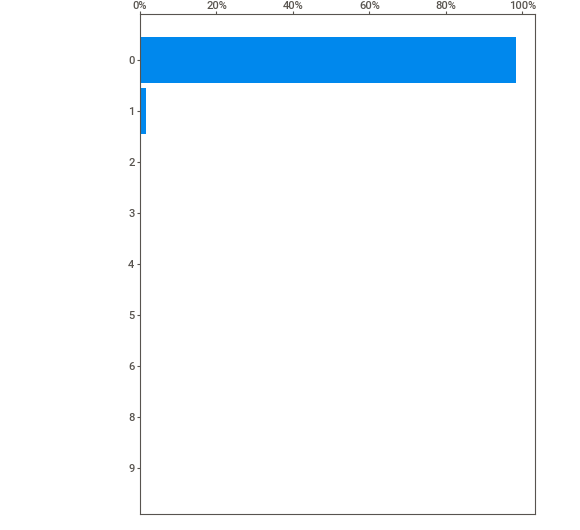
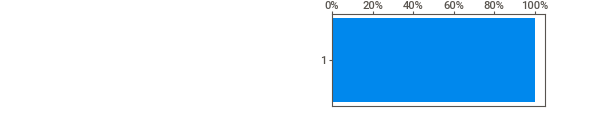
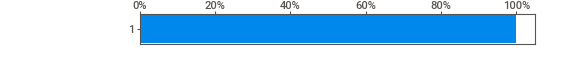
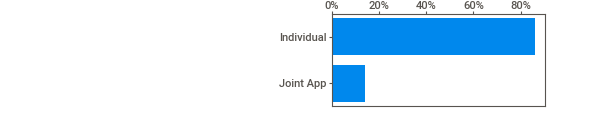
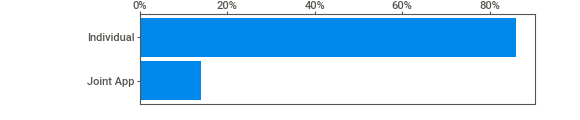
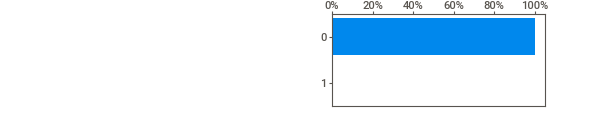
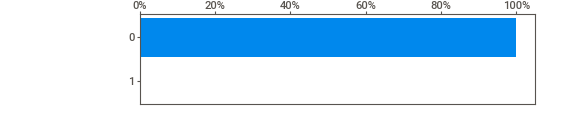
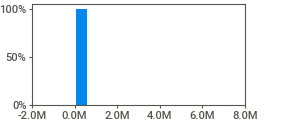
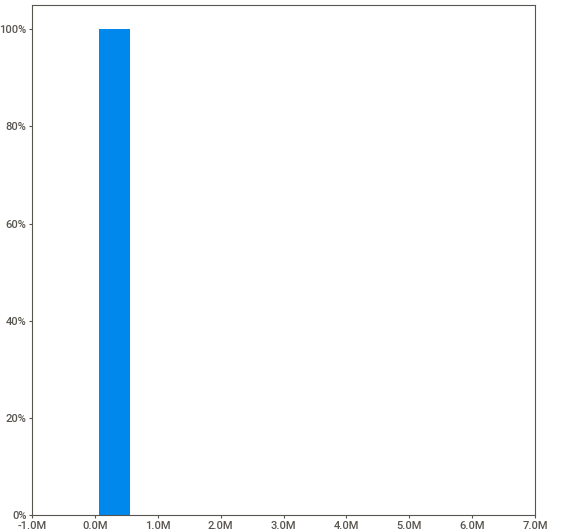
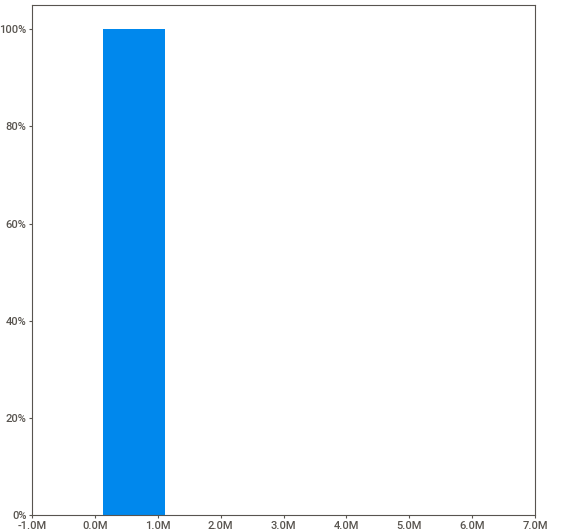
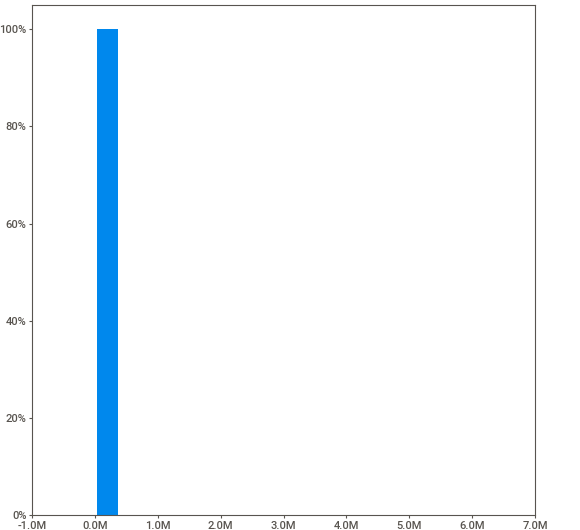
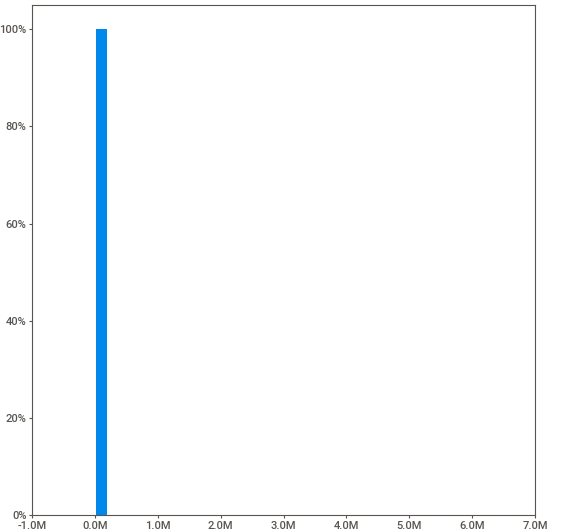
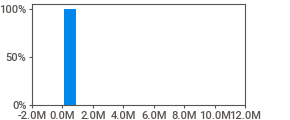
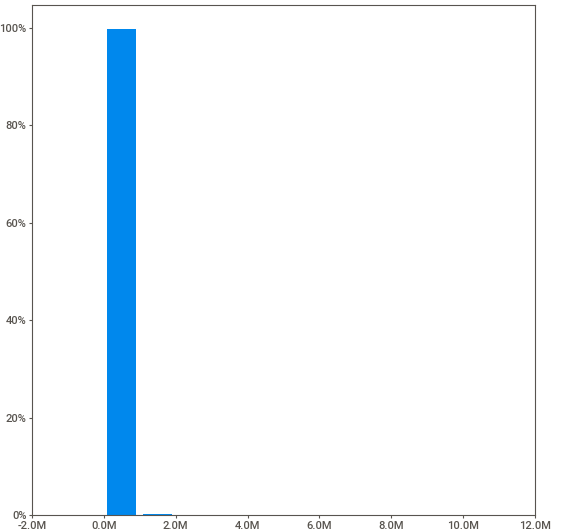
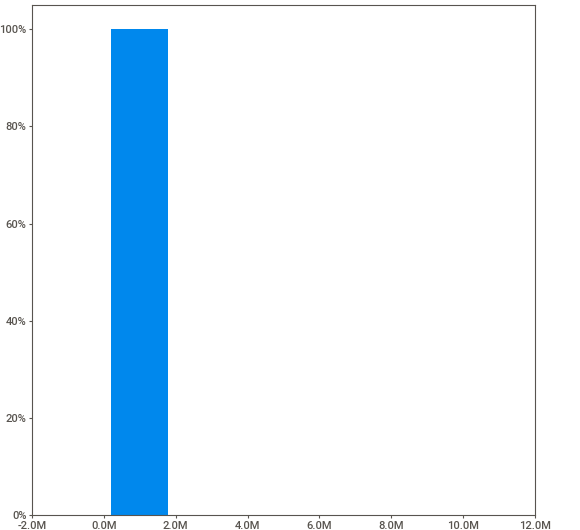
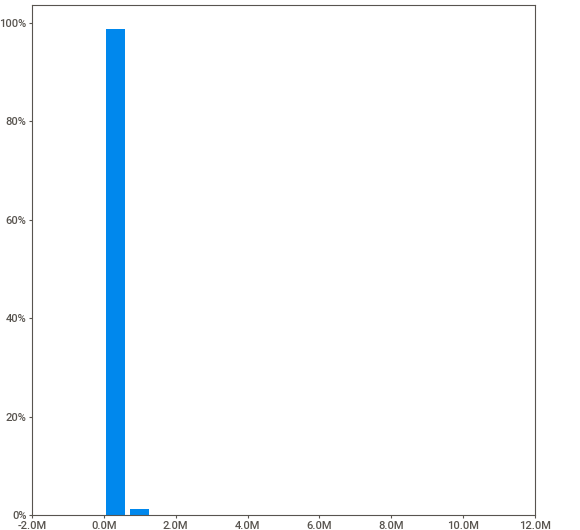
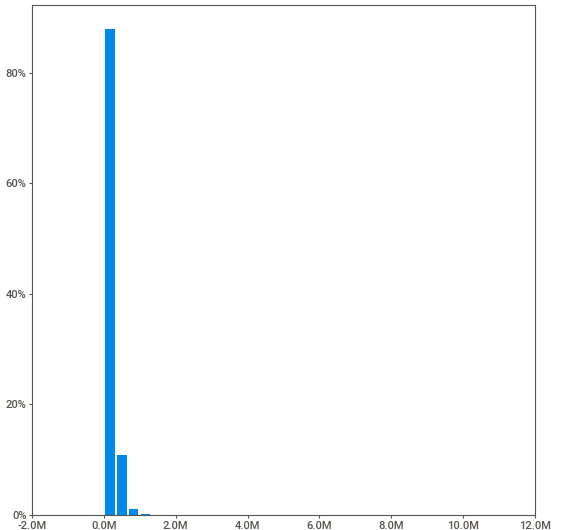
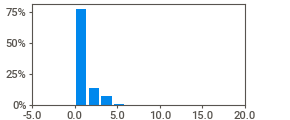
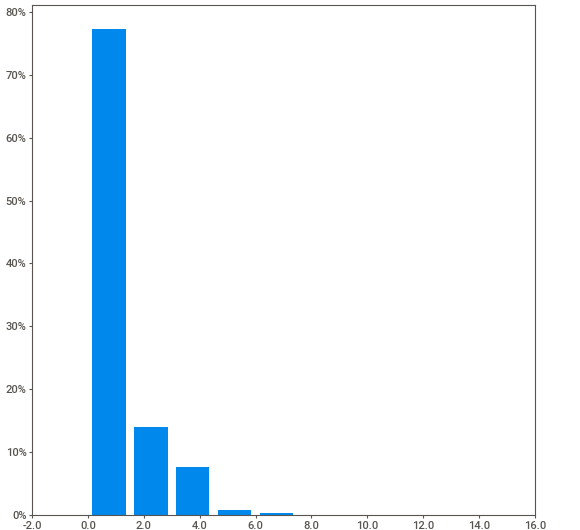
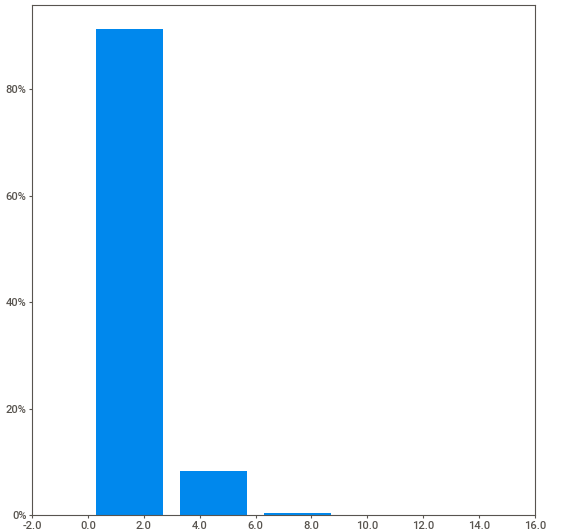
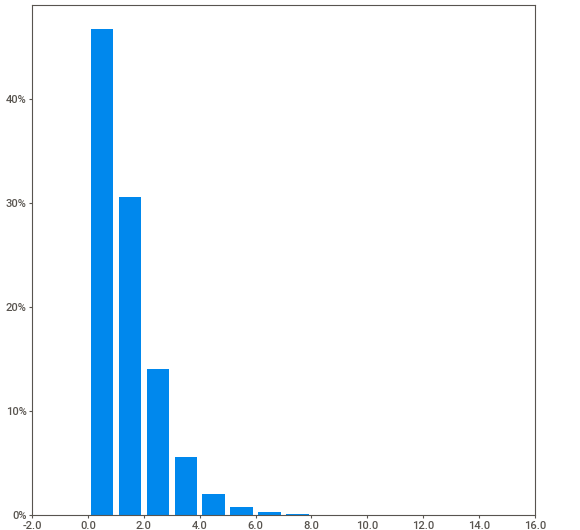
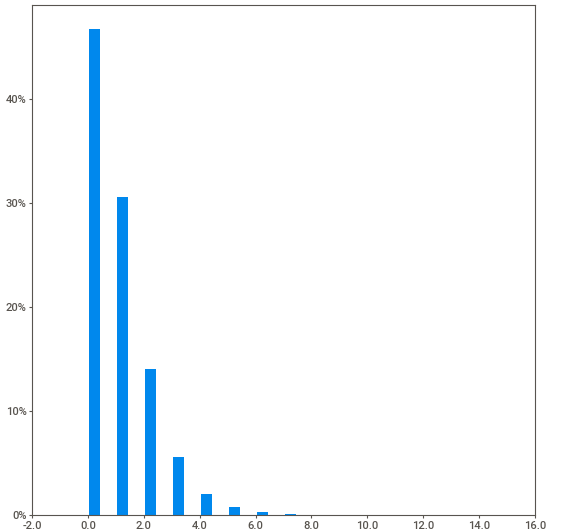
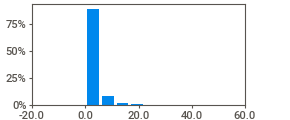
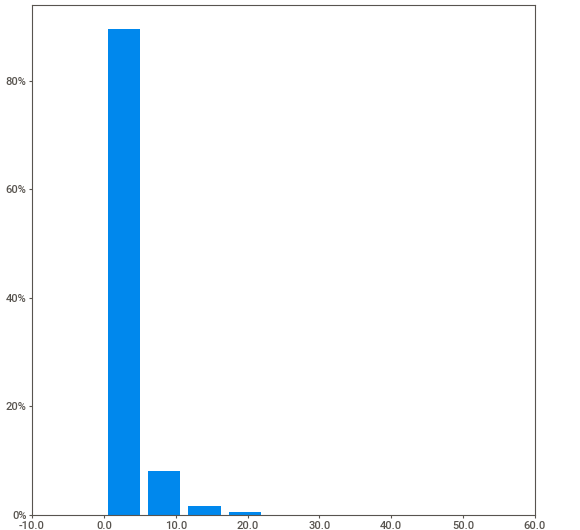
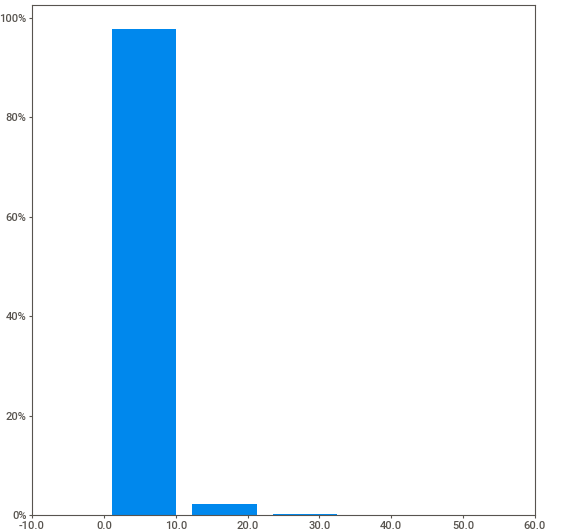
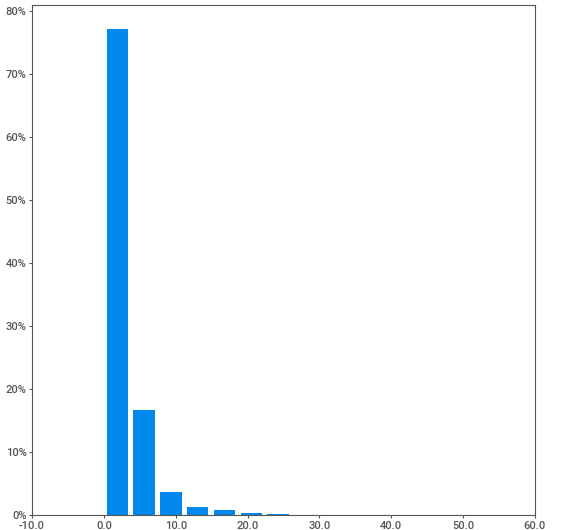
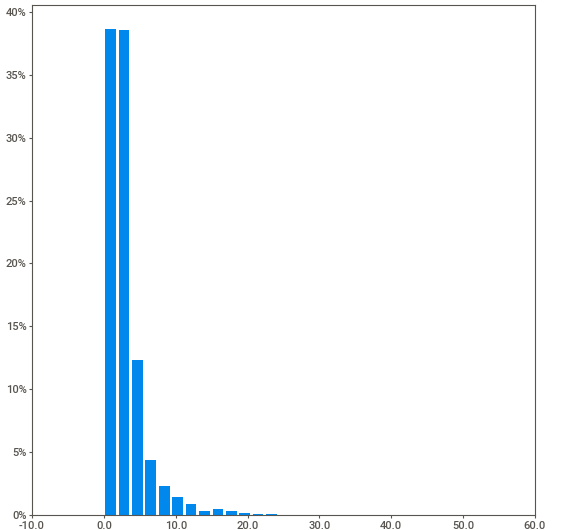
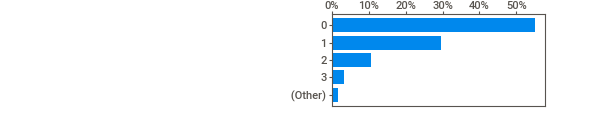
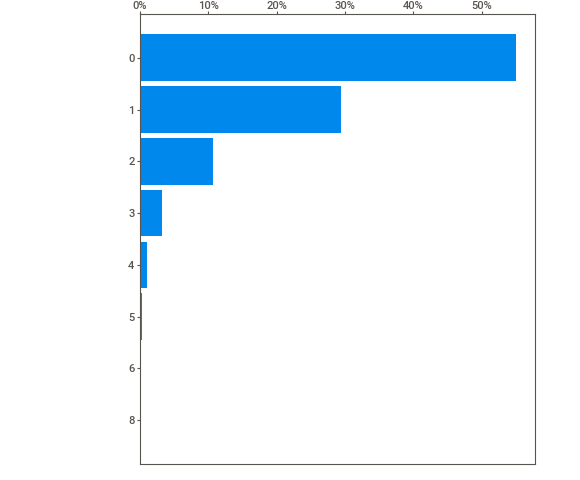
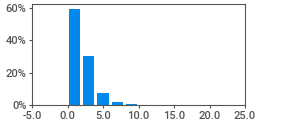
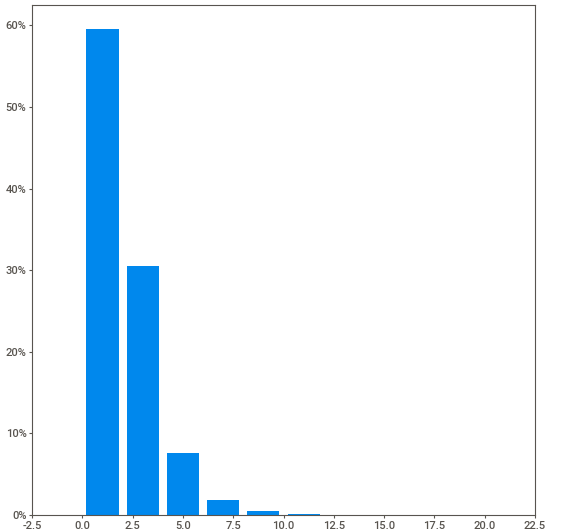
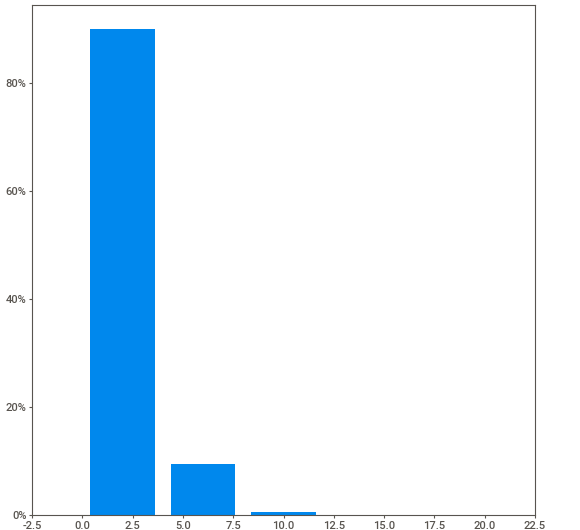
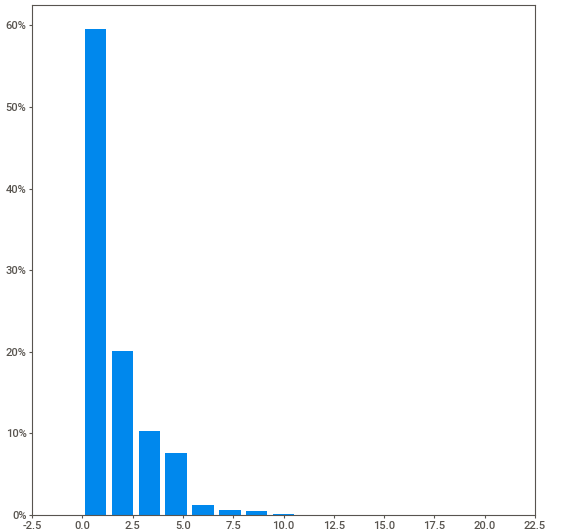
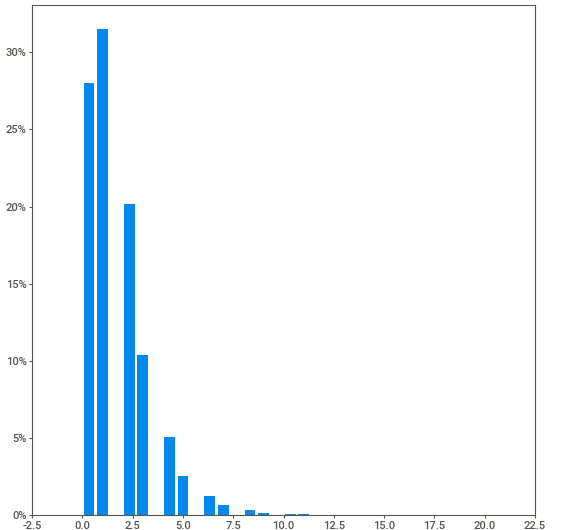
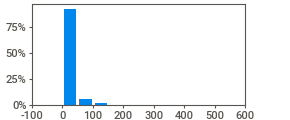
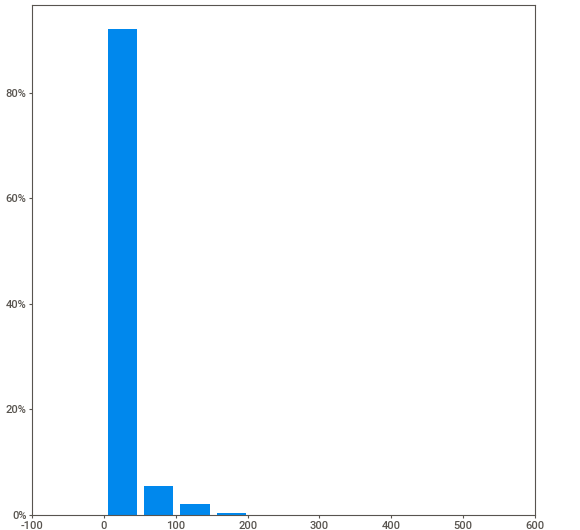
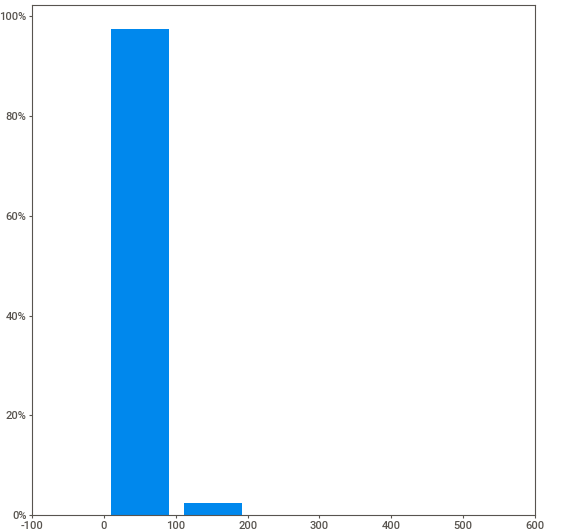
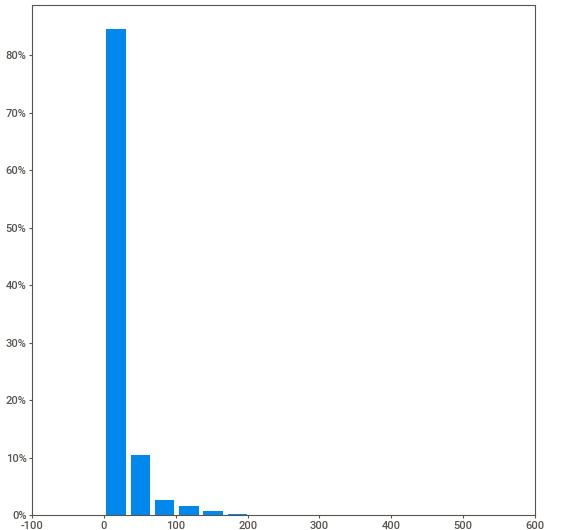
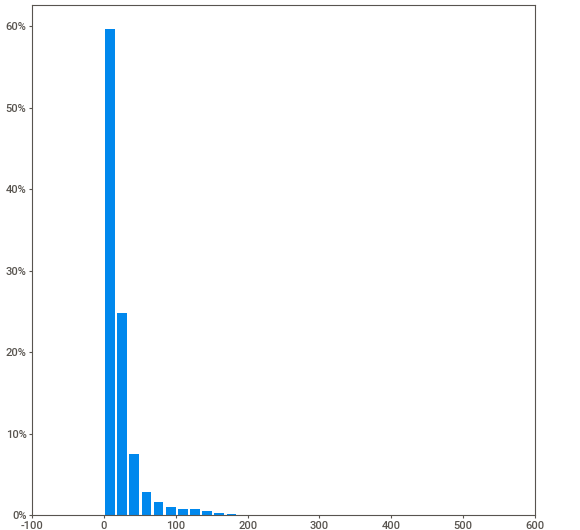
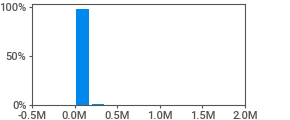
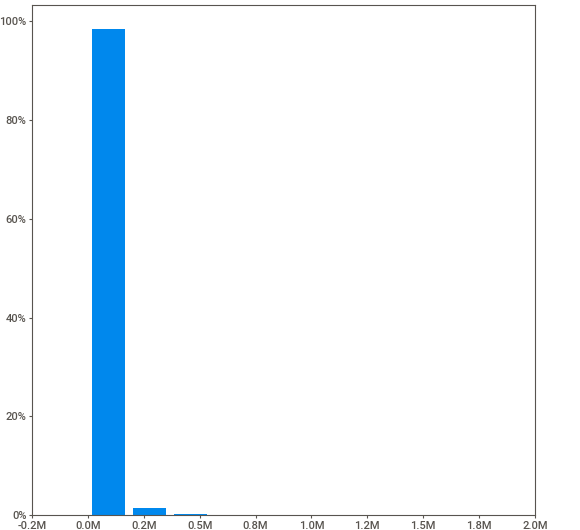
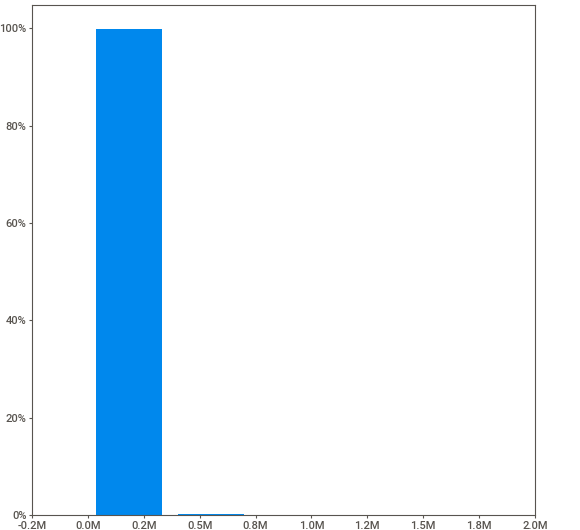
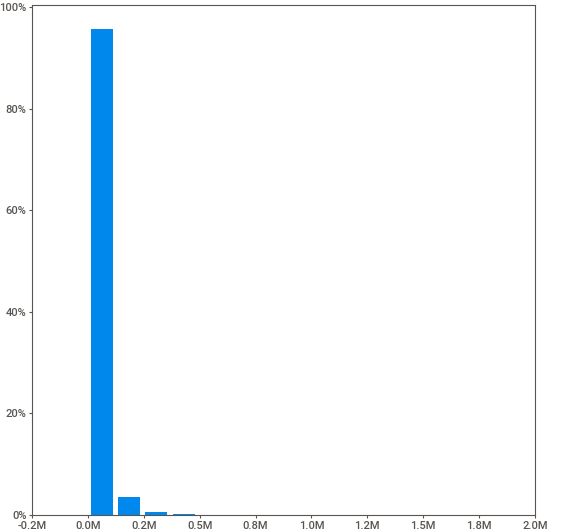
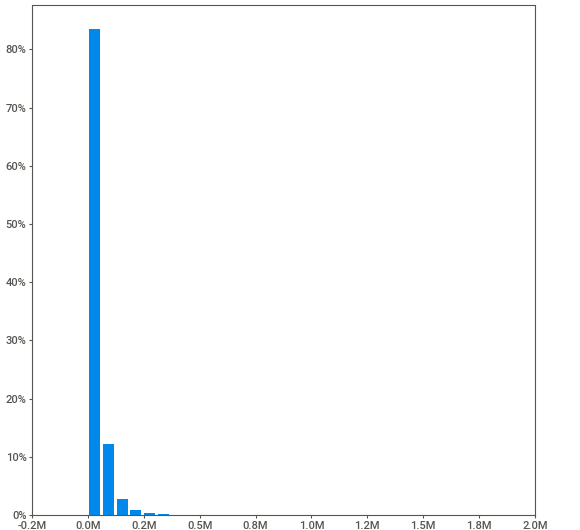
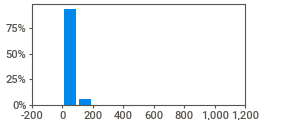
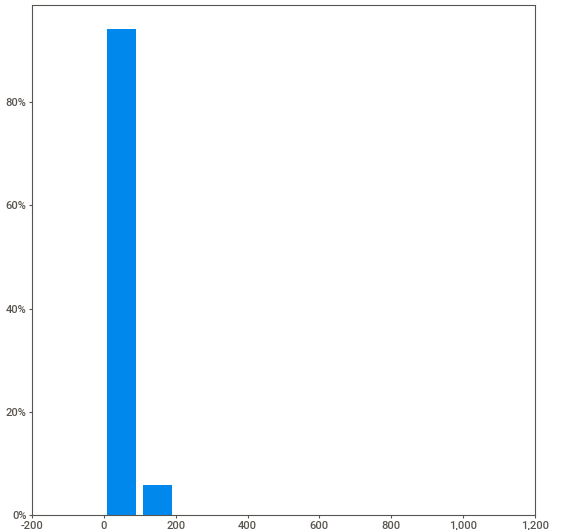
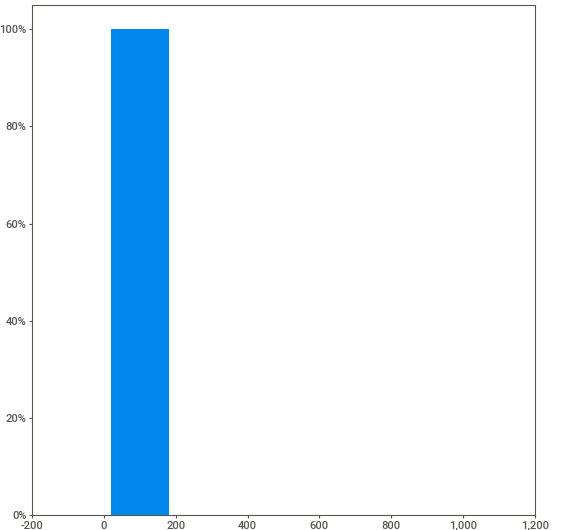
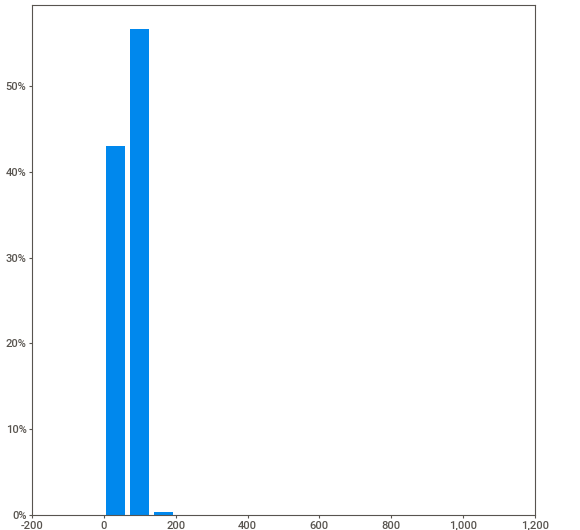
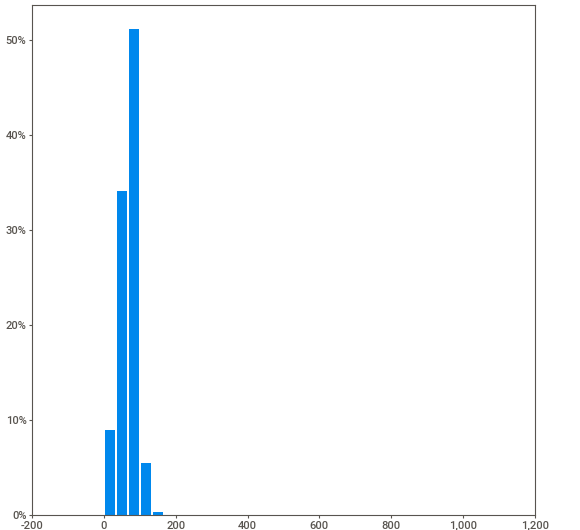
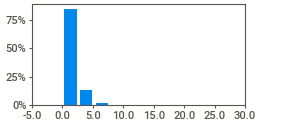
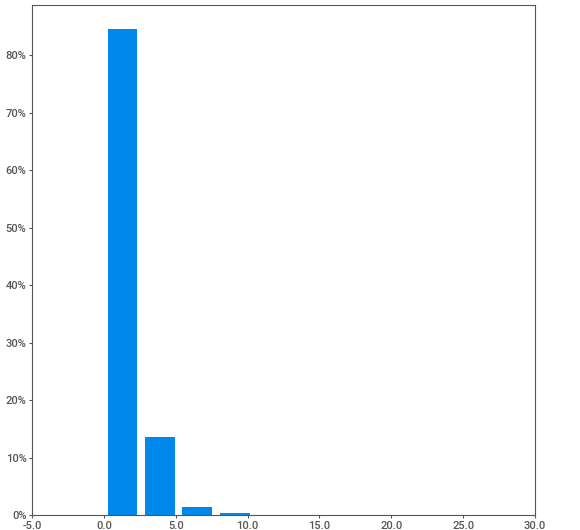
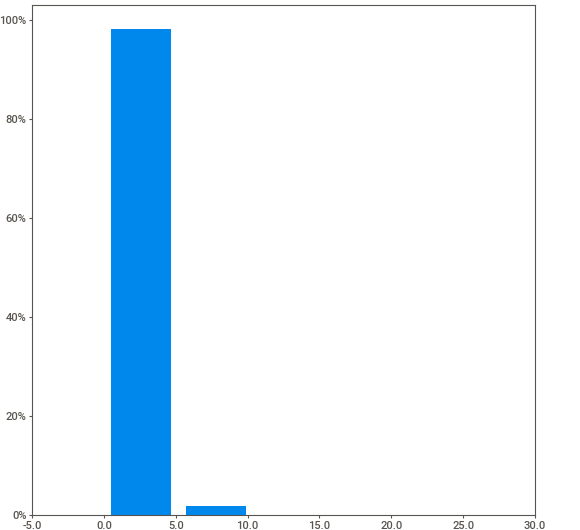
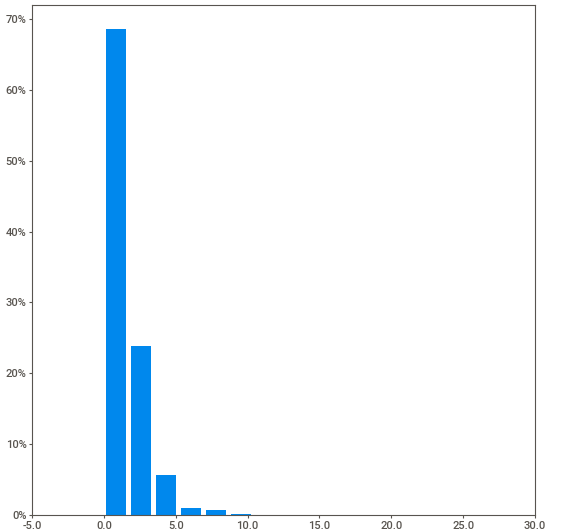
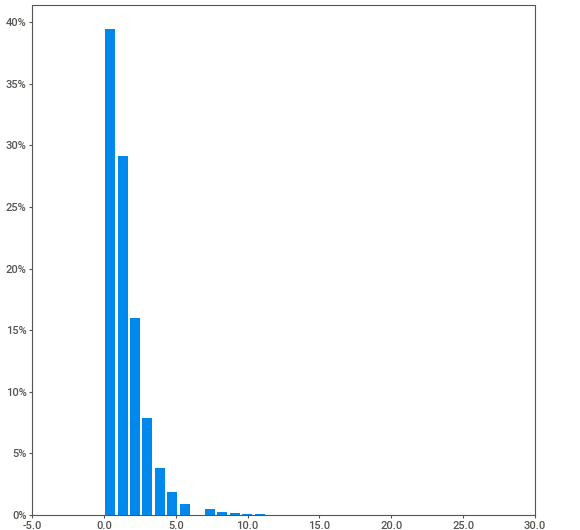
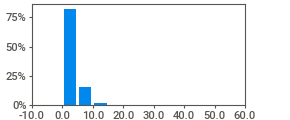
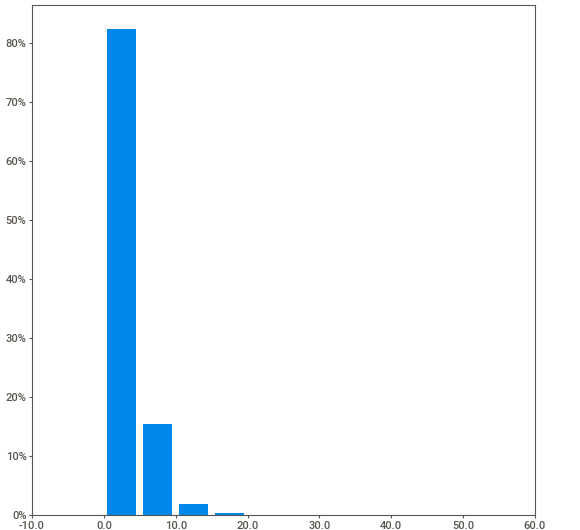
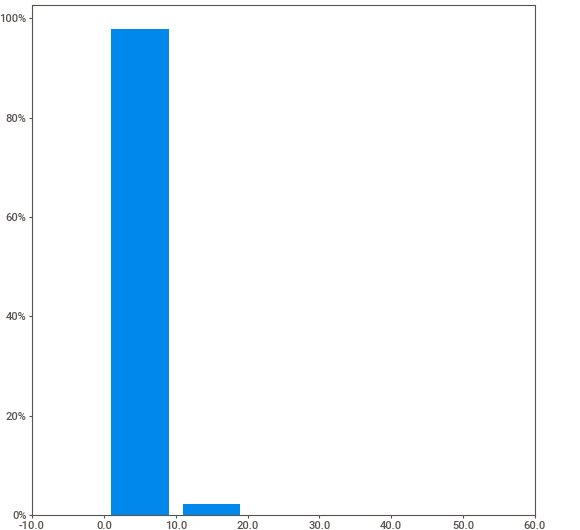
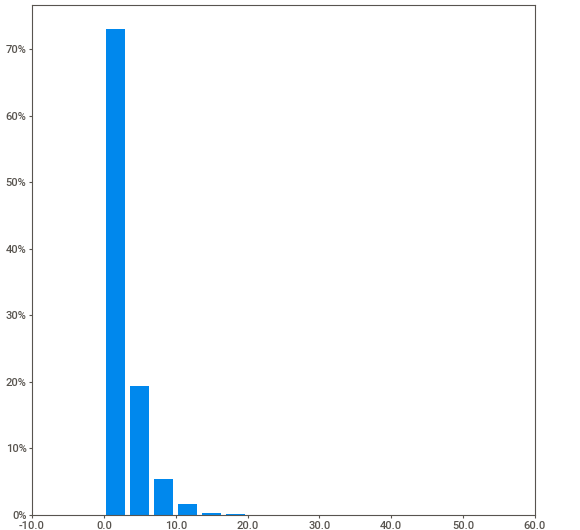
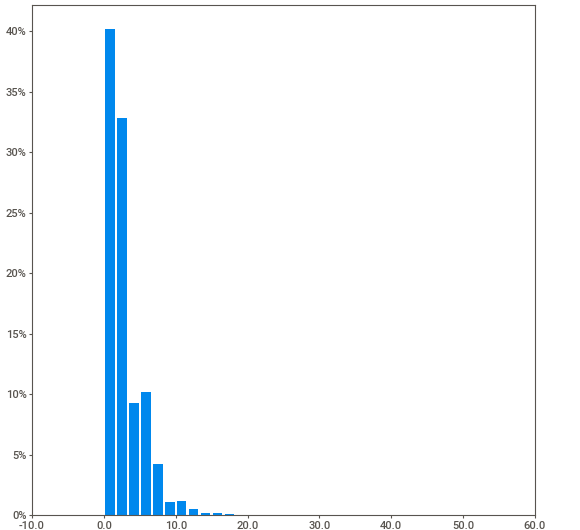
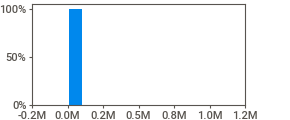
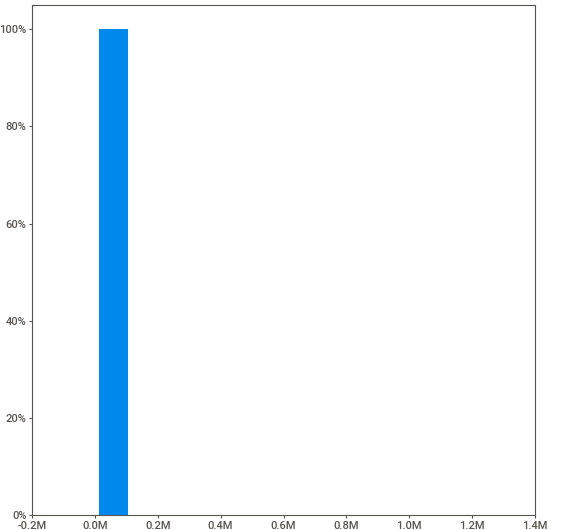
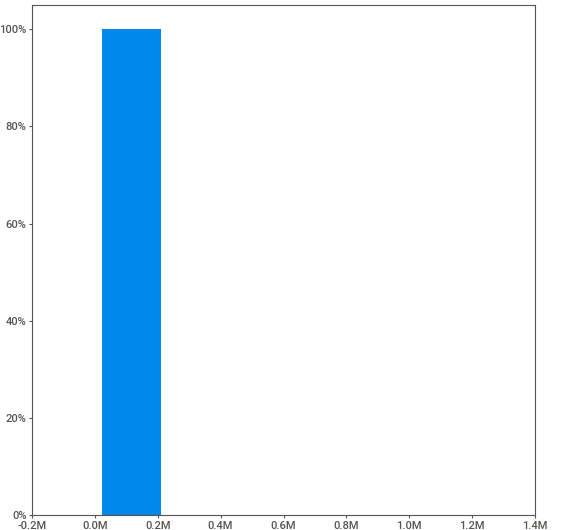
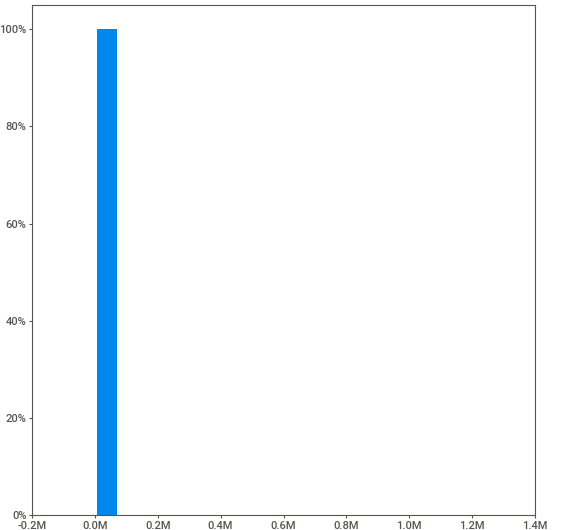
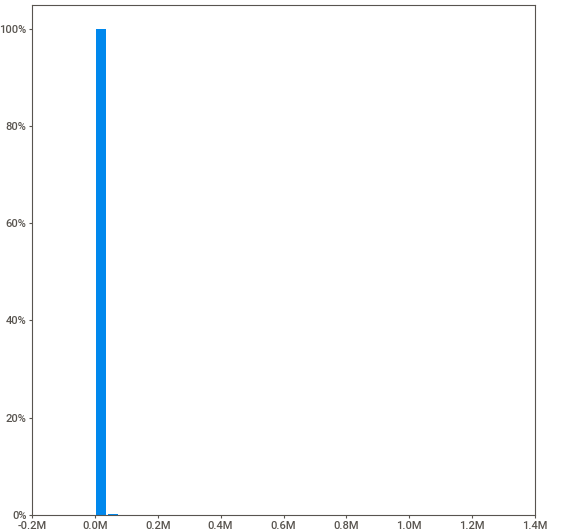
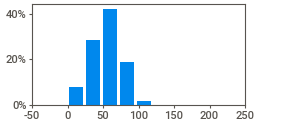
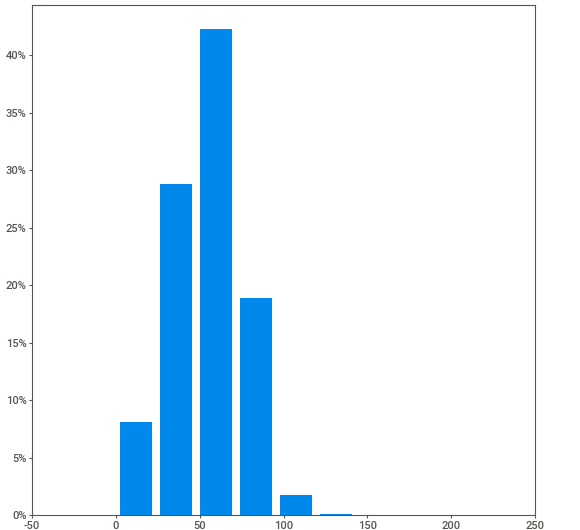
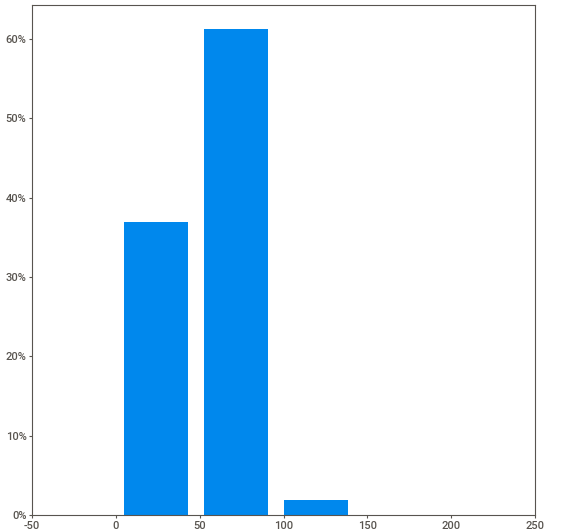
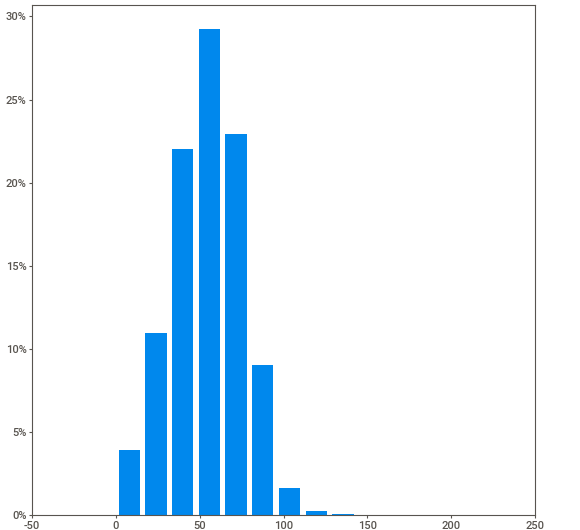
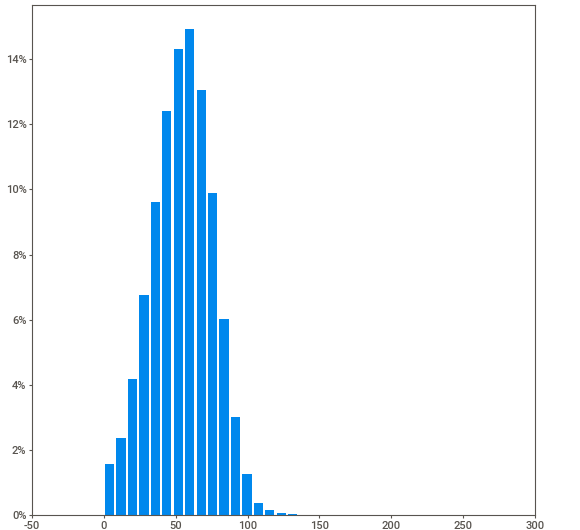
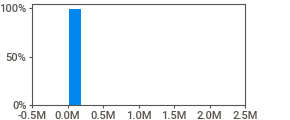
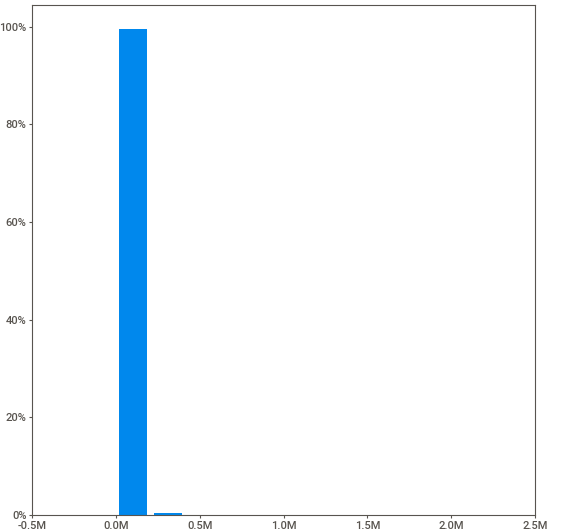
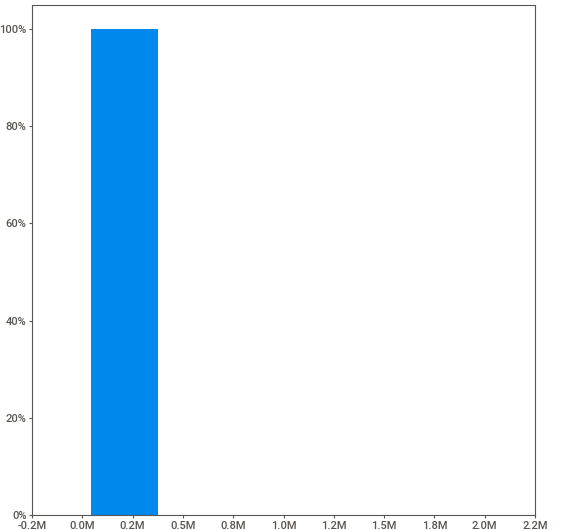
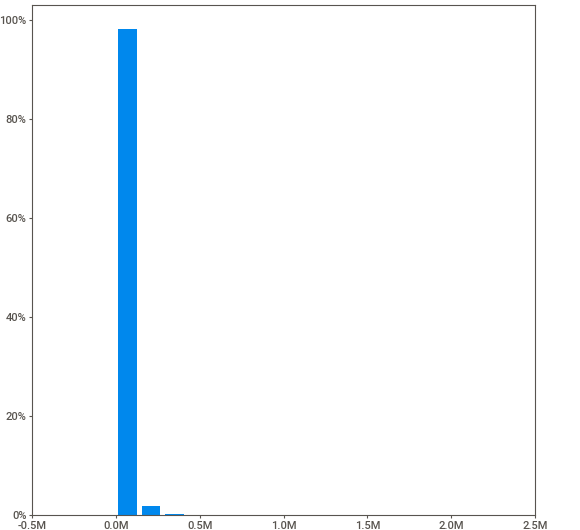
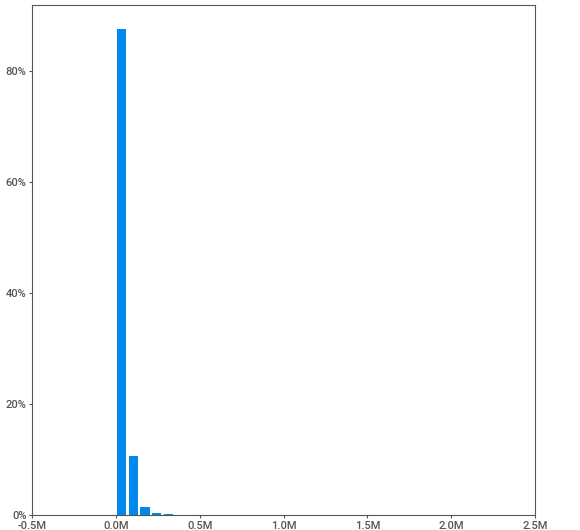
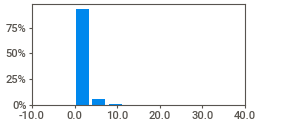
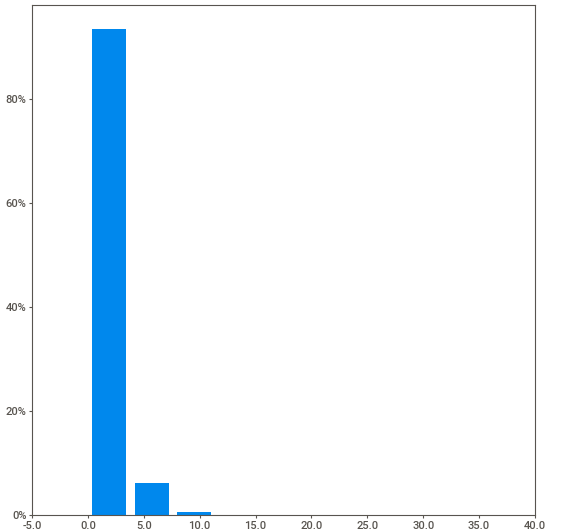
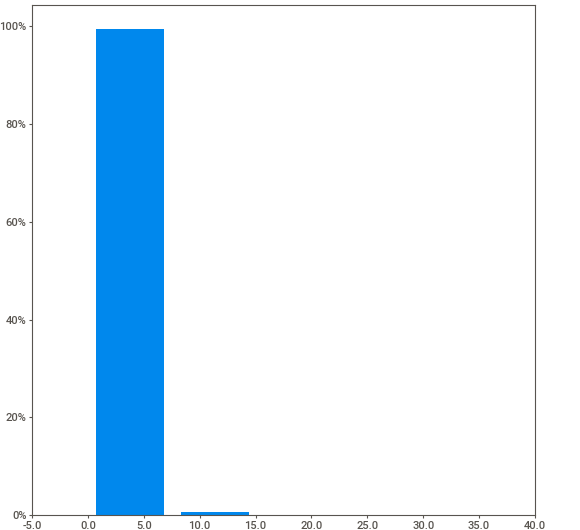
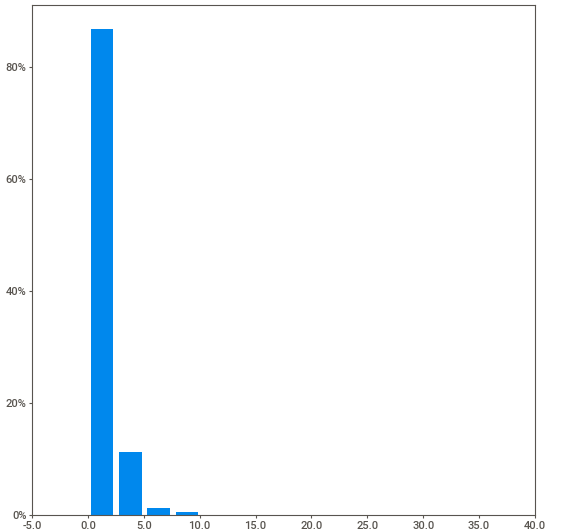
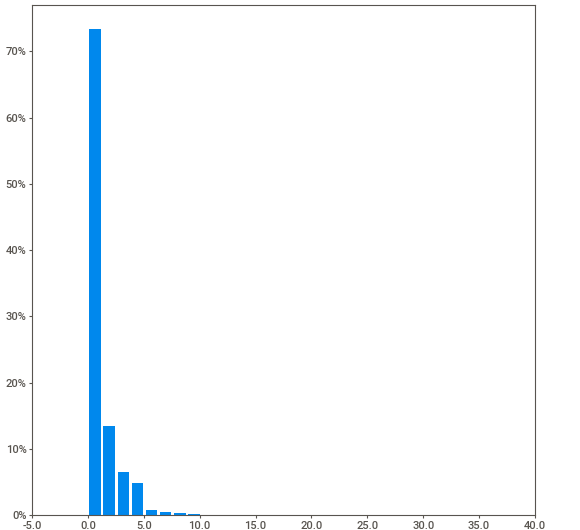
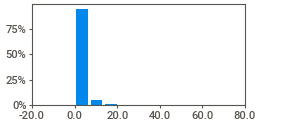
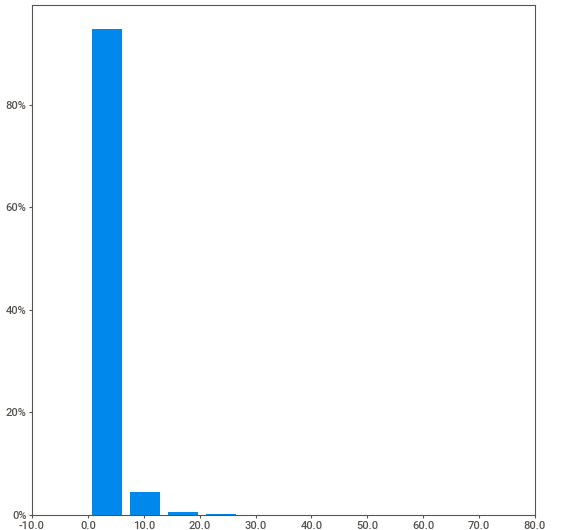
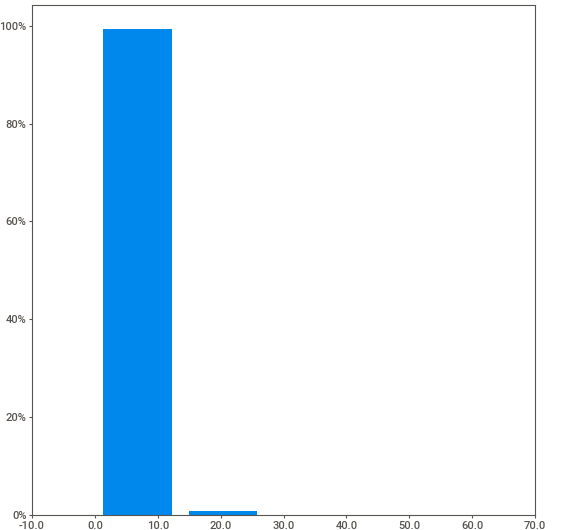
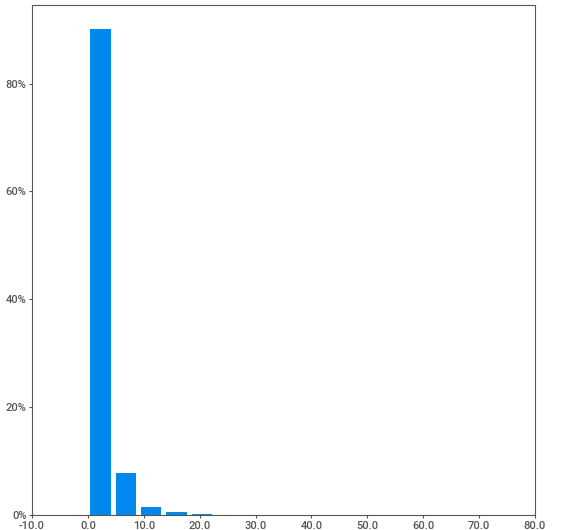
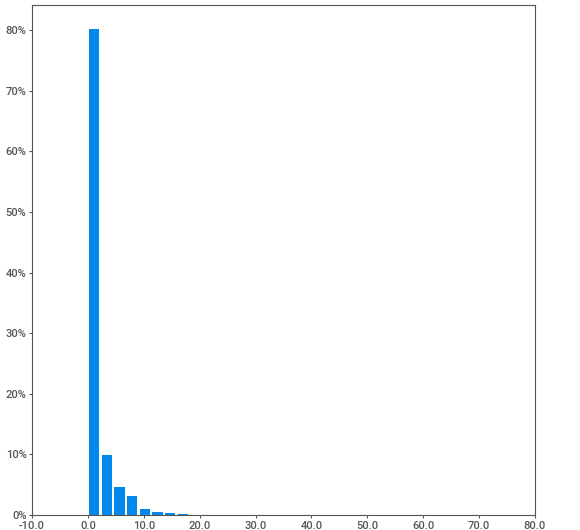
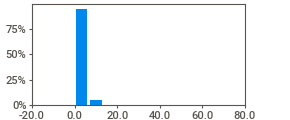
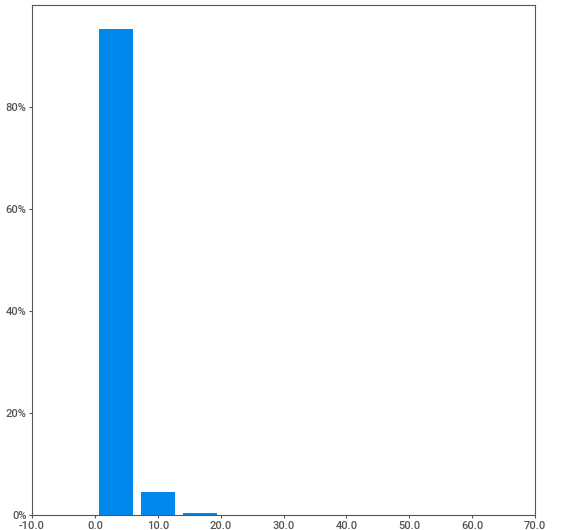
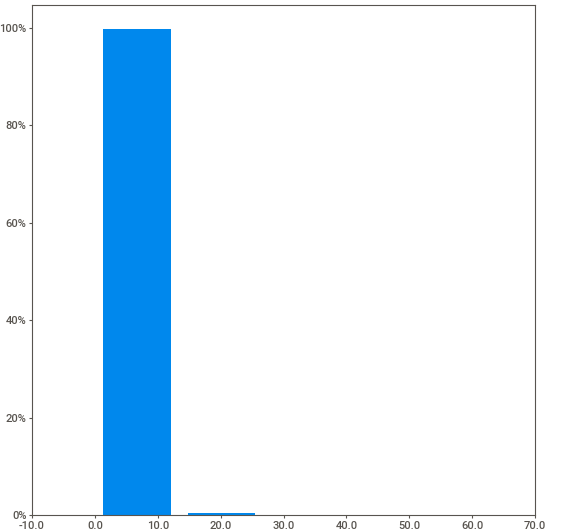
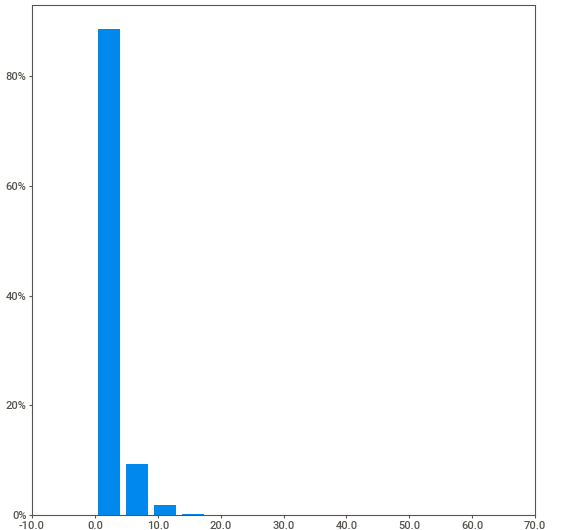
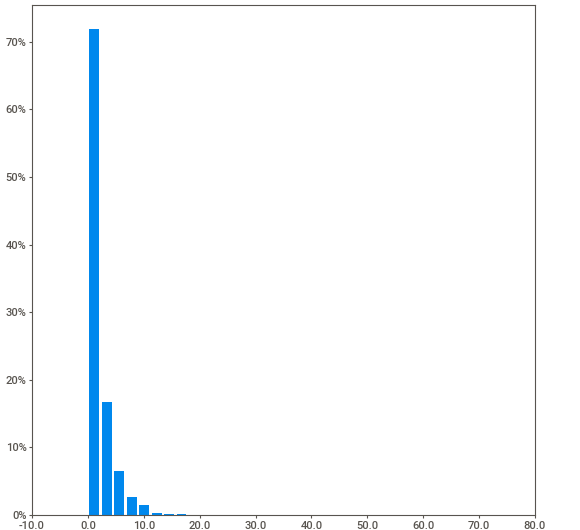
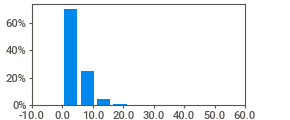
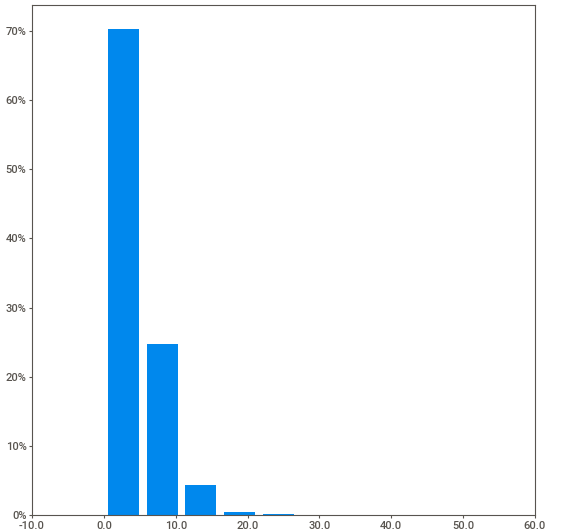
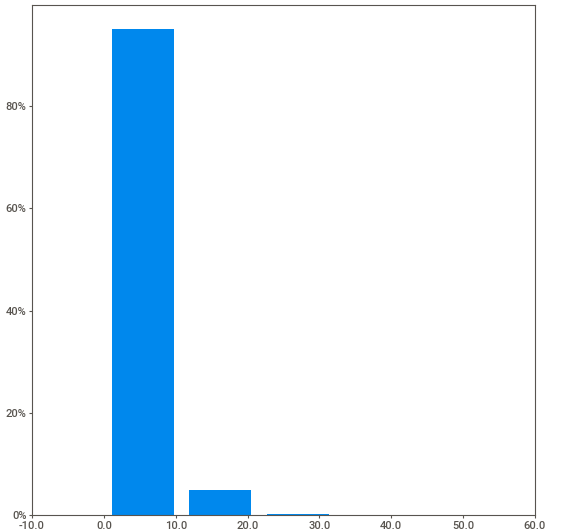
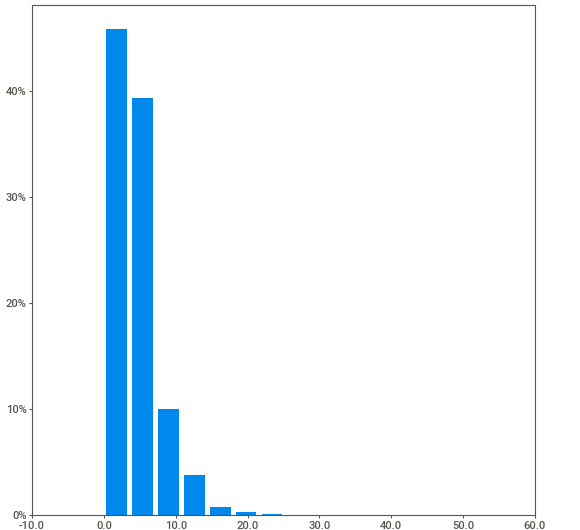
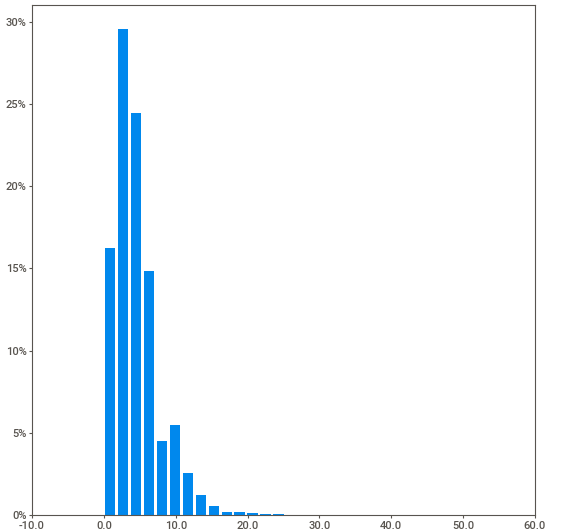
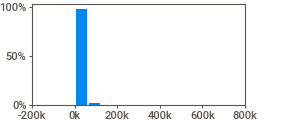
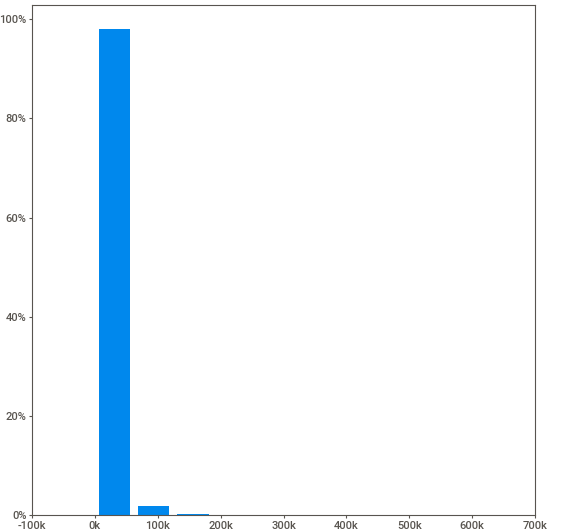
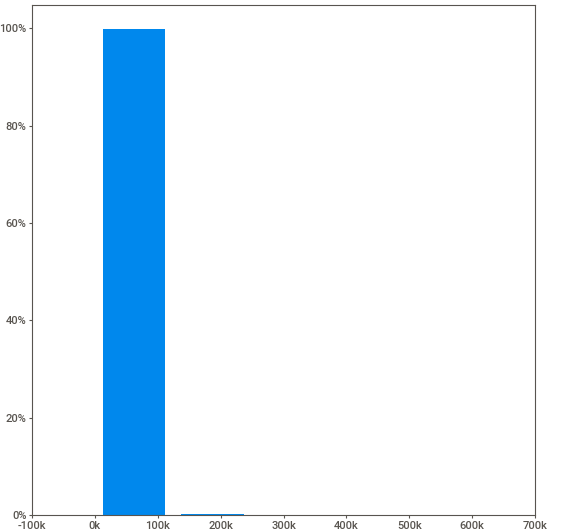
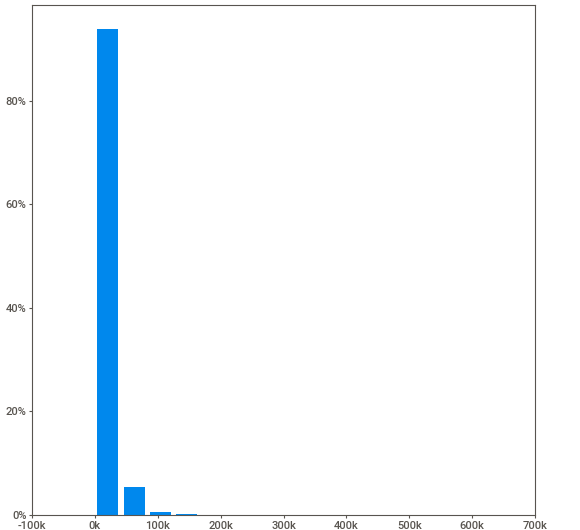
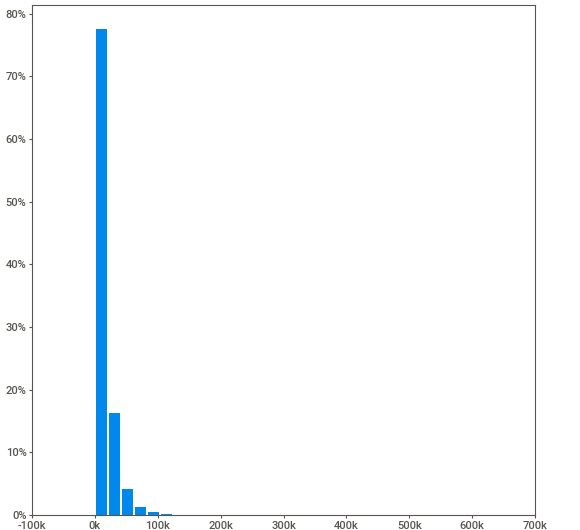
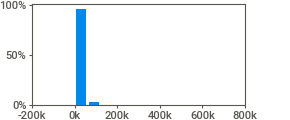
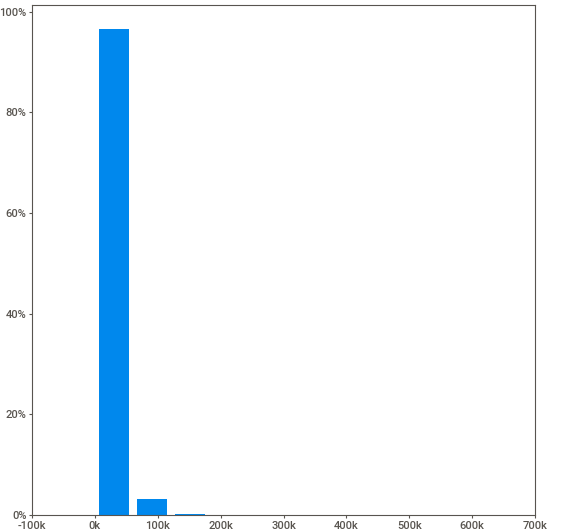
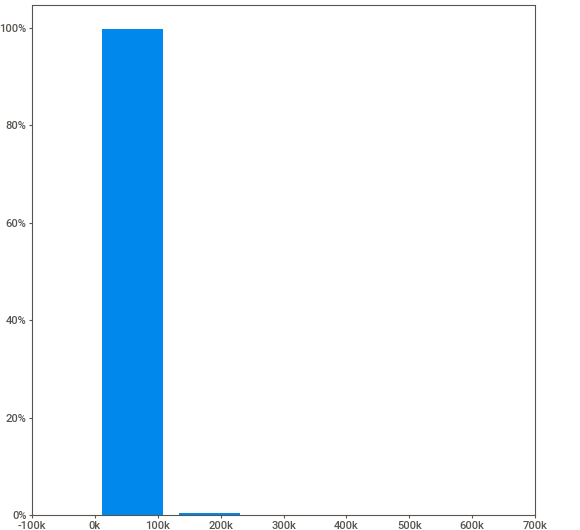
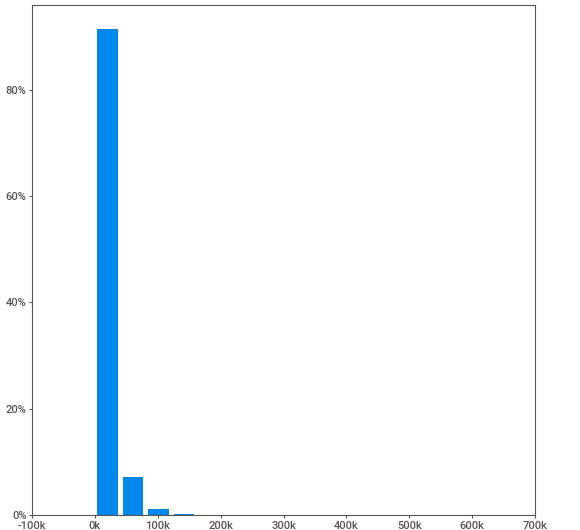
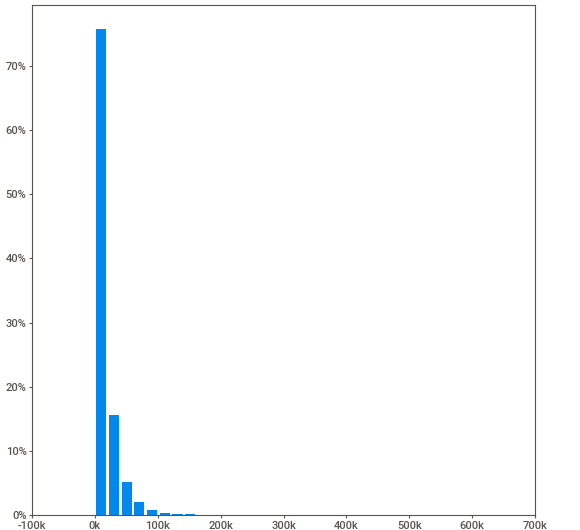
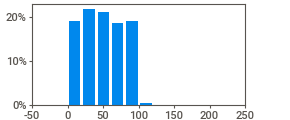
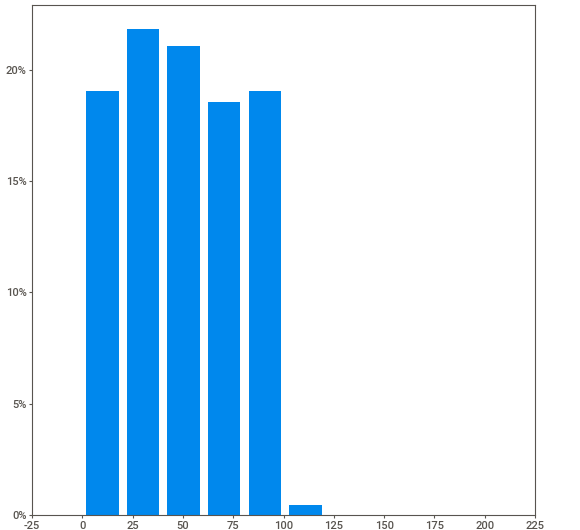
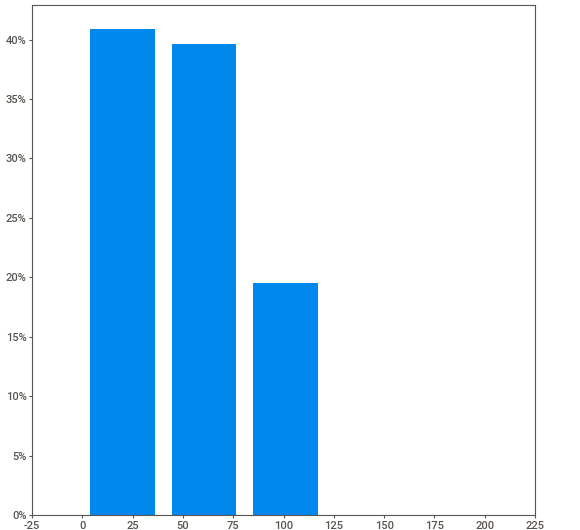
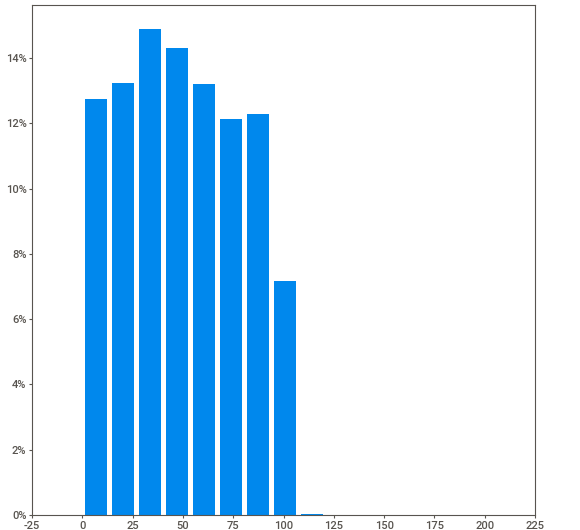
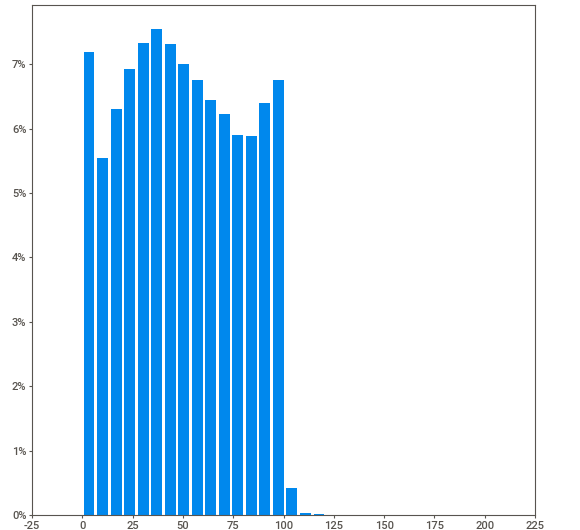
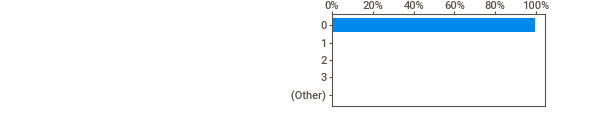
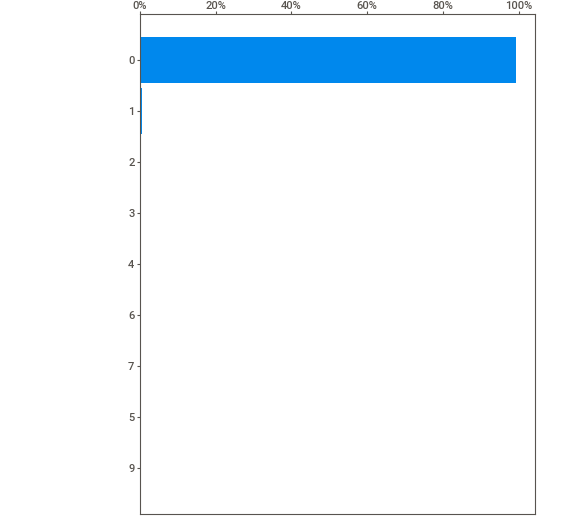
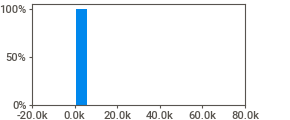
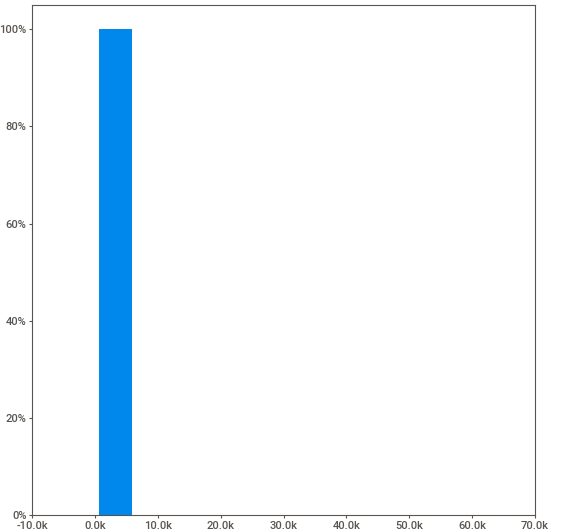
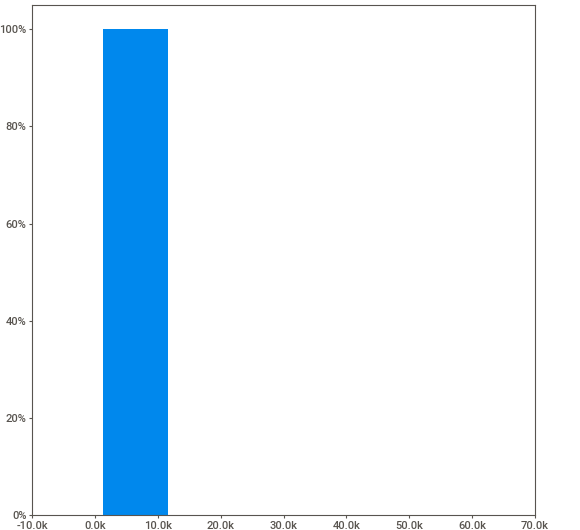
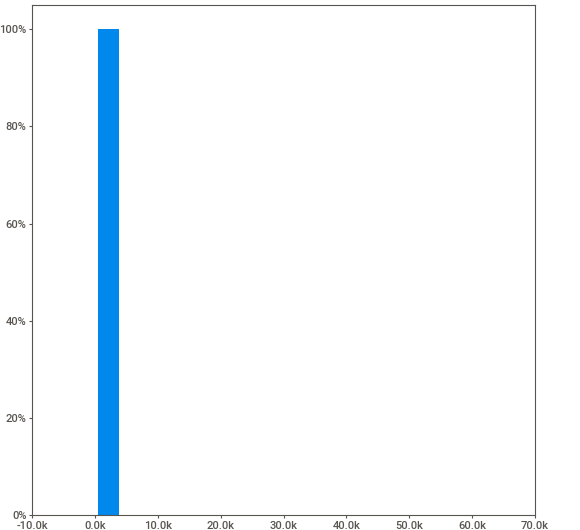
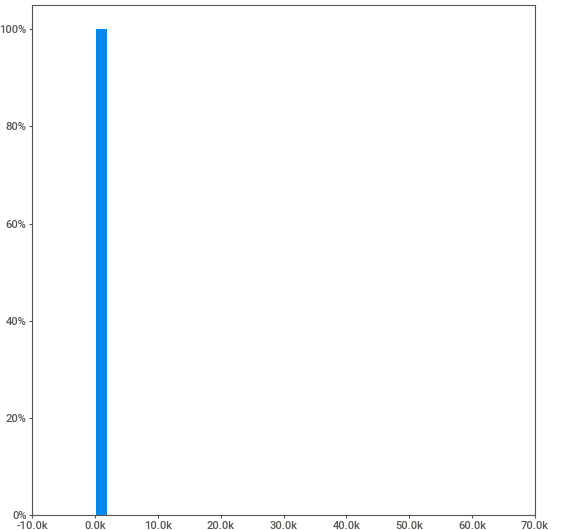
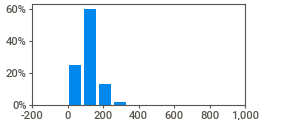
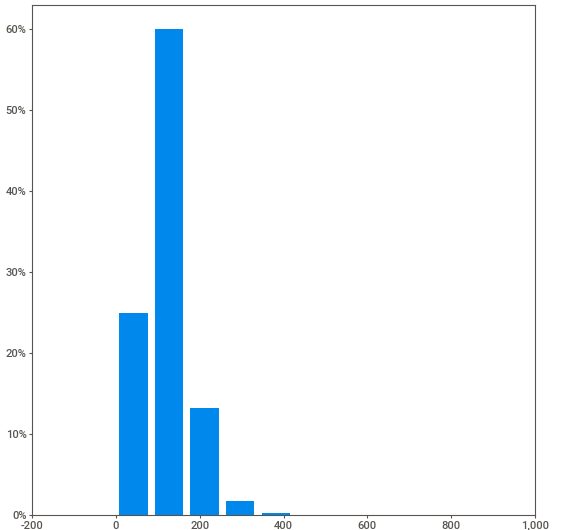
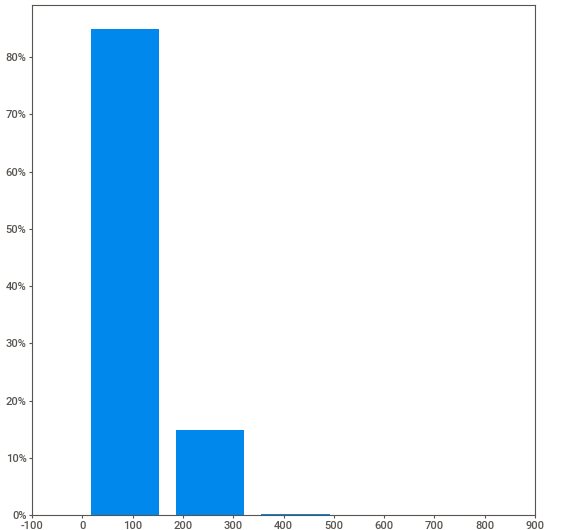
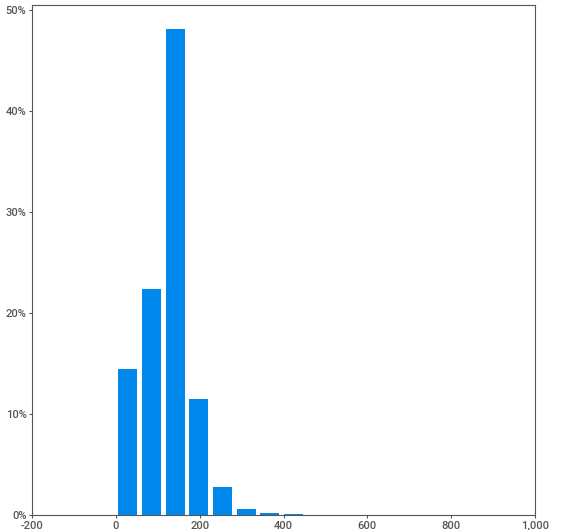
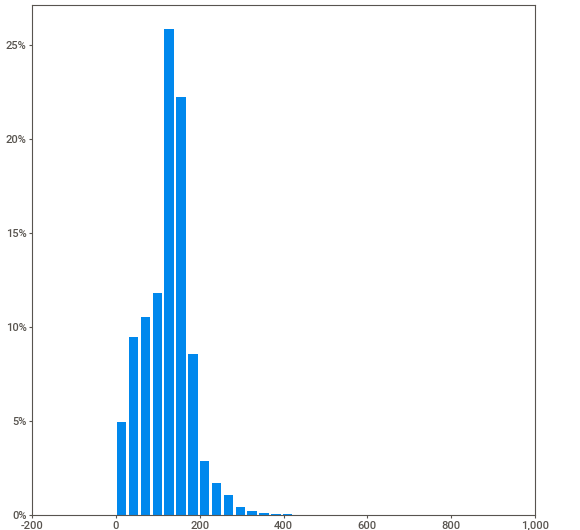
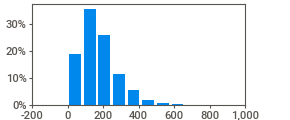
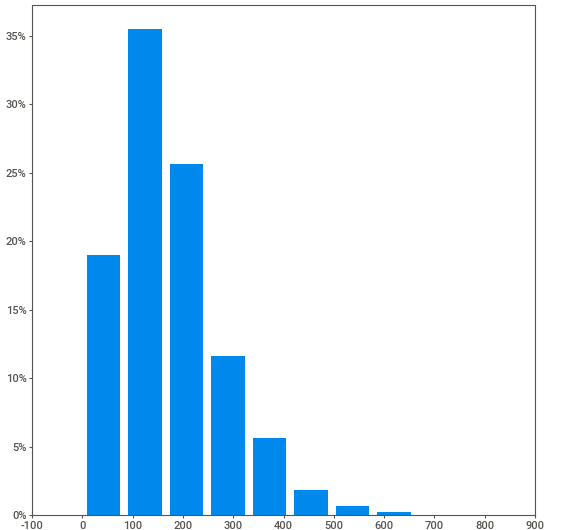
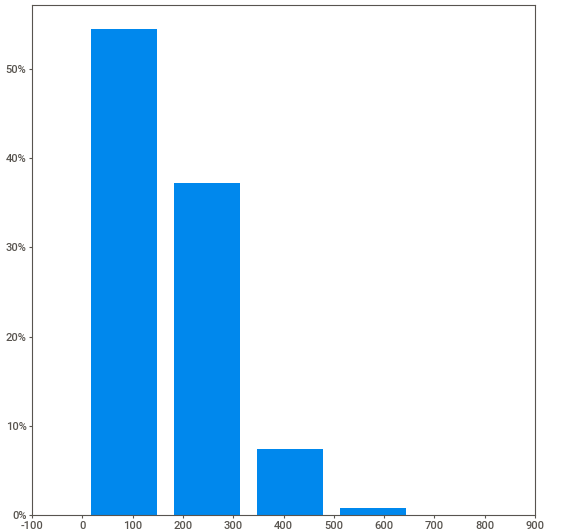
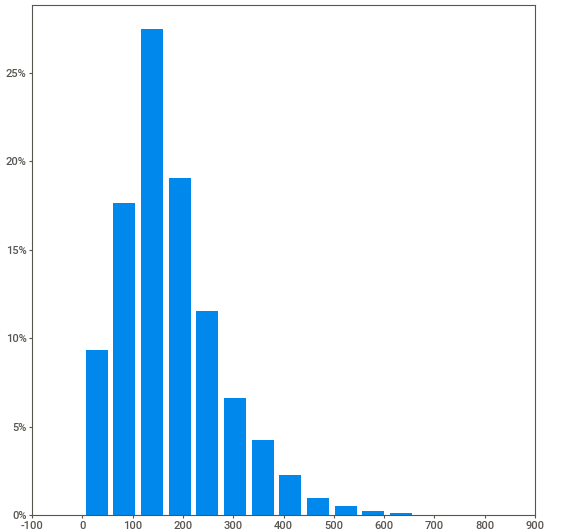
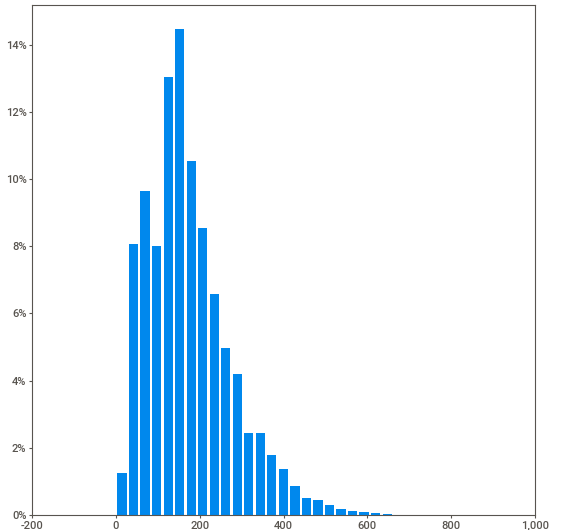
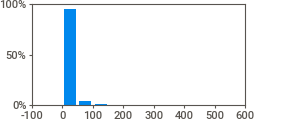
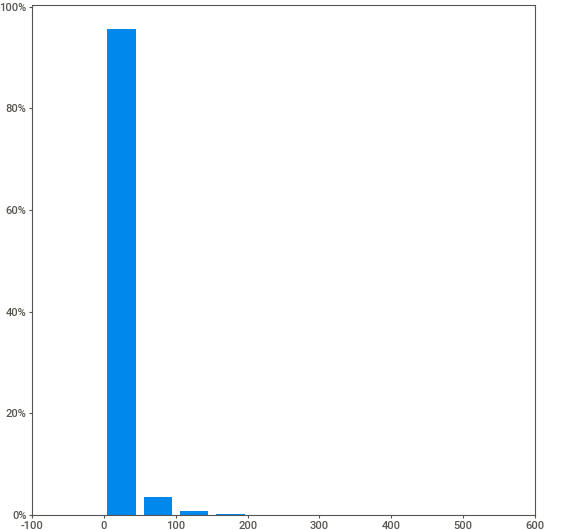
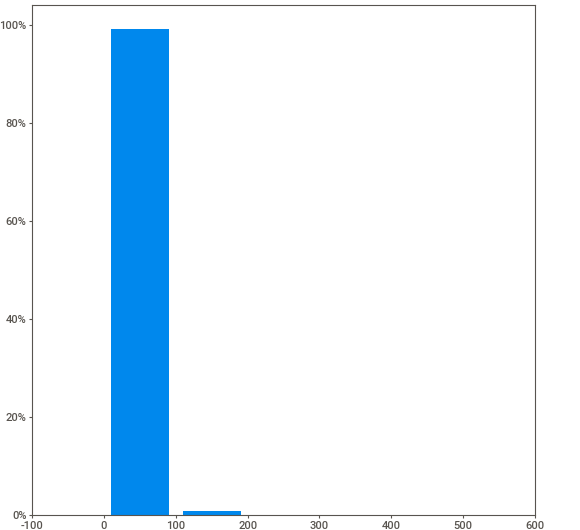
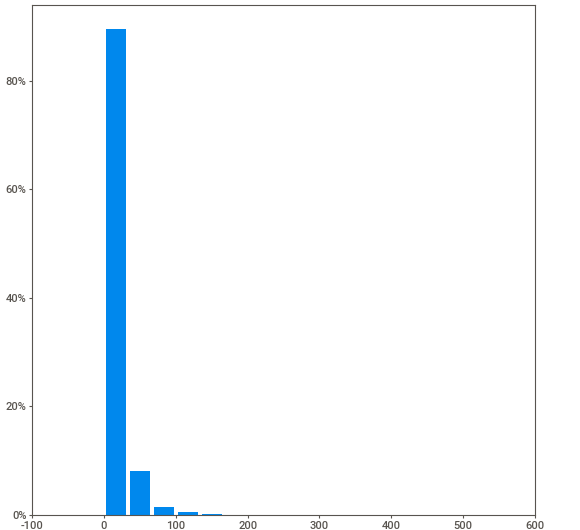
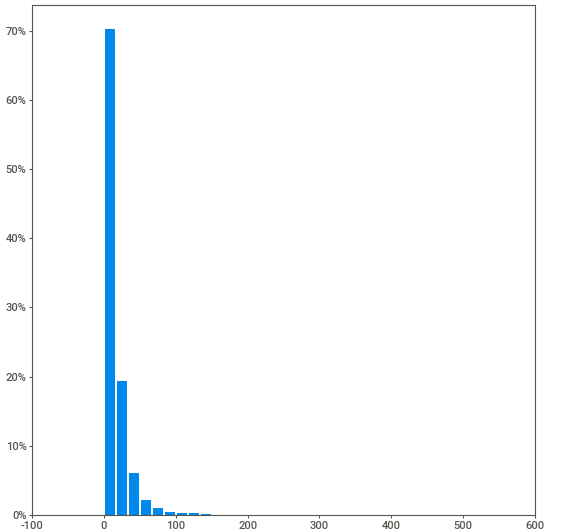
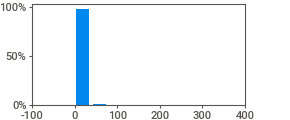
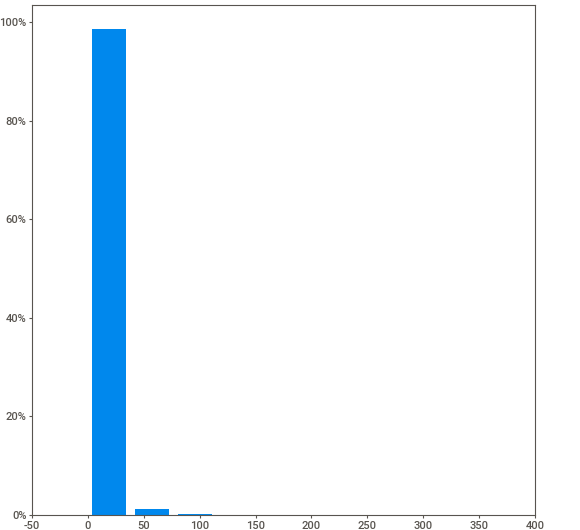
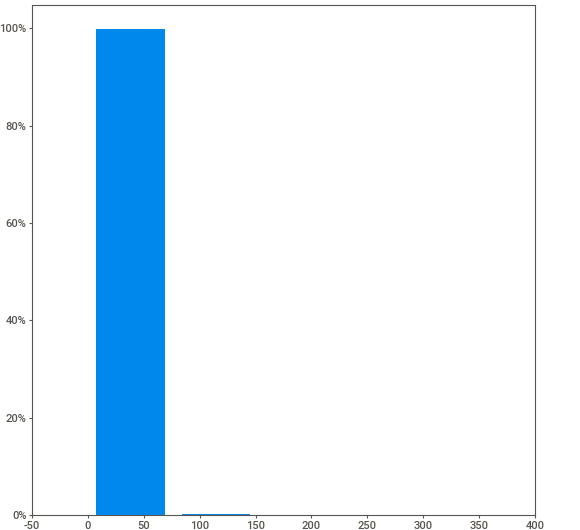
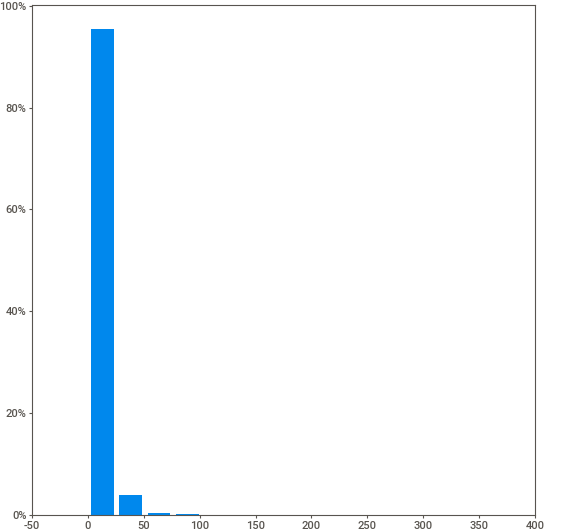
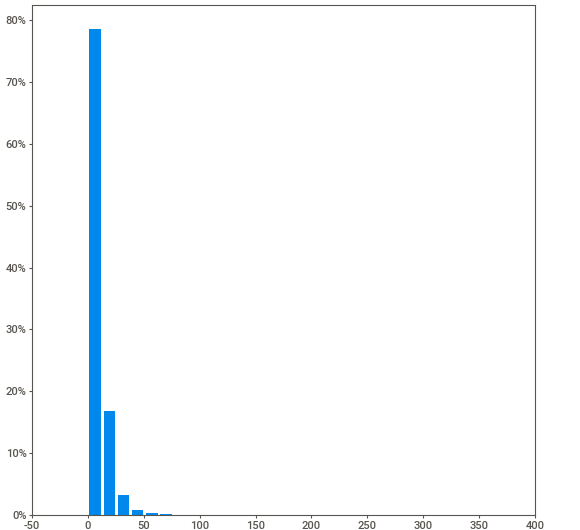
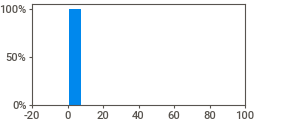
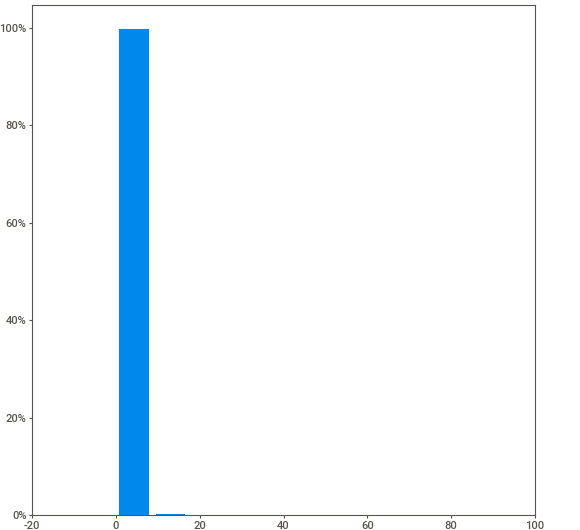
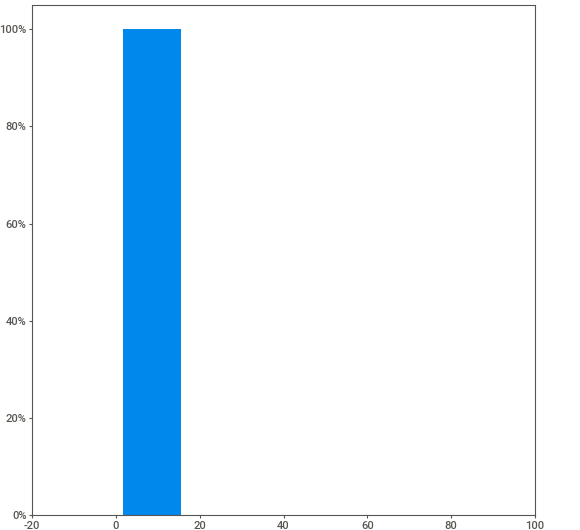
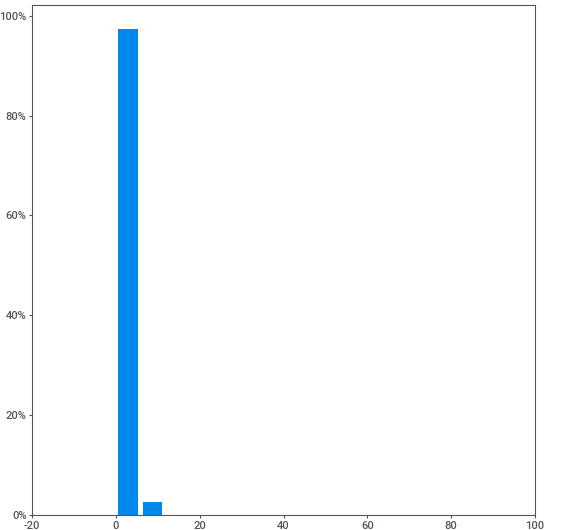
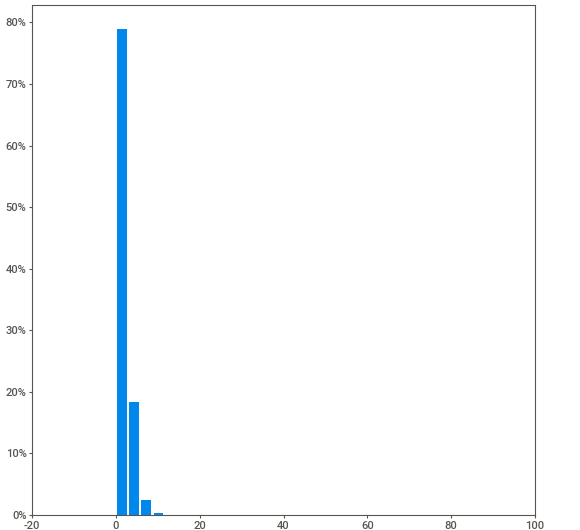
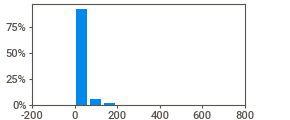
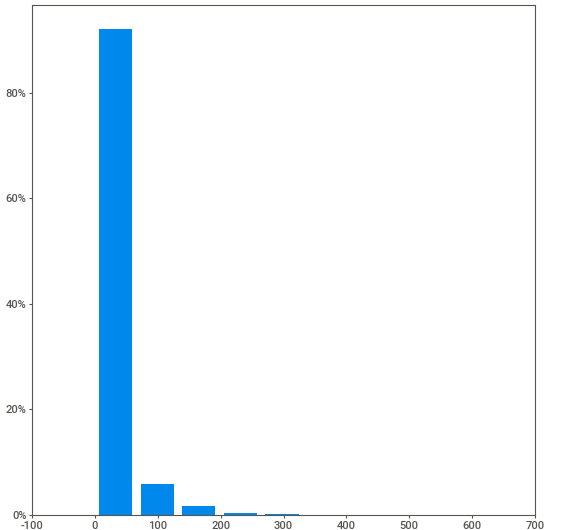
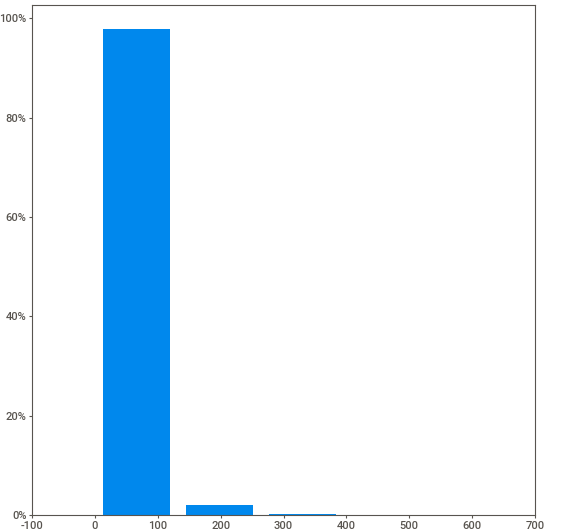
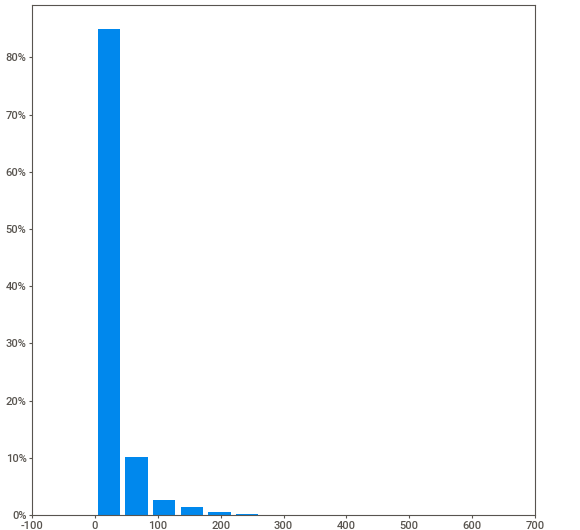
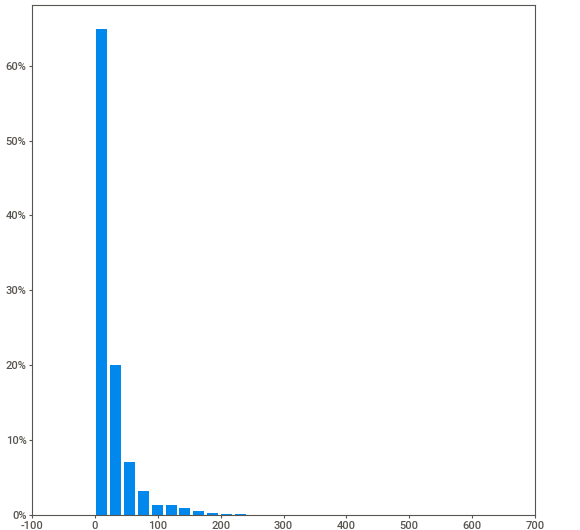
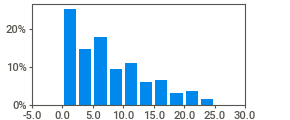
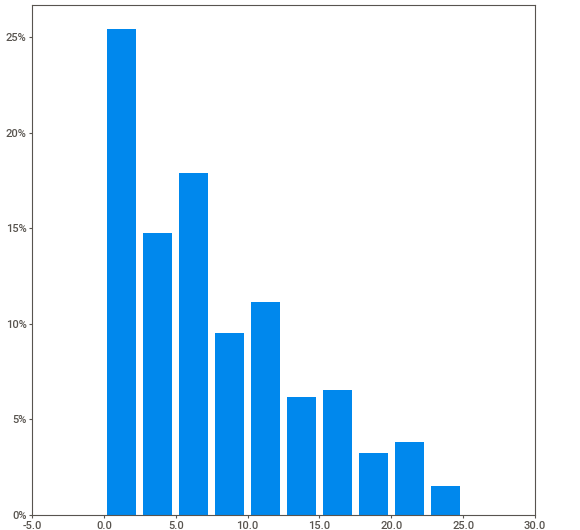
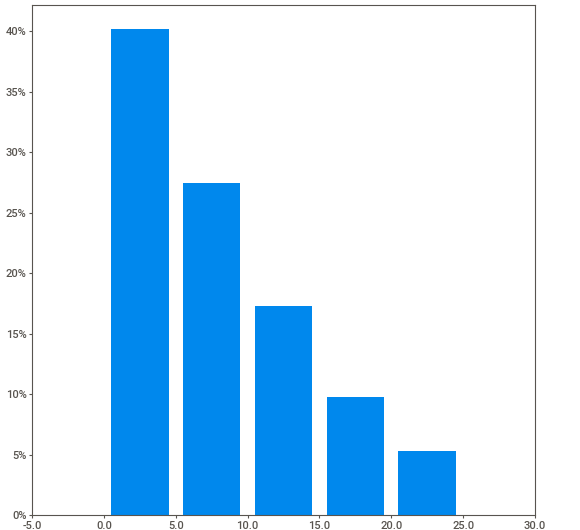
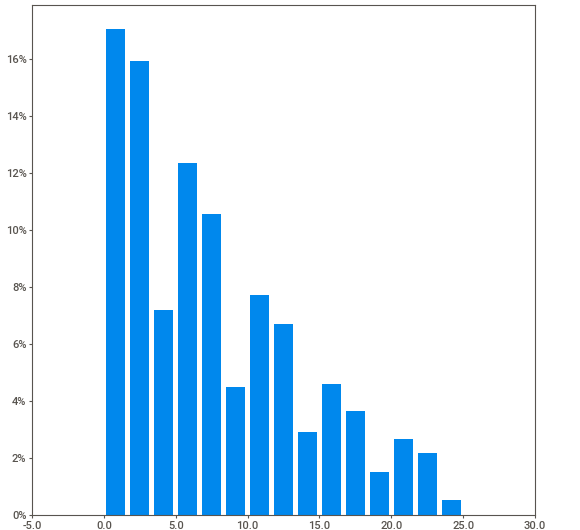
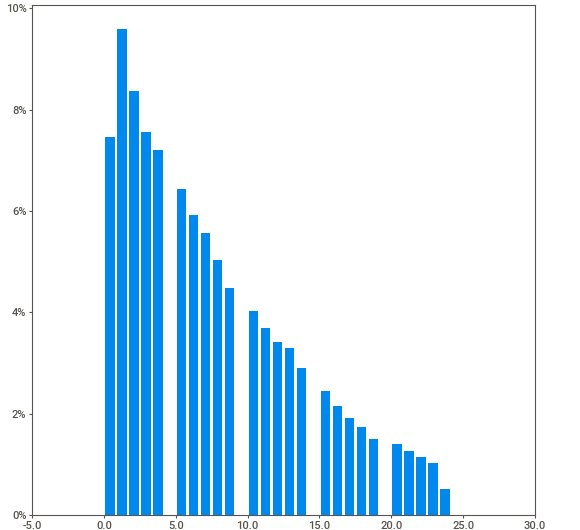
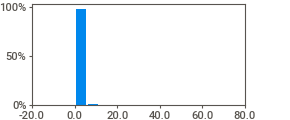
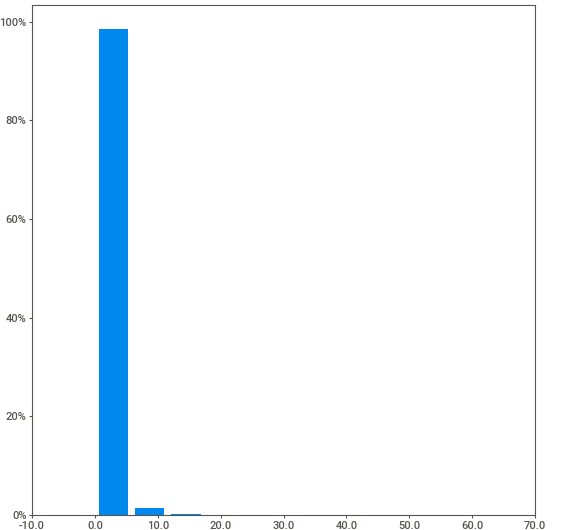
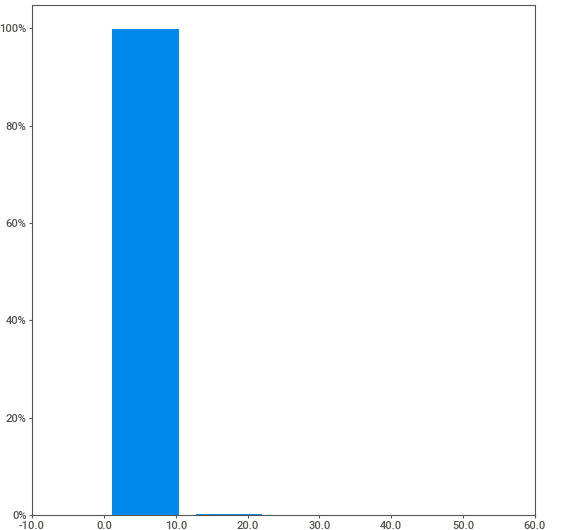
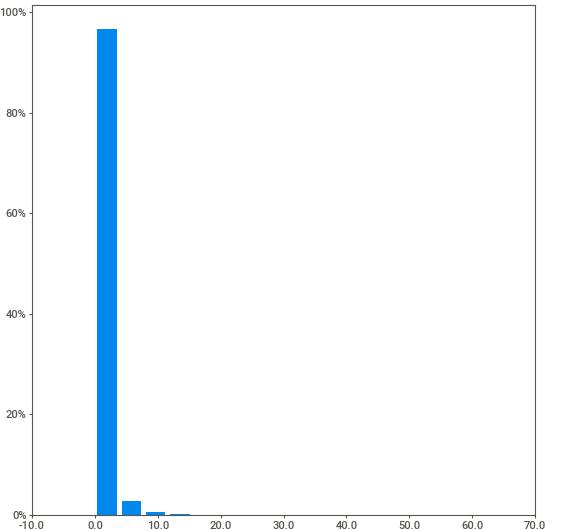
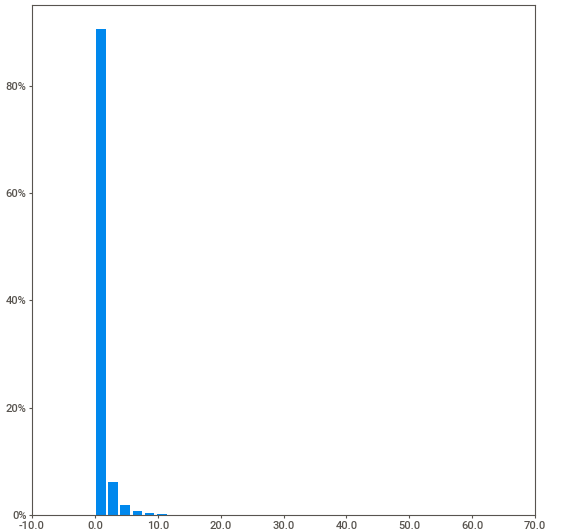
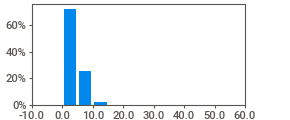
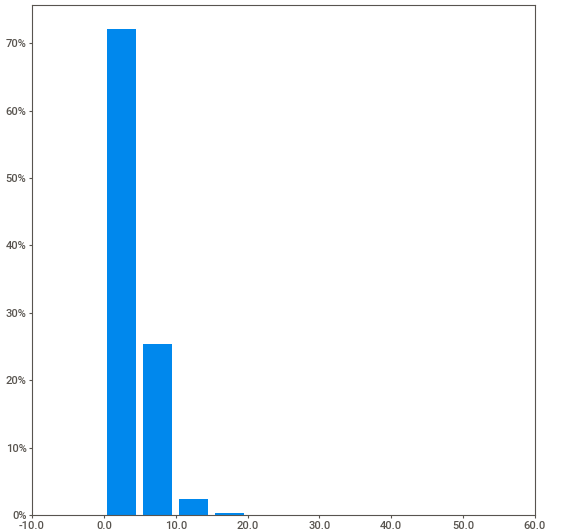
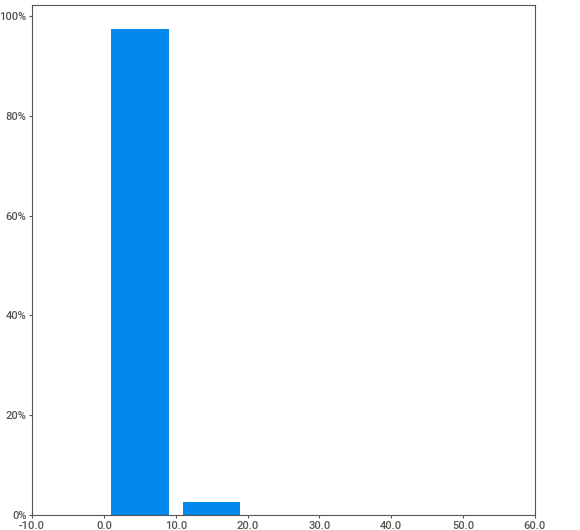
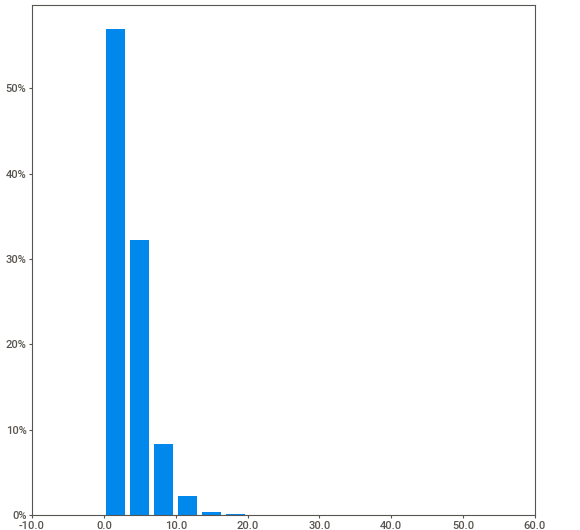
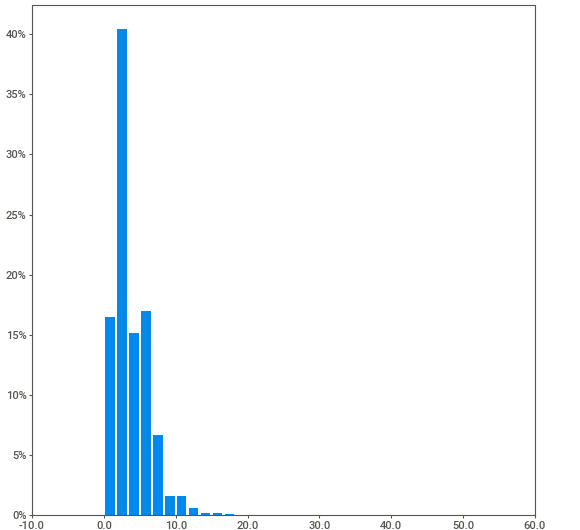
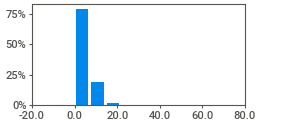
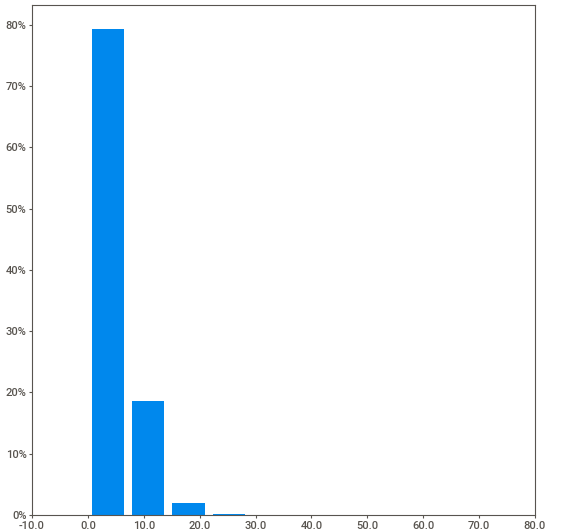
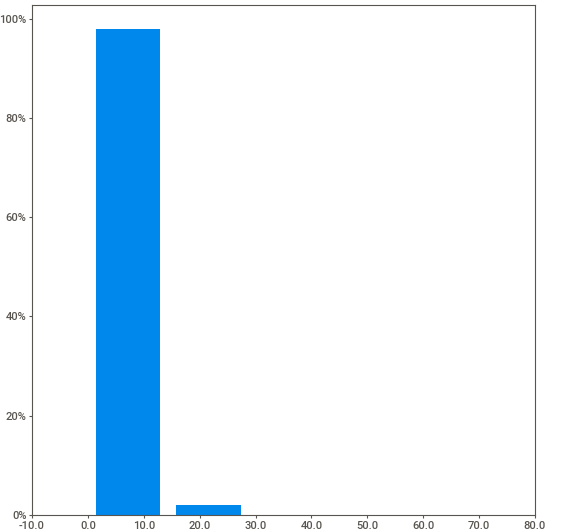
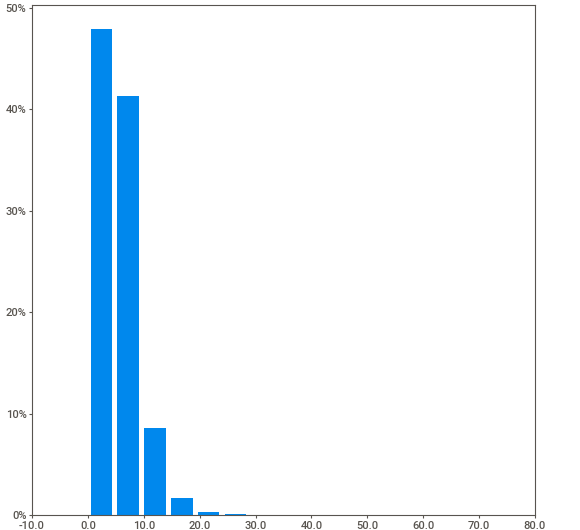
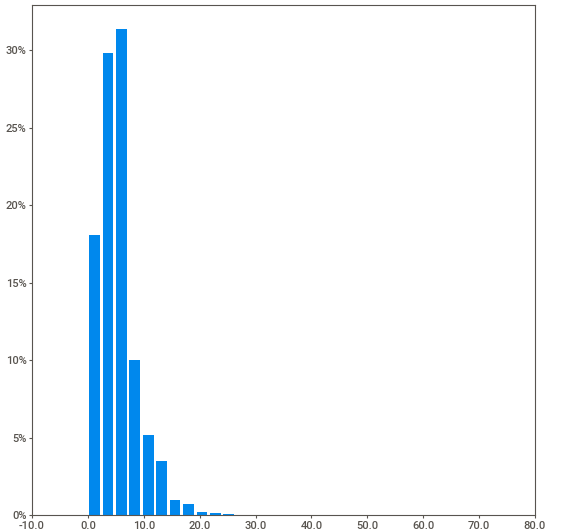
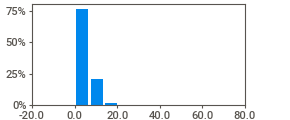
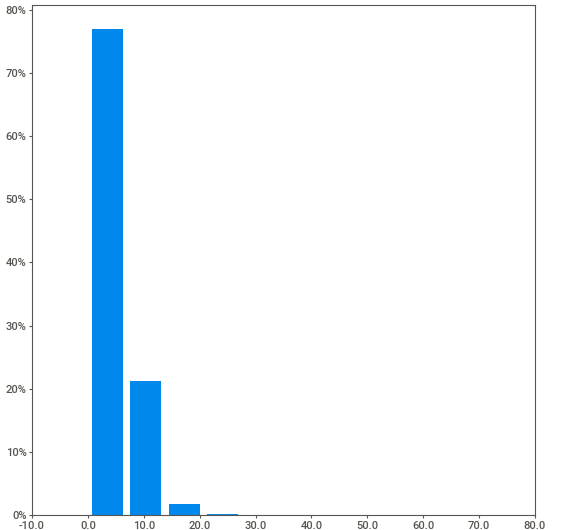
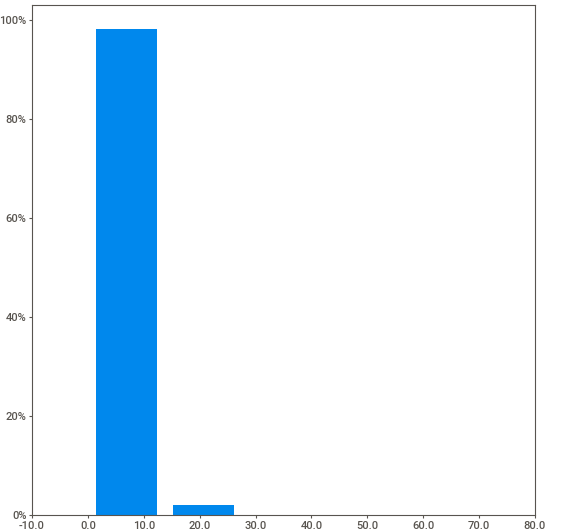
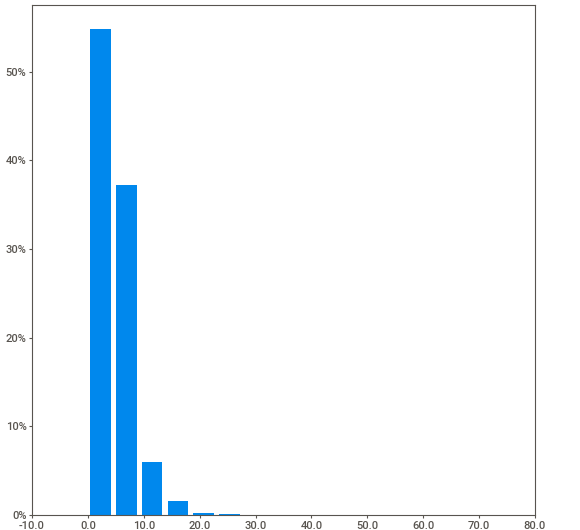
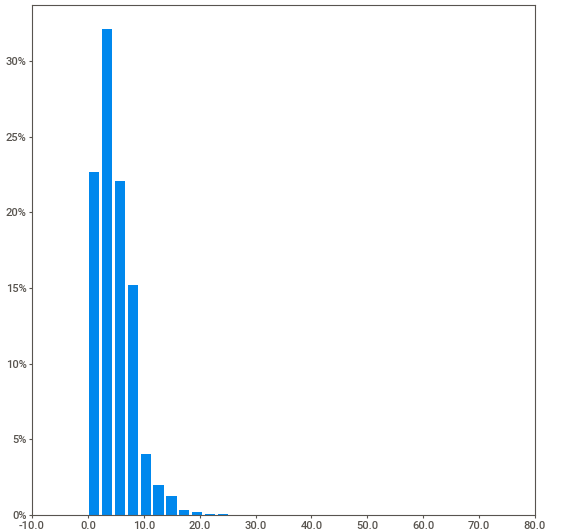
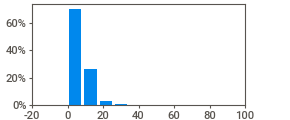
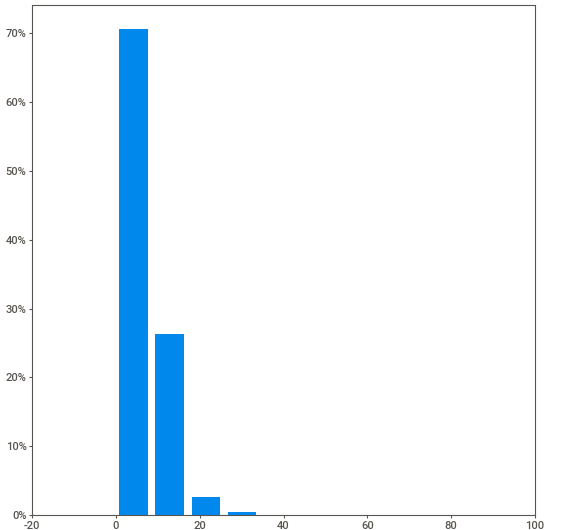
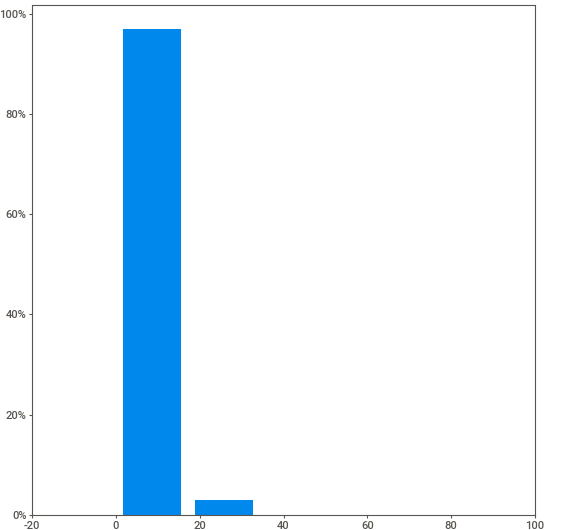
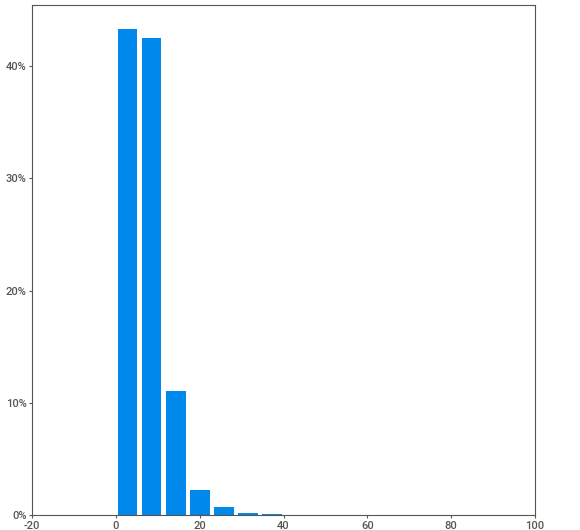
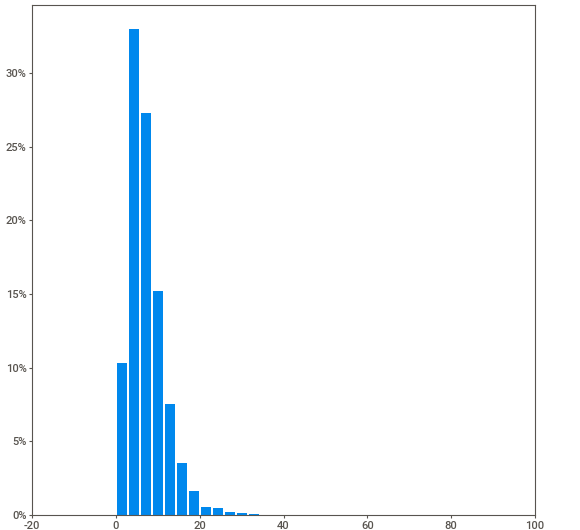
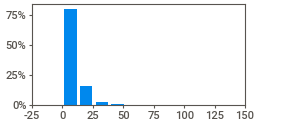
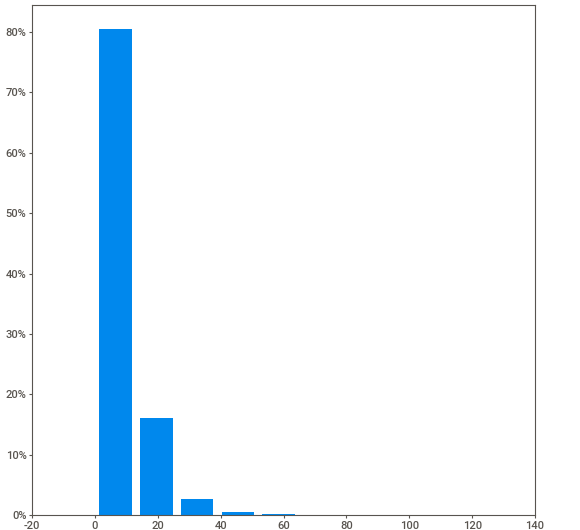
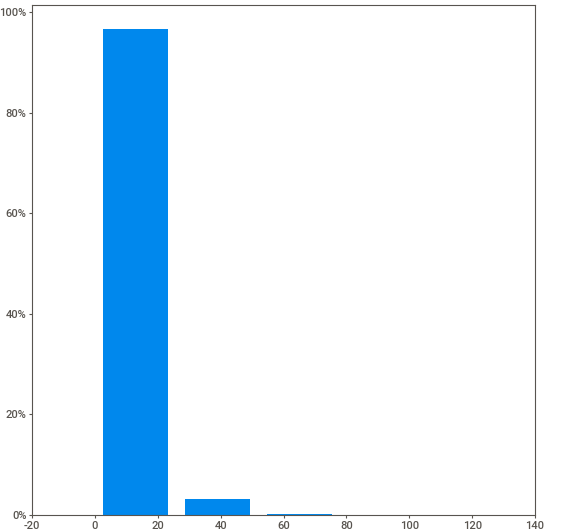
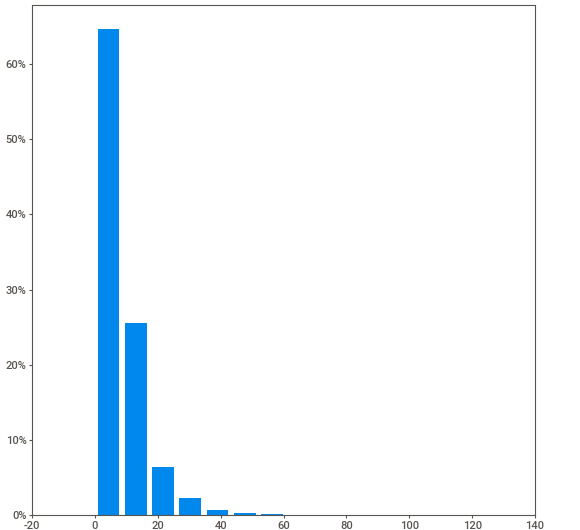
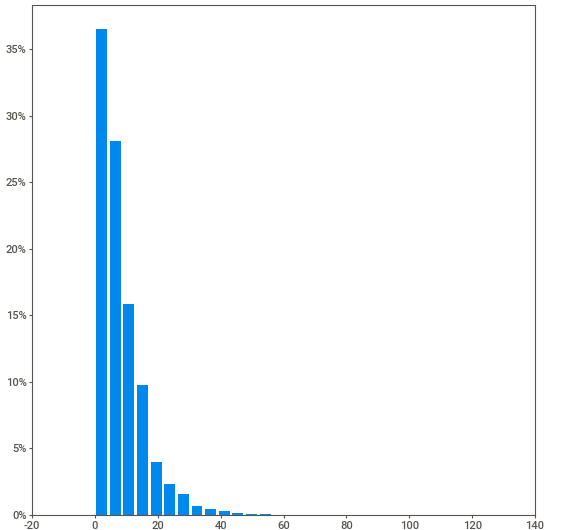
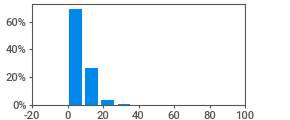
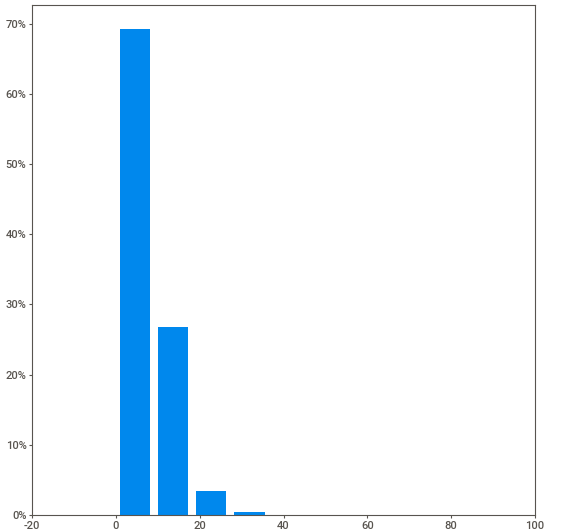
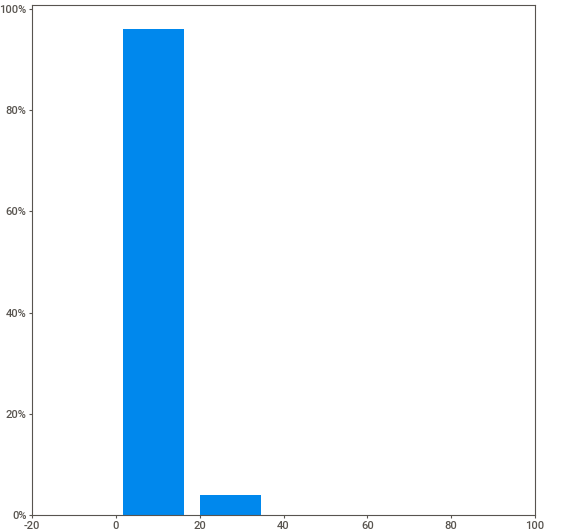
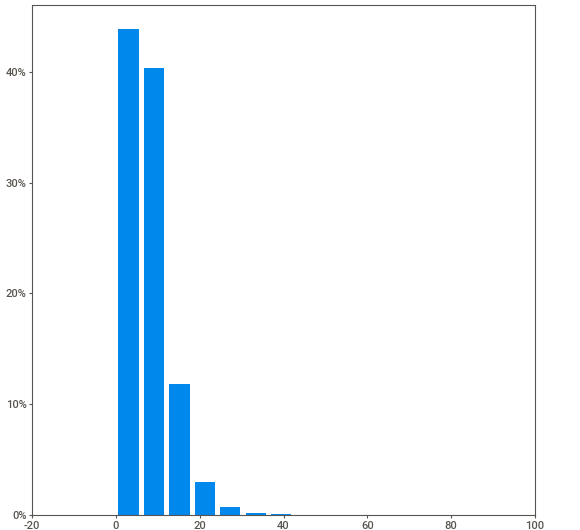
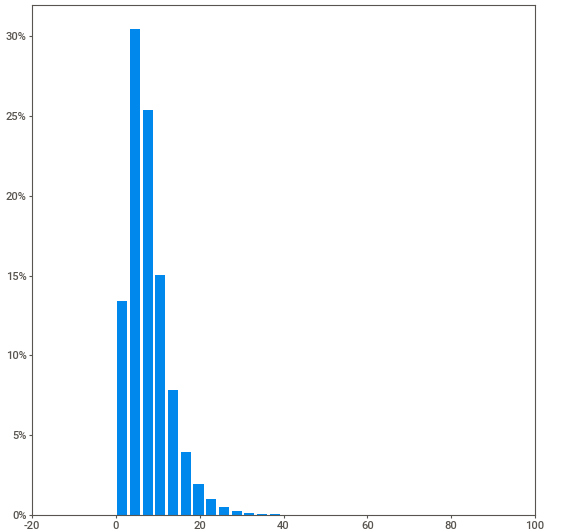
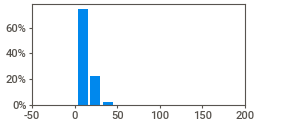
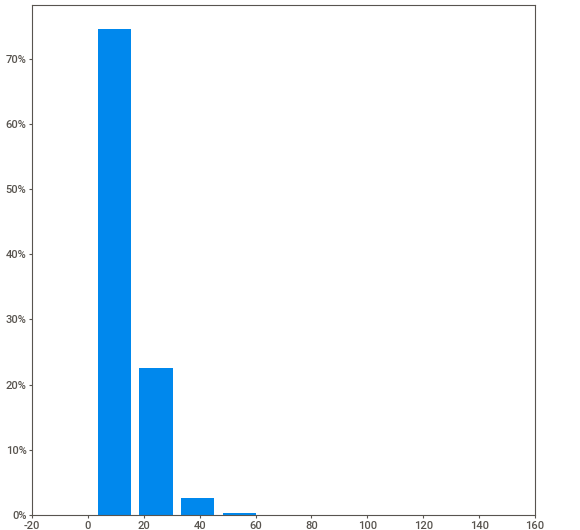
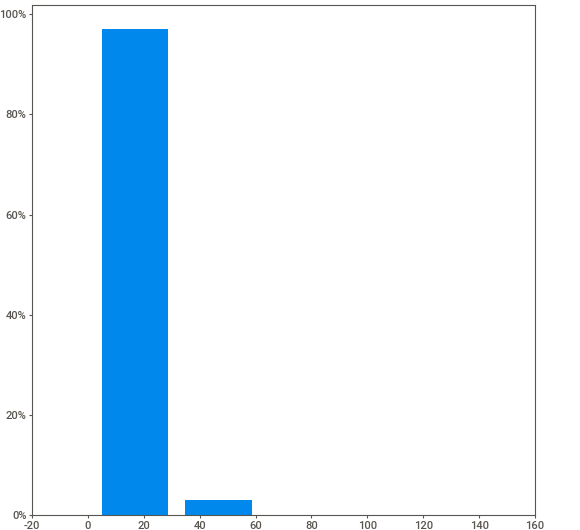
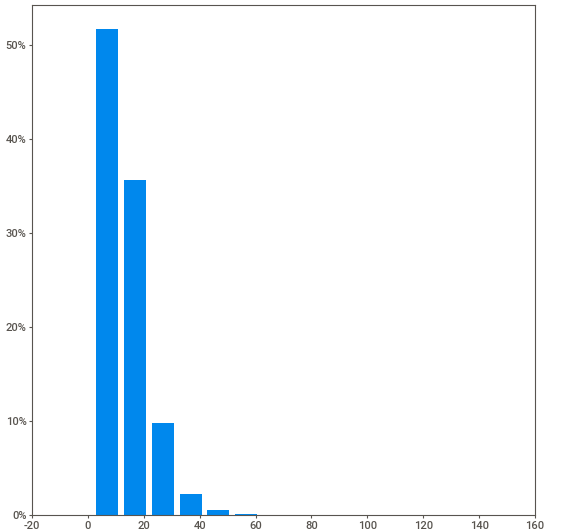
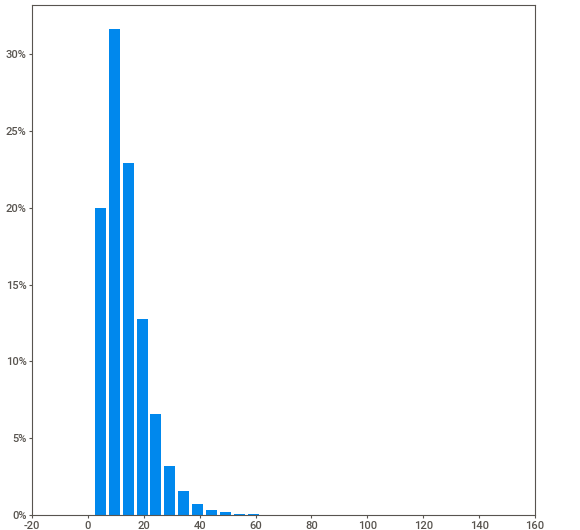
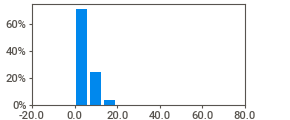
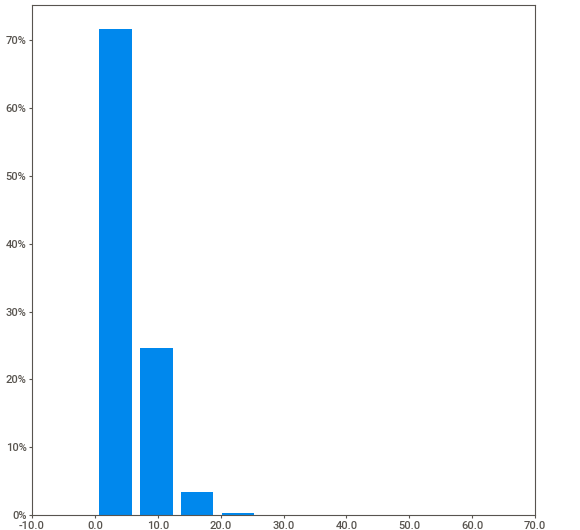
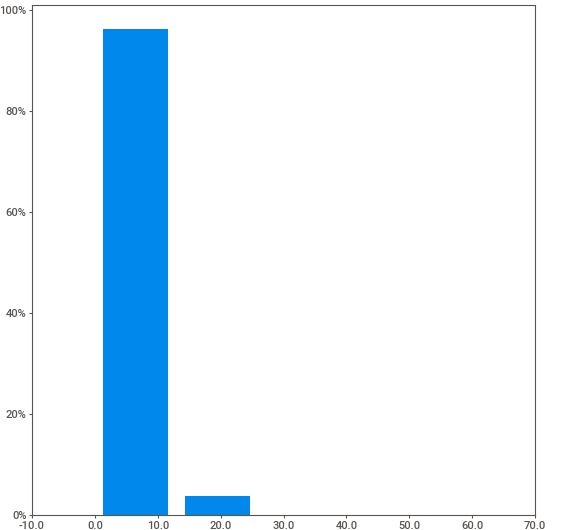
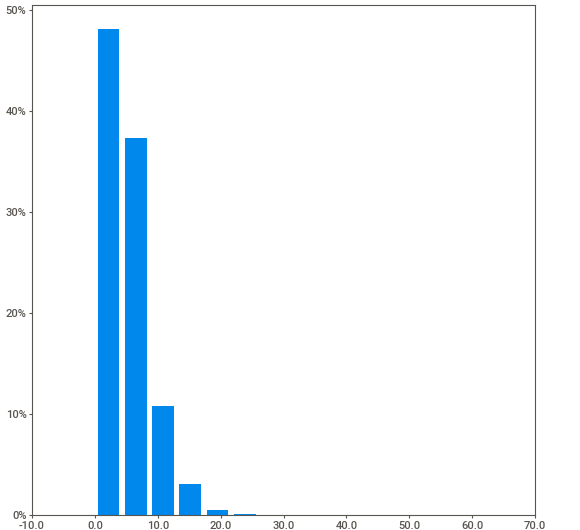
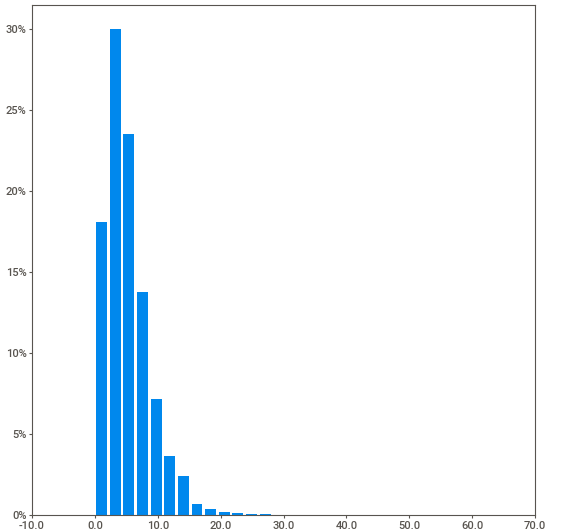
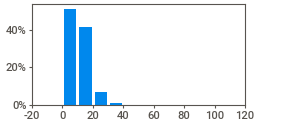
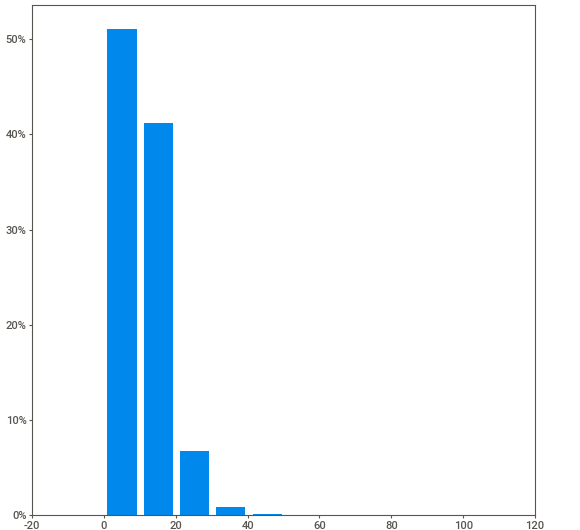
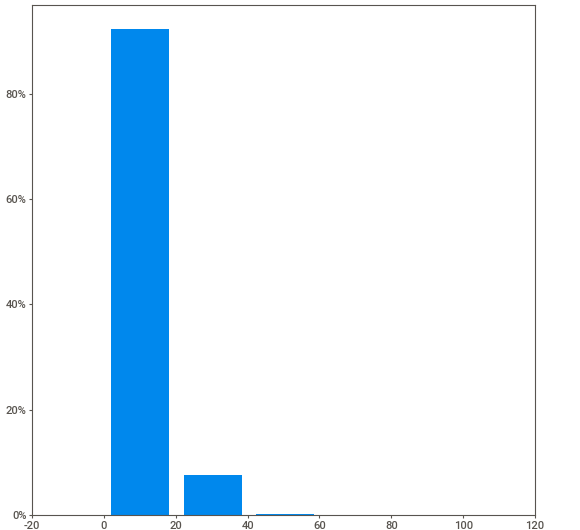
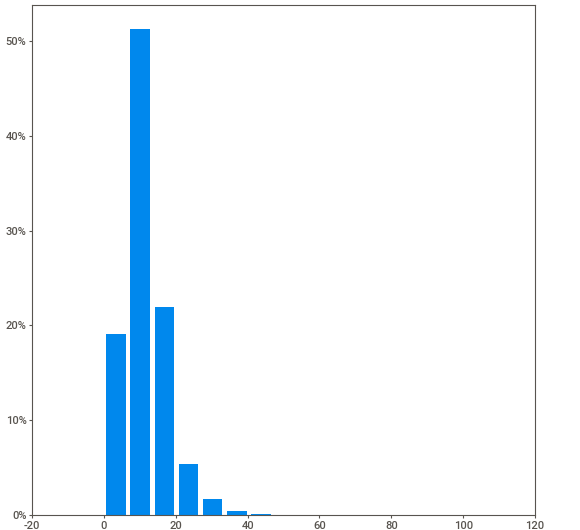
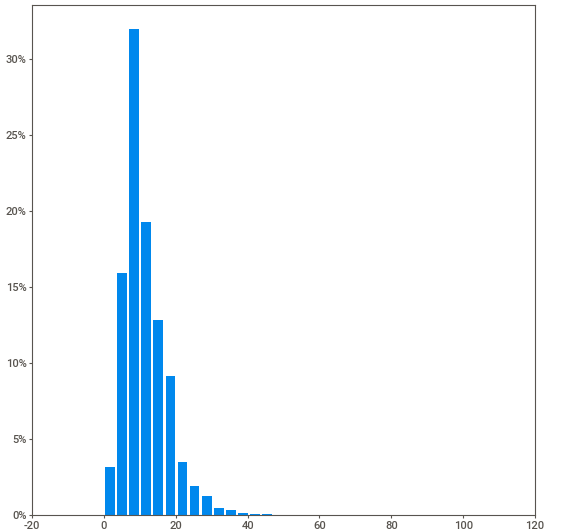
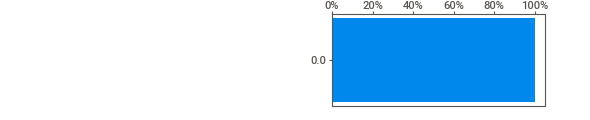
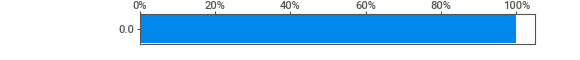
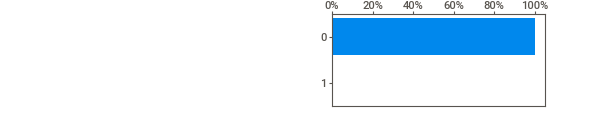
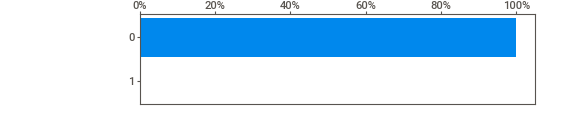
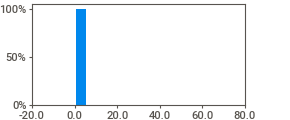
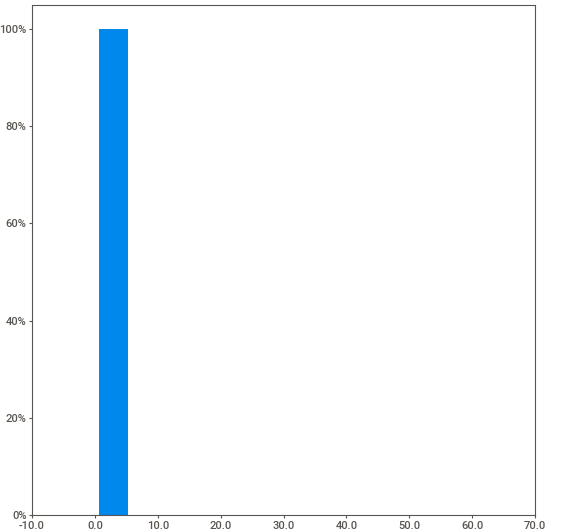
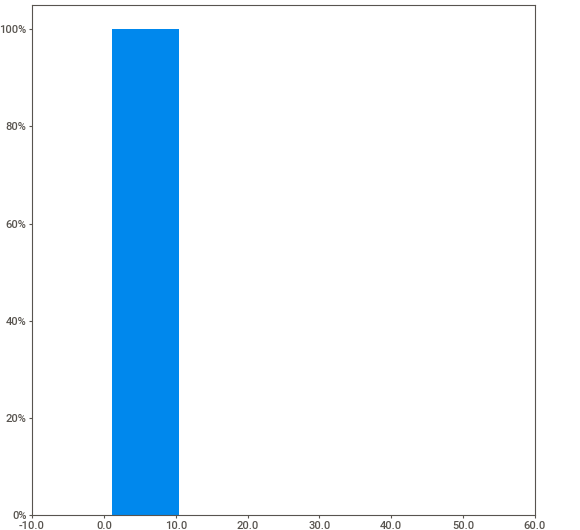
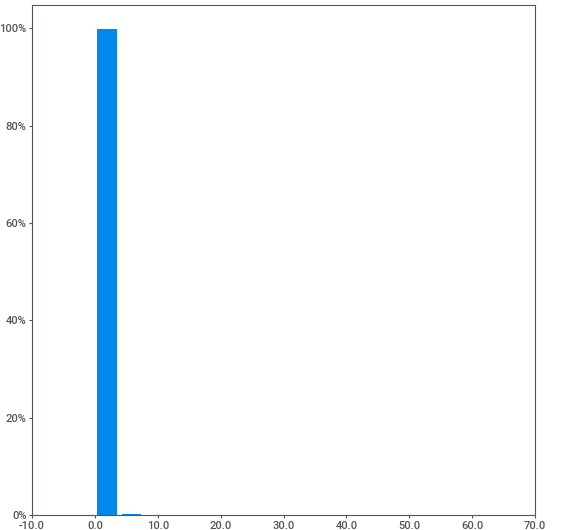
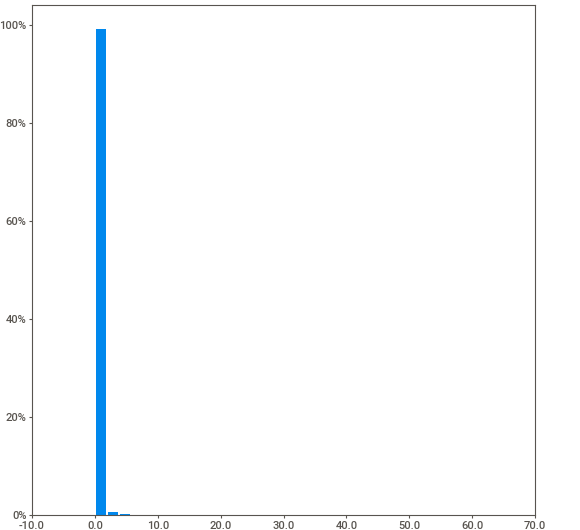
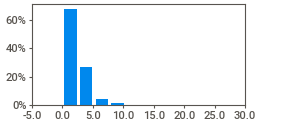
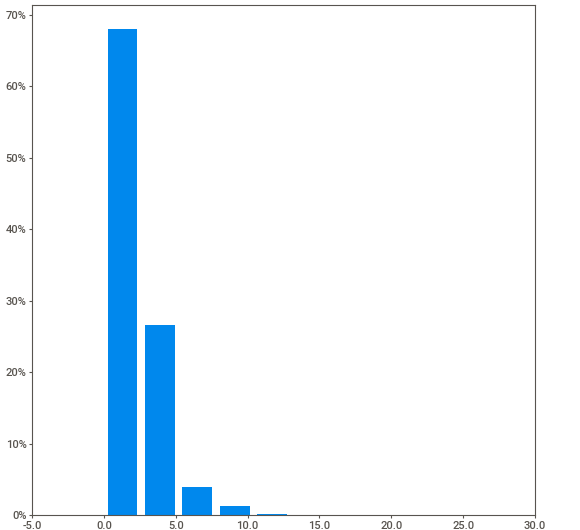
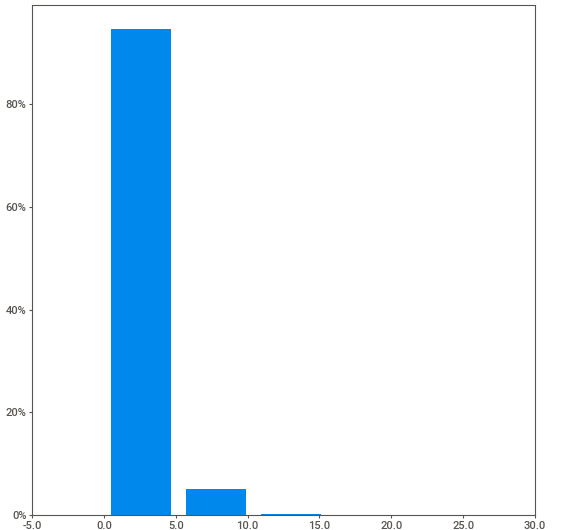
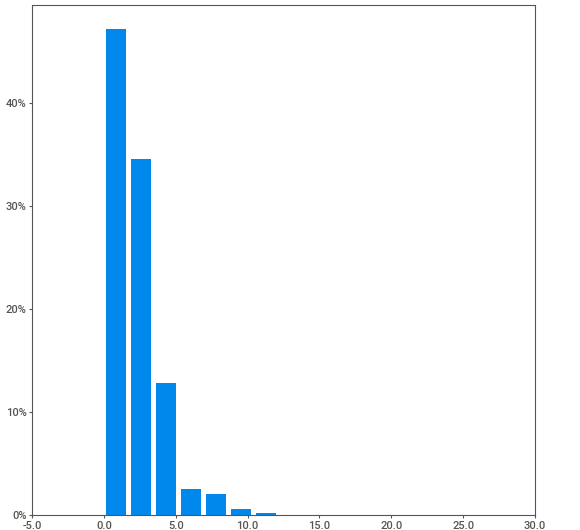
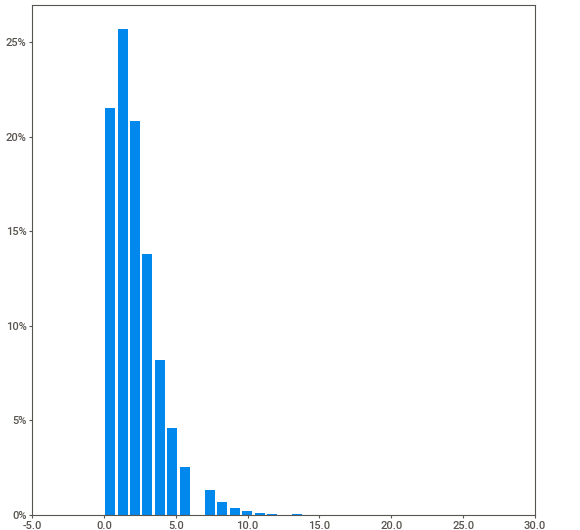
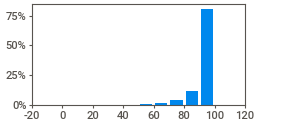
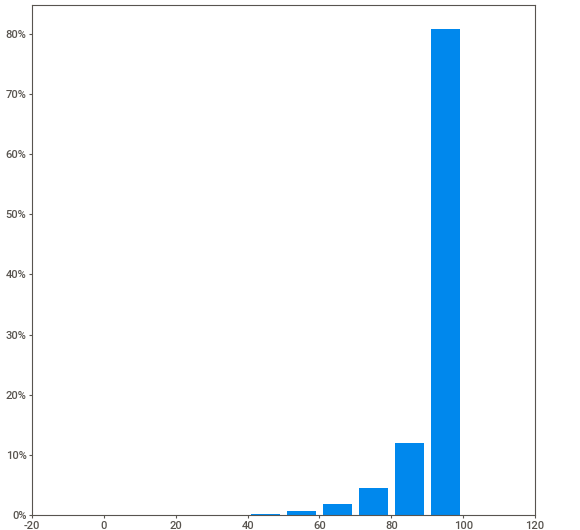
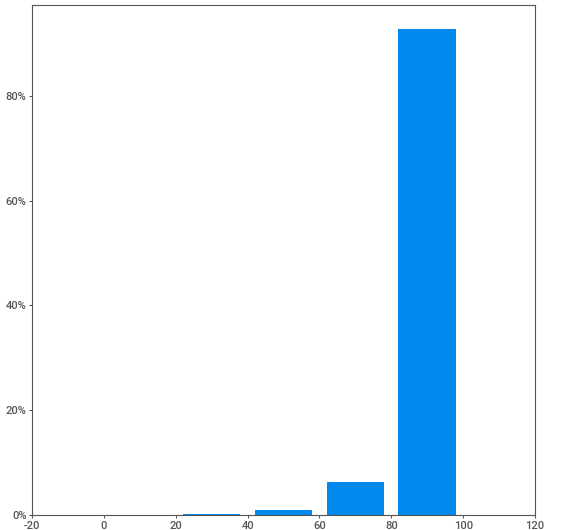
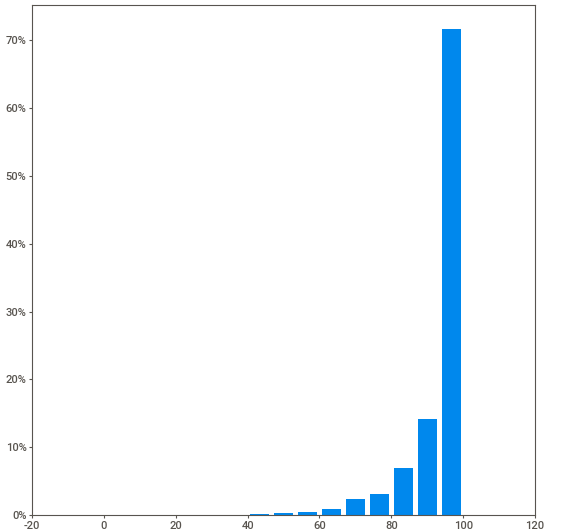
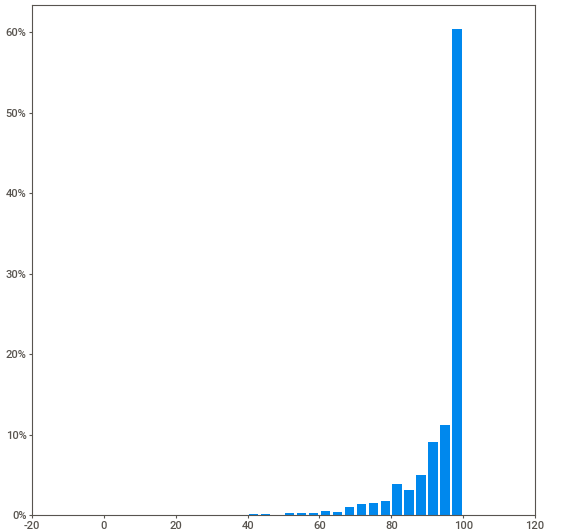
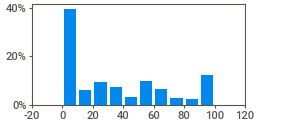
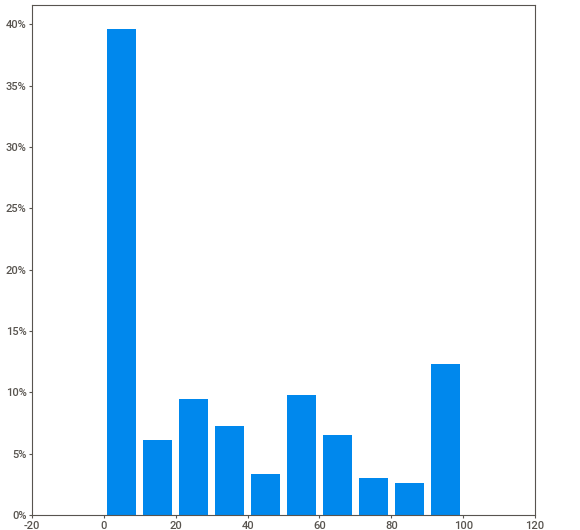
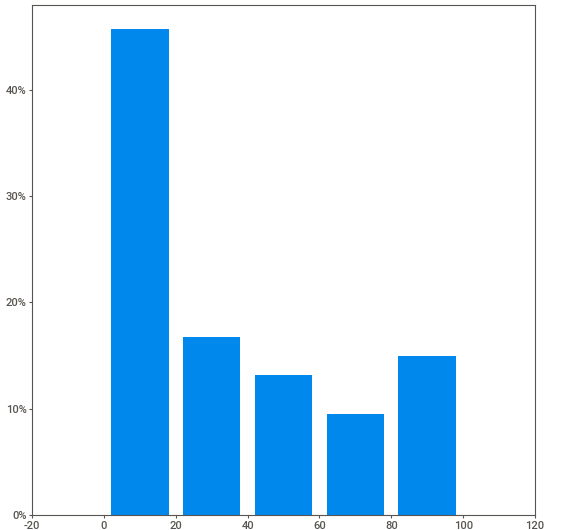
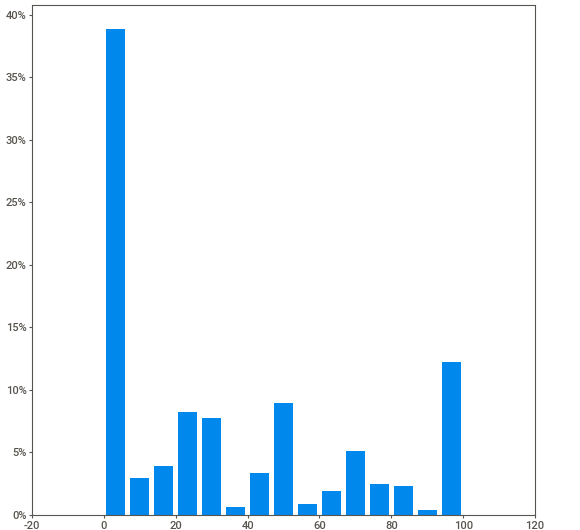
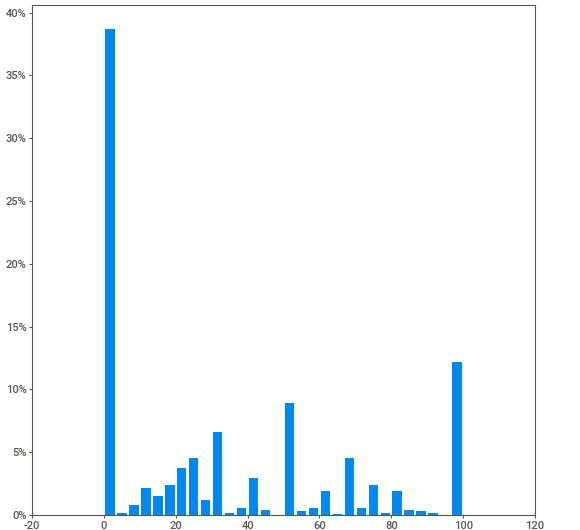
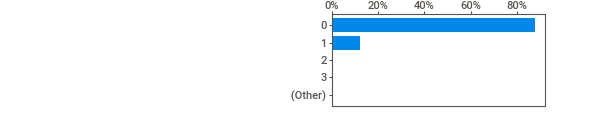
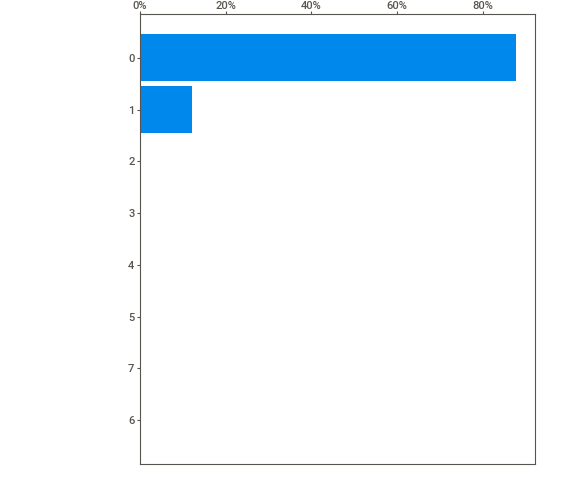
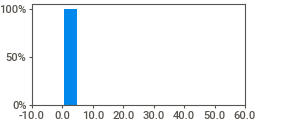
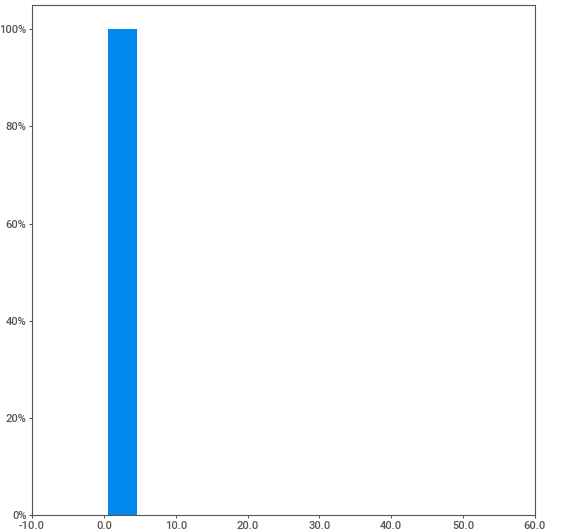
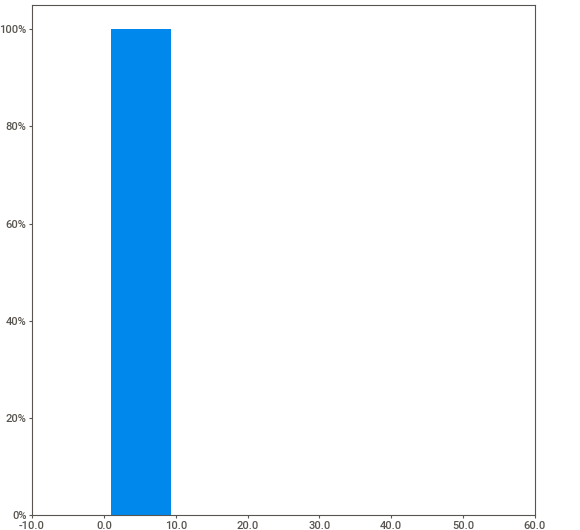
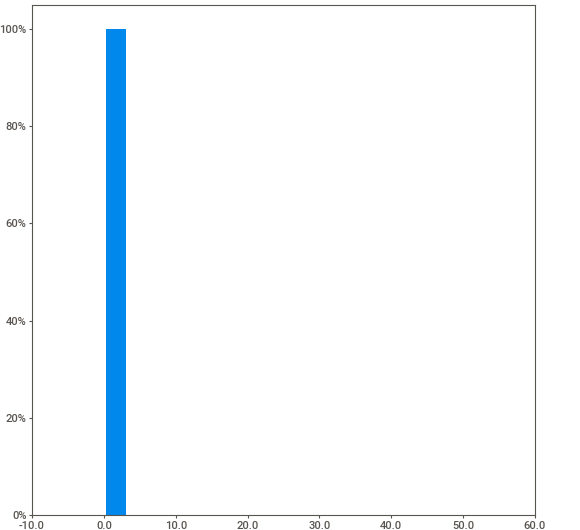
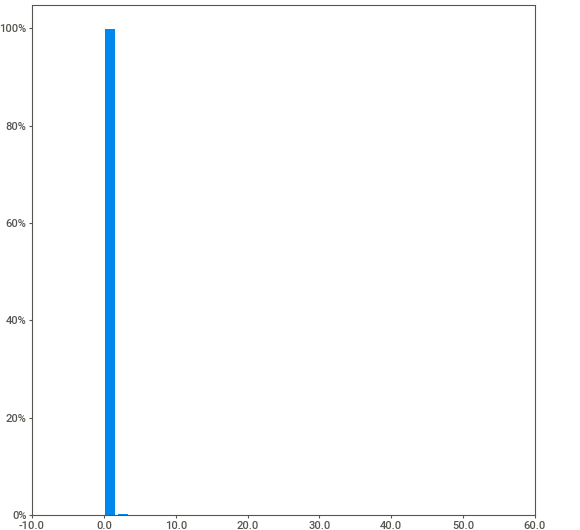
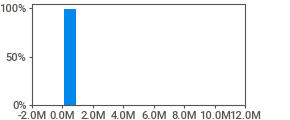
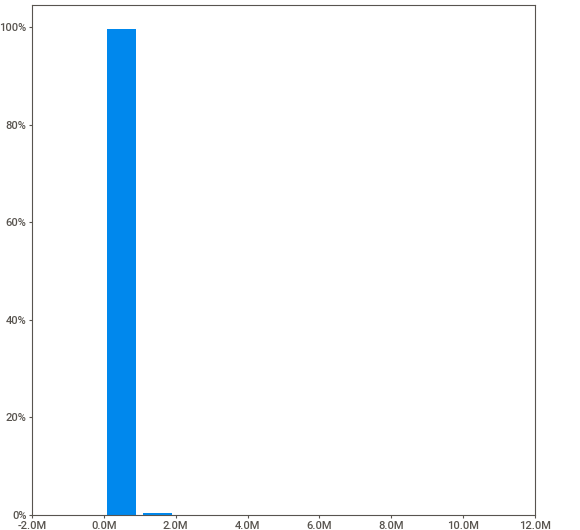
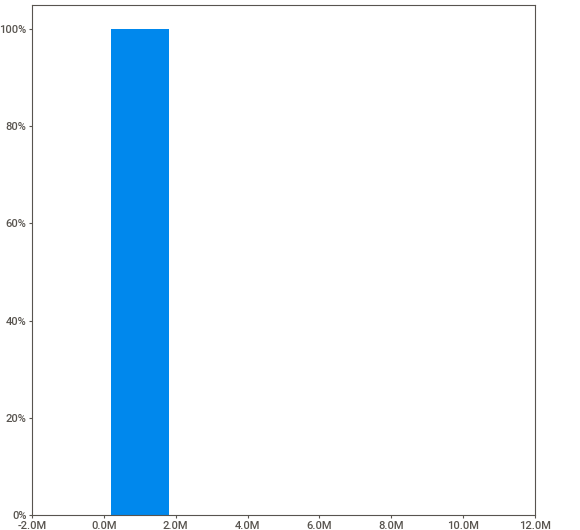
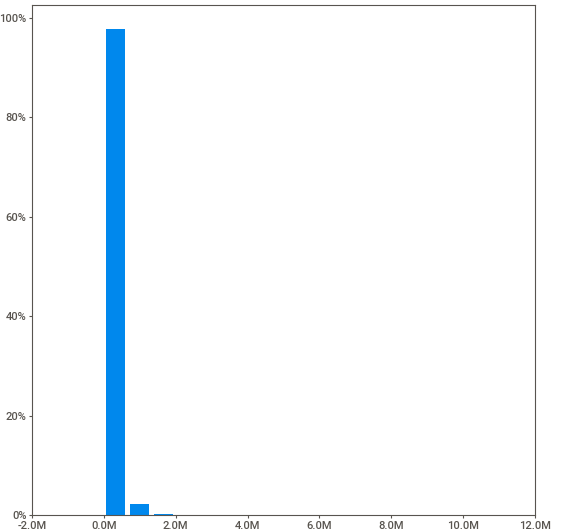
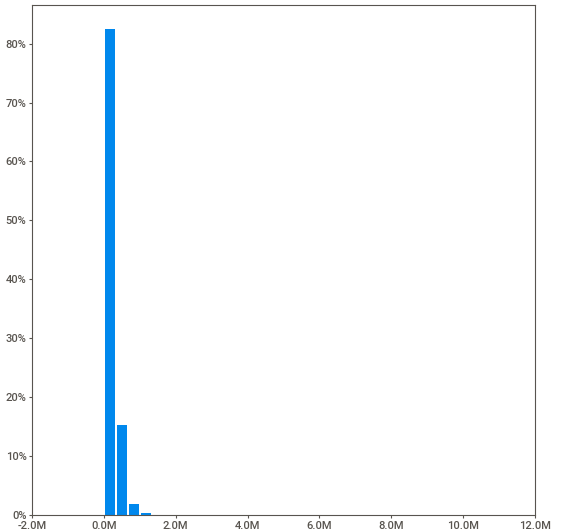
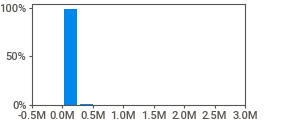
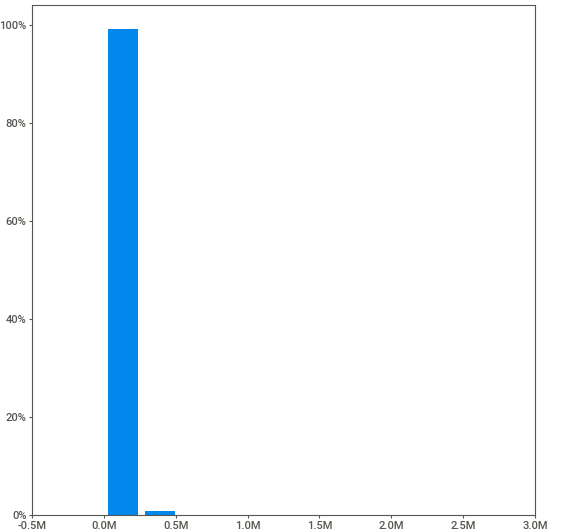
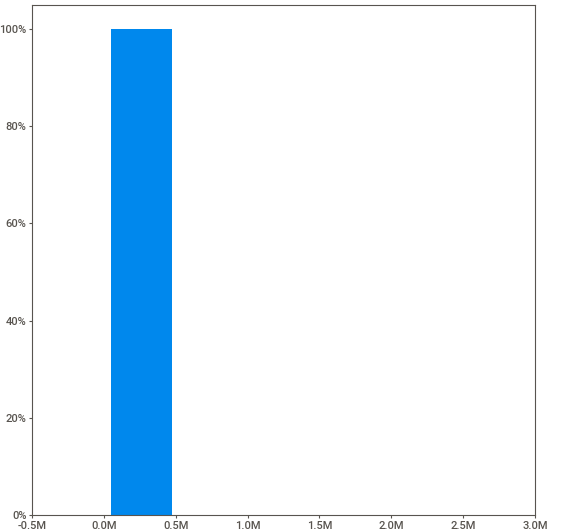
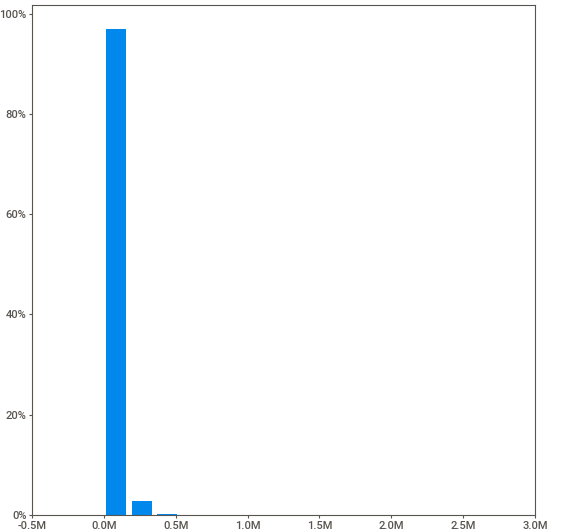
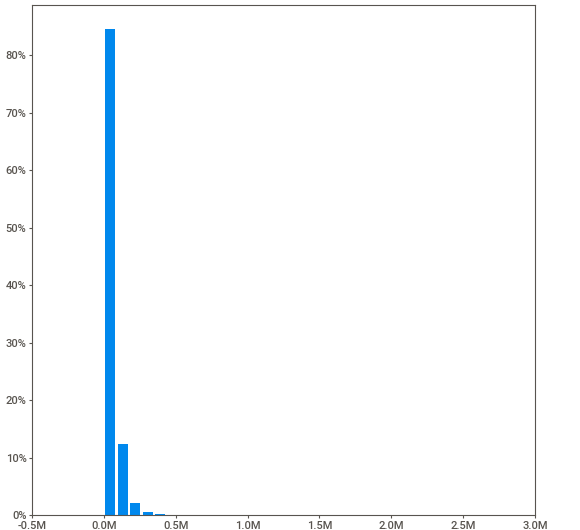
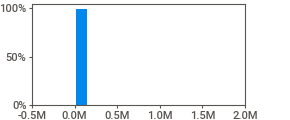
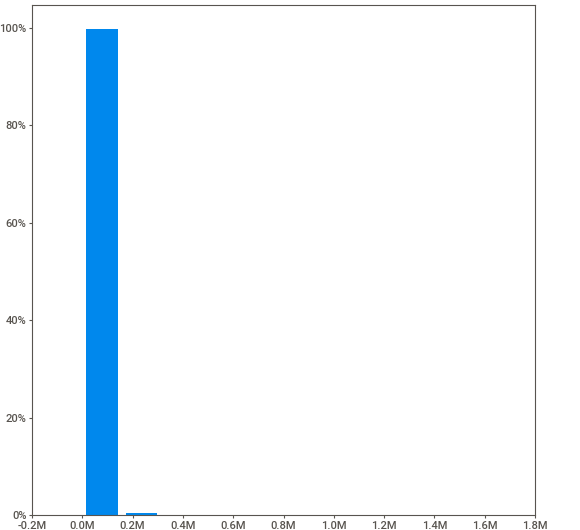
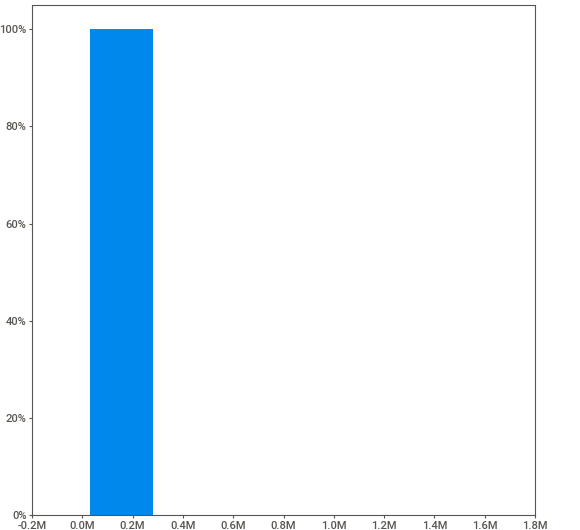
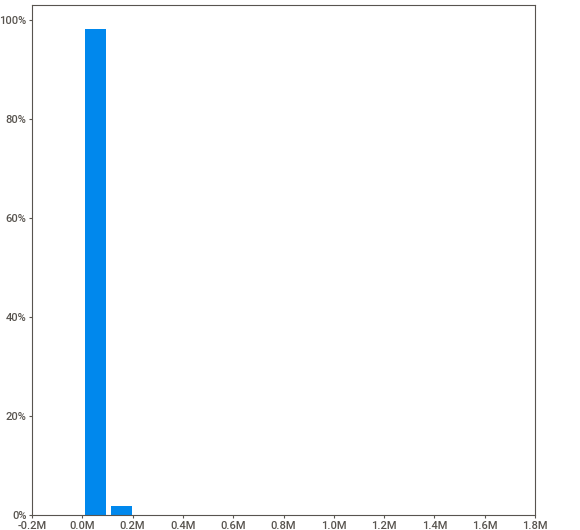
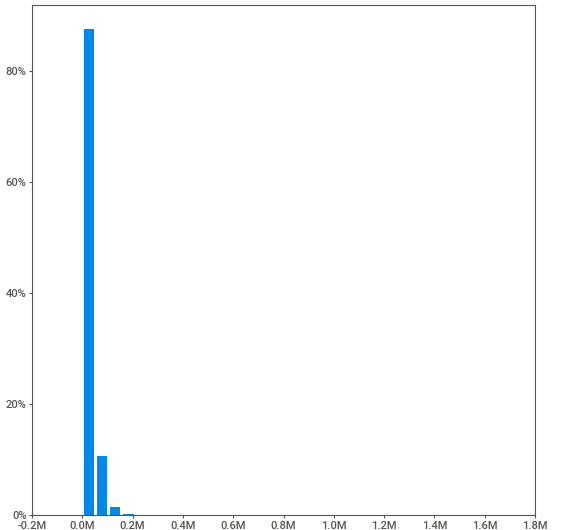
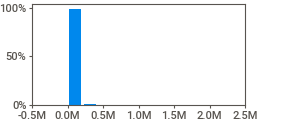
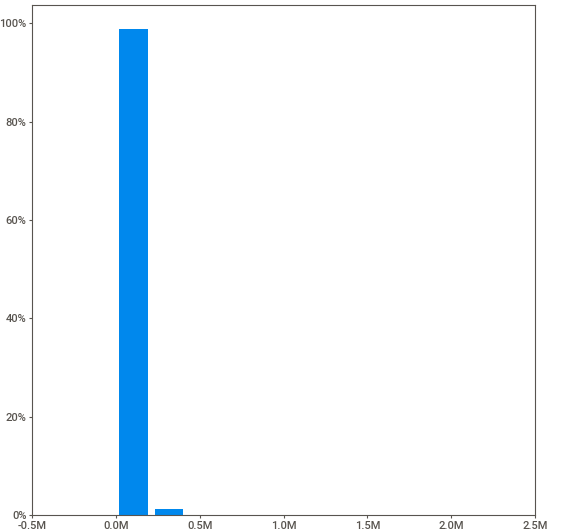
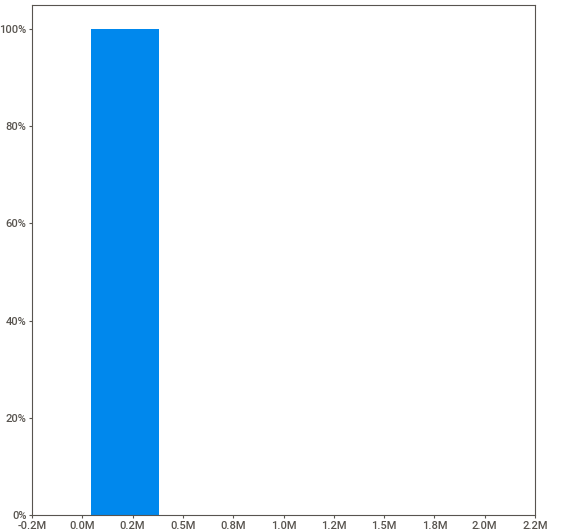
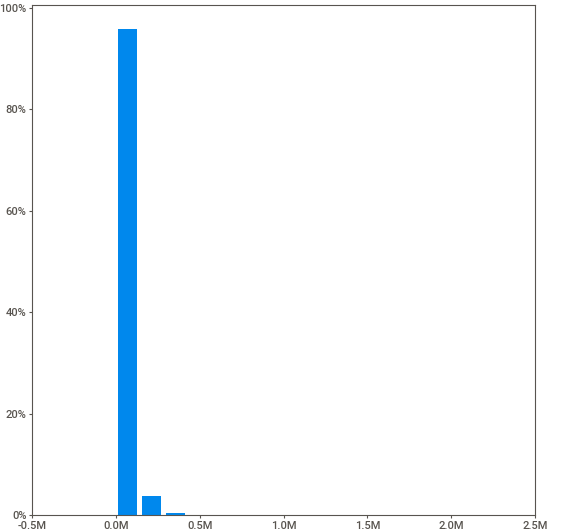
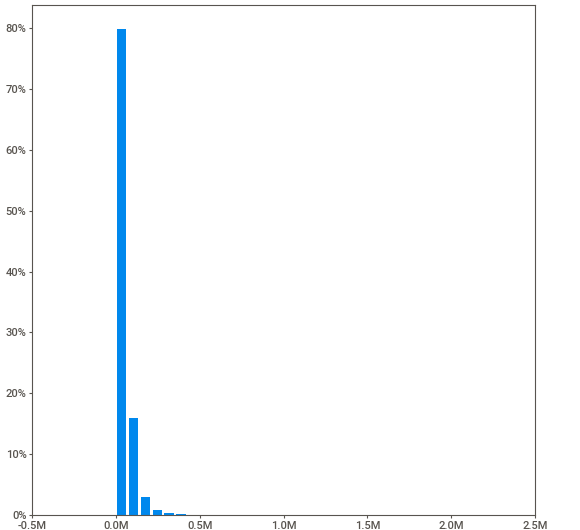
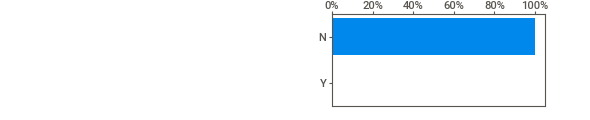
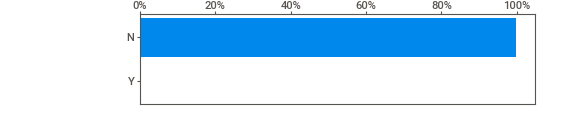
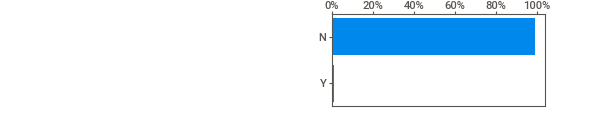
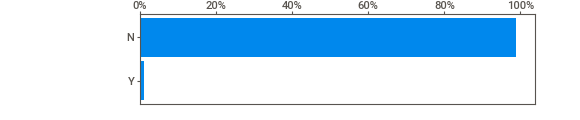

In [52]:
import sweetviz

sv_report  = sweetviz.analyze(df_all, pairwise_analysis="off")
sv_report.show_notebook()

## Summary

While data cleaning may not be the most exciting thing about working with data, it's arguably one of the most crucial steps to extracting valuable insights from your data. What you'll do in this step will affect what business decisions are made down the line.

You have to approach it with care: make your choices and assumptions explicit to others and your future self.
Are these dates really in the timezone I think they are? Are these observations really outliers? If so, is there an issue with how this data is being recorded into the database? Do zeros replace missing values in my data?
These are some of the questions you might want to consider. 
For an exhaustive guide to common data issues, we encourage you to check out [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide).
It can be a good idea to keep notes of all the unexpected and interesting things you observe. In a work setting, you can review these notes with the person who has in-depth knowledge of this data to see in which direction you need to go next.

If you'd like to continue working with this dataset by creating some custom data visualizations (those not handled by the automated tools shown earlier), we can recommend the following libraries for you to try out: 
- for static plots: [`seaborn`](https://seaborn.pydata.org/) or [`ggplot`](http://yhat.github.io/ggpy/)
- for interactive plots: [`plotly-express`](https://plotly.com/python/plotly-express/) or [`bokeh`](https://docs.bokeh.org/en/latest/index.html)

